# Tensorflow Neural Network Regression

Using Tensorflow to predict a numerical variable based on other combination of variables.

In [1]:
import tensorflow as tf
# print(tf.__version__)
# 2.11.0
from tensorflow.keras import Sequential, layers, optimizers

2023-02-26 15:01:29.461154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

## Create a Dataset

In [53]:
## create features
X = np.array([-140., -110., -80., -50., -20., 10., 40., 70., 100., 130., 160., 190., 220., 250,])
## create labels
y = np.array([1., 4., 7., 10., 13., 16., 19., 22., 25., 28., 31., 34., 37., 40,])

<function matplotlib.pyplot.show(close=None, block=None)>

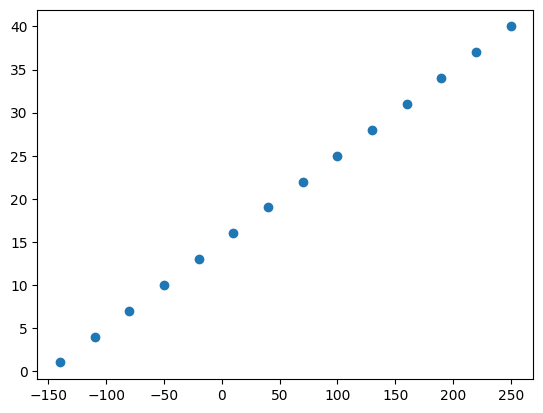

In [54]:
## visualize dataset
plt.scatter(X, y)
plt.show

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_01.png)

## Input and Output Shapes

In [21]:
# create tensors from np arrays
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

# test shape
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape
## (TensorShape([8]), TensorShape([8]))

(TensorShape([8]), TensorShape([8]))

## Building the Model

In [38]:
# set random seed
tf.random.set_seed(42)

# build a sequential model with Keras
model = Sequential([
    layers.Dense(1)
])

# compile the model
model.compile(
    loss="mae",
    optimizer="sgd",
    metrics=["mae"])

# model training
## error message: "Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)"
# => needed to expand input shape
model.fit(tf.expand_dims(X, axis=-1), y, epochs=99)
## Epoch 99/99
## 1/1 [==============================] - 0s 4ms/step - loss: 14.8669 - mae: 14.8669

Epoch 1/99
1/1 [==============================] - 0s 243ms/step - loss: 75.2486 - mae: 75.2486
Epoch 2/99
1/1 [==============================] - 0s 5ms/step - loss: 36.1836 - mae: 36.1836
Epoch 3/99
1/1 [==============================] - 0s 5ms/step - loss: 12.0606 - mae: 12.0606
Epoch 4/99
1/1 [==============================] - 0s 7ms/step - loss: 18.7992 - mae: 18.7992
Epoch 5/99
1/1 [==============================] - 0s 5ms/step - loss: 15.1923 - mae: 15.1923
Epoch 6/99
1/1 [==============================] - 0s 7ms/step - loss: 23.5132 - mae: 23.5132
Epoch 7/99
1/1 [==============================] - 0s 5ms/step - loss: 17.5648 - mae: 17.5648
Epoch 8/99
1/1 [==============================] - 0s 6ms/step - loss: 21.4017 - mae: 21.4017
Epoch 9/99
1/1 [==============================] - 0s 5ms/step - loss: 12.0419 - mae: 12.0419
Epoch 10/99
1/1 [==============================] - 0s 6ms/step - loss: 18.7617 - mae: 18.7617
Epoch 11/99
1/1 [==============================] - 0s 5ms/step - lo

## Making Predictions

In [39]:
model.predict([70.])
# a X value of 100 would correspond to a y value of 25.0
# with an mae: 17.4613 we can expect to be around 17.5 points of with our prediction:
## array([[29.203451]], dtype=float32)
# we get 29.2 instead of the expected 25.0

1/1 [==============================] - 0s 46ms/step


array([[29.203451]], dtype=float32)

## Improving the Model

1. __Creation__: add more layers / change activation function / prevent overfitting with dropouts
2. __Compilation__: change optimization function / learning rate
3. __Fitting__: add more epochs / add more data / training-testing split

In [55]:
# train / test split
X_Split = np.array_split(X,2)
X_train = tf.cast(tf.constant(X_Split[0]), dtype=tf.float32)
x_test = tf.cast(tf.constant(X_Split[1]), dtype=tf.float32)

Y_Split = np.array_split(y,2)
Y_train = tf.cast(tf.constant(Y_Split[0]), dtype=tf.float32)
y_test = tf.cast(tf.constant(Y_Split[1]), dtype=tf.float32)

X_train.shape, x_test.shape

(TensorShape([7]), TensorShape([7]))

In [57]:
# set random seed
tf.random.set_seed(42)

# build a sequential model with Keras
model_improved = Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

# compile the model
model_improved.compile(
    loss="mae",
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics=["mae"])

# model training
model_improved.fit(tf.expand_dims(X_train, axis=-1), Y_Split, validation_data=(x_test, y_test), epochs=99)
# Epoch 99/99
# 1/1 [==============================] - 0s 27ms/step - loss: 4.0467 - mae: 4.0467 - val_loss: 2.8862 - val_mae: 2.8862

Epoch 1/99
1/1 [==============================] - 1s 1s/step - loss: 10.0857 - mae: 10.0857 - val_loss: 54.7116 - val_mae: 54.7116
Epoch 2/99
1/1 [==============================] - 0s 28ms/step - loss: 12.3047 - mae: 12.3047 - val_loss: 149.9492 - val_mae: 149.9492
Epoch 3/99
1/1 [==============================] - 0s 26ms/step - loss: 16.7405 - mae: 16.7405 - val_loss: 170.0219 - val_mae: 170.0219
Epoch 4/99
1/1 [==============================] - 0s 25ms/step - loss: 15.9866 - mae: 15.9866 - val_loss: 137.3518 - val_mae: 137.3518
Epoch 5/99
1/1 [==============================] - 0s 29ms/step - loss: 10.1076 - mae: 10.1076 - val_loss: 86.7555 - val_mae: 86.7555
Epoch 6/99
1/1 [==============================] - 0s 25ms/step - loss: 8.5937 - mae: 8.5937 - val_loss: 29.3778 - val_mae: 29.3778
Epoch 7/99
1/1 [==============================] - 0s 25ms/step - loss: 8.1244 - mae: 8.1244 - val_loss: 19.5311 - val_mae: 19.5311
Epoch 8/99
1/1 [==============================] - 0s 24ms/step - loss

1/1 [==============================] - 0s 27ms/step - loss: 6.2777 - mae: 6.2777 - val_loss: 27.2053 - val_mae: 27.2053
Epoch 64/99
1/1 [==============================] - 0s 31ms/step - loss: 5.2845 - mae: 5.2845 - val_loss: 28.9284 - val_mae: 28.9284
Epoch 65/99
1/1 [==============================] - 0s 25ms/step - loss: 5.5176 - mae: 5.5176 - val_loss: 27.5183 - val_mae: 27.5183
Epoch 66/99
1/1 [==============================] - 0s 29ms/step - loss: 5.5782 - mae: 5.5782 - val_loss: 23.0856 - val_mae: 23.0856
Epoch 67/99
1/1 [==============================] - 0s 30ms/step - loss: 6.1891 - mae: 6.1891 - val_loss: 23.8283 - val_mae: 23.8283
Epoch 68/99
1/1 [==============================] - 0s 27ms/step - loss: 4.3677 - mae: 4.3677 - val_loss: 21.7190 - val_mae: 21.7190
Epoch 69/99
1/1 [==============================] - 0s 27ms/step - loss: 5.1565 - mae: 5.1565 - val_loss: 25.6949 - val_mae: 25.6949
Epoch 70/99
1/1 [==============================] - 0s 32ms/step - loss: 5.4227 - mae: 5.

## Making Predictions

In [59]:
model_improved.predict([160.])
# expected 31 for X value of 160
## array([[28.041351]], dtype=float32)

1/1 [==============================] - 0s 28ms/step


array([[28.041351]], dtype=float32)

## Model Evaluation 

### Create a new Dataset

In [17]:
# create a new feature matrix
X = tf.range(-100, 100, 4)
X
# <tf.Tensor: shape=(50,), dtype=int32, numpy=
# array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
#         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
#         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
#          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
#          76,   80,   84,   88,   92,   96], dtype=int32)>

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
# create labels for those features that follow a pattern
y = X + 10
y
# <tf.Tensor: shape=(50,), dtype=int32, numpy=
# array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
#        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
#         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
#         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

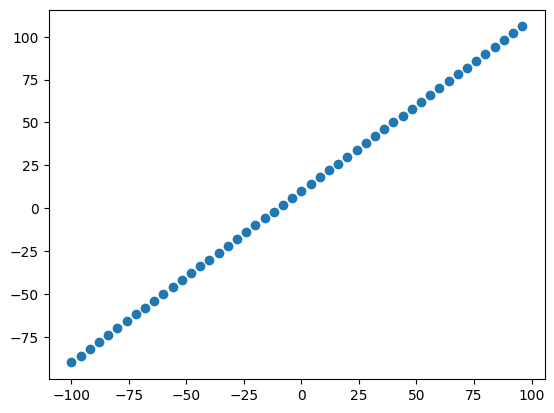

In [7]:
# visualize the data
plt.scatter(X,y)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_02.png)

### Train-Test Datasplit

In [19]:
len(X)
# 50 => 80:20 split
X_train = X[:40] # take first 80% of features
X_test = X[40:] # take last 20% of features
y_train = y[:40] # take first 80% of lables
y_test = y[40:] # take last 20% of lables

len(X_train), len(X_test), len(y_train), len(y_test)
# (40, 10, 40, 10)

(40, 10, 40, 10)

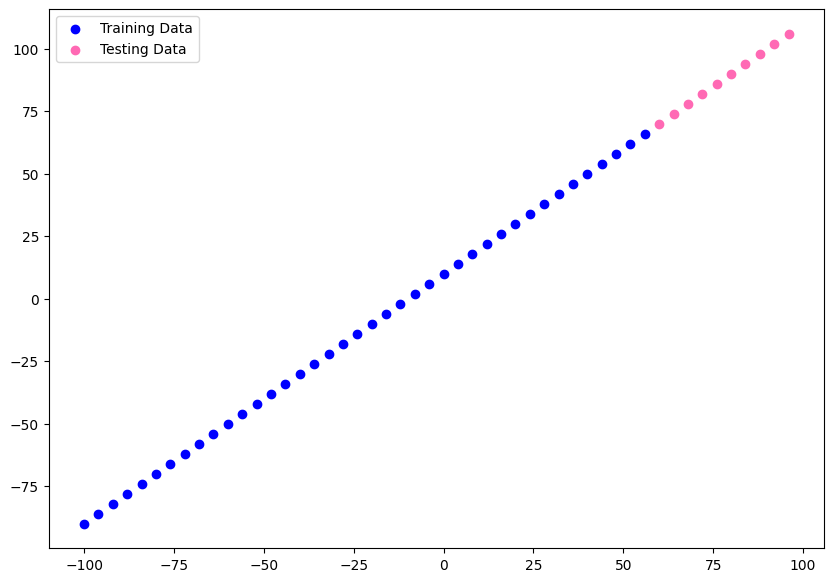

In [20]:
# visualize datasets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="hotpink", label="Testing Data")
plt.legend()

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_03.png)

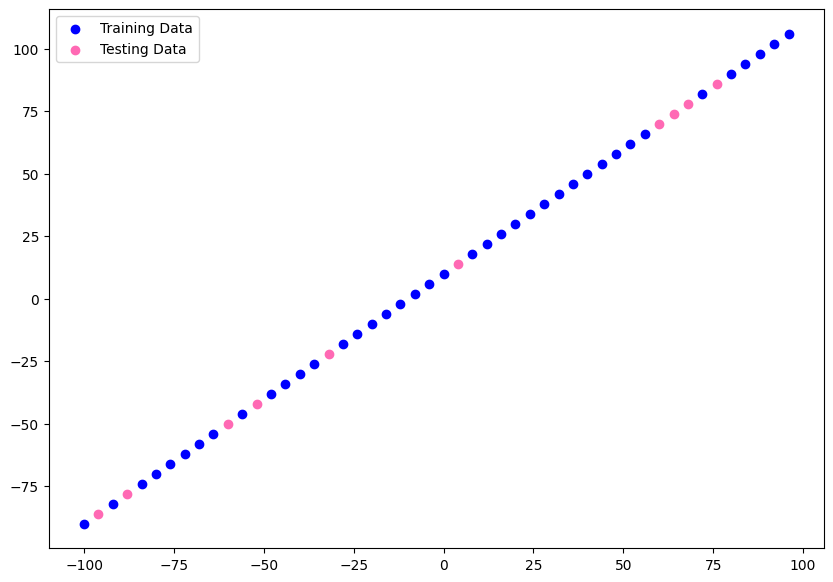

In [22]:
# to get around biases it is better to shuffle your data
# first create random indices to be able to shuffle
# both features and lables by the same order
indices = tf.range(start=0, limit=tf.shape(X)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

# use random indices to shuffle both tensors
X_random = tf.gather(X, shuffled_indices)
y_random = tf.gather(y, shuffled_indices)

# re-split
X_train = X_random[:40] # take first 80% of features
X_test = X_random[40:] # take last 20% of features
y_train = y_random[:40] # take first 80% of lables
y_test = y_random[40:] # take last 20% of lables

# visualize datasets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="hotpink", label="Testing Data")
plt.legend()

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_04.png)

### Create the Model

In [48]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    layers.Dense(1, input_shape=[1], name="input_layer"),
    layers.Dense(128, activation="relu", name="dense_layer1"),
    layers.Dropout(.25, name="dropout"),
    layers.Dense(64, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="my_model")
    # input and output shape is 1 - we input 1 value and create a 1 value prediction

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics="mae")

#### Visualize the Model

In [49]:
model.summary()
# Model: "my_model"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_layer (Dense)         (None, 1)                 2         
                                                                 
#  dense_layer1 (Dense)        (None, 128)               256       
                                                                 
#  dropout (Dropout)           (None, 128)               0         
                                                                 
#  dense_layer2 (Dense)        (None, 64)                8256      
                                                                 
#  output_layer (Dense)        (None, 1)                 65        
                                                                 
# =================================================================
# Total params: 8,579
# Trainable params: 8,579
# Non-trainable params: 0
# _________________________________________________________________


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 dense_layer1 (Dense)        (None, 128)               256       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer2 (Dense)        (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 8,579
Trainable params: 8,579
Non-trainable params: 0
_________________________________________________________________


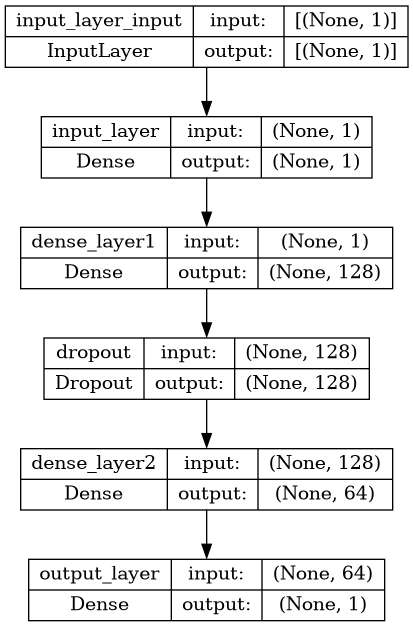

In [50]:
# plot the model
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True, expand_nested=False)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_05.png)

In [51]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=99)
# Epoch 99/99
# 2/2 [==============================] - 0s 25ms/step - loss: 3.1461 - mae: 3.1461 - val_loss: 3.8707 - val_mae: 3.8707

Epoch 1/99
2/2 [==============================] - 1s 123ms/step - loss: 40.1655 - mae: 40.1655 - val_loss: 13.3293 - val_mae: 13.3293
Epoch 2/99
2/2 [==============================] - 0s 24ms/step - loss: 15.1084 - mae: 15.1084 - val_loss: 7.7793 - val_mae: 7.7793
Epoch 3/99
2/2 [==============================] - 0s 24ms/step - loss: 9.5662 - mae: 9.5662 - val_loss: 14.1785 - val_mae: 14.1785
Epoch 4/99
2/2 [==============================] - 0s 23ms/step - loss: 11.7603 - mae: 11.7603 - val_loss: 10.7040 - val_mae: 10.7040
Epoch 5/99
2/2 [==============================] - 0s 26ms/step - loss: 8.7070 - mae: 8.7070 - val_loss: 8.3380 - val_mae: 8.3380
Epoch 6/99
2/2 [==============================] - 0s 25ms/step - loss: 8.8335 - mae: 8.8335 - val_loss: 12.4992 - val_mae: 12.4992
Epoch 7/99
2/2 [==============================] - 0s 23ms/step - loss: 10.9889 - mae: 10.9889 - val_loss: 6.9624 - val_mae: 6.9624
Epoch 8/99
2/2 [==============================] - 0s 23ms/step - loss: 7.8046 - 

Epoch 64/99
2/2 [==============================] - 0s 32ms/step - loss: 6.2927 - mae: 6.2927 - val_loss: 1.2439 - val_mae: 1.2439
Epoch 65/99
2/2 [==============================] - 0s 34ms/step - loss: 4.6568 - mae: 4.6568 - val_loss: 6.8394 - val_mae: 6.8394
Epoch 66/99
2/2 [==============================] - 0s 28ms/step - loss: 6.2298 - mae: 6.2298 - val_loss: 6.3053 - val_mae: 6.3053
Epoch 67/99
2/2 [==============================] - 0s 29ms/step - loss: 5.3919 - mae: 5.3919 - val_loss: 2.8499 - val_mae: 2.8499
Epoch 68/99
2/2 [==============================] - 0s 25ms/step - loss: 3.5117 - mae: 3.5117 - val_loss: 4.4861 - val_mae: 4.4861
Epoch 69/99
2/2 [==============================] - 0s 26ms/step - loss: 4.9115 - mae: 4.9115 - val_loss: 5.5630 - val_mae: 5.5630
Epoch 70/99
2/2 [==============================] - 0s 27ms/step - loss: 5.7446 - mae: 5.7446 - val_loss: 3.8763 - val_mae: 3.8763
Epoch 71/99
2/2 [==============================] - 0s 25ms/step - loss: 4.1981 - mae: 4.19

#### Visualize Predictions

In [79]:
# make predictions
y_pred = model.predict(X_test)

# predicted values & true values
tf.constant(y_pred), y_test
# (<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
#  array([[-44.232136],
#         [-88.13068 ],
#         [ 71.16495 ],
#         [-80.16996 ],
#         [-23.712166],
#         [ 63.83241 ],
#         [-52.232437],
#         [ 67.49867 ],
#         [ 78.4975  ],
#         [ 12.77635 ]], dtype=float32)>,
#  <tf.Tensor: shape=(10,), dtype=int32, numpy=array([-42, -86,  78, -78, -22,  70, -50,  74,  86,  14], dtype=int32)>)

1/1 [==============================] - 0s 19ms/step


(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[-44.232136],
        [-88.13068 ],
        [ 71.16495 ],
        [-80.16996 ],
        [-23.712166],
        [ 63.83241 ],
        [-52.232437],
        [ 67.49867 ],
        [ 78.4975  ],
        [ 12.77635 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([-42, -86,  78, -78, -22,  70, -50,  74,  86,  14], dtype=int32)>)

In [22]:
# plot train/test and compare predictions to ground truth
def plot_predictions(predictions,
                     train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, color="green", label="training data")
    plt.scatter(test_data, test_labels, color="red", label="testing data")
    plt.scatter(test_data, predictions, color="blue", label="predictions")
    plt.legend()

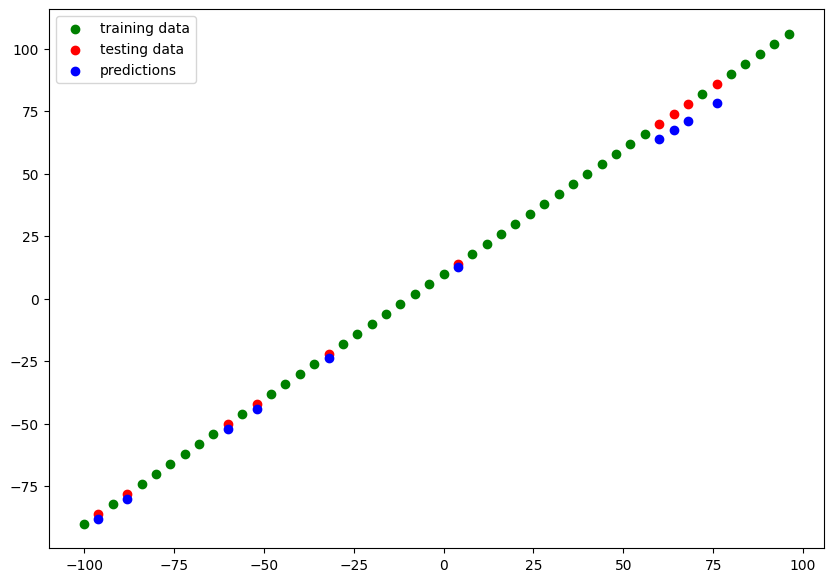

In [75]:
# blue dots should line up with red dots for a perfect prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_06.png)

### Regression Evaluation Metrics

Regression Metrics:

* `tf.keras.losses.MAE()`, `tf.metrics.mean_absolute_error()` - Mean absolute error (absolute value my predictions - on average - will be off)
* `tf.keras.losses.MSE()`, `tf.metrics.mean_suared_error()` - Mean square error (squared average error)
* `tf.keras.losses.Huber()` - Combination of MAE & MSE (less sensitive to outliers)

In [77]:
# get loss & metrics value in test mode
model.evaluate(X_test, y_test)
# since lossfunction & metrics are set to MAE we get the absolute error:
# [3.8707497119903564, 3.8707497119903564]

1/1 [==============================] - 0s 20ms/step - loss: 3.8707 - mae: 3.8707


[3.8707497119903564, 3.8707497119903564]

#### Absolute Error

In [82]:
# to compare y_test with y_pred we must make sure they have the same shape
y_test.shape, y_pred.shape
# (TensorShape([10]), (10, 1))

# removing extra dimension from prediction array
y_pred_squeezed = tf.squeeze(y_pred)
y_pred_squeezed.shape
# TensorShape([10])

TensorShape([10])

In [83]:
# calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_squeezed)

# this returns the same value for the absolute error as the eval method above
mae
# <tf.Tensor: shape=(), dtype=float32, numpy=3.8707497>

<tf.Tensor: shape=(), dtype=float32, numpy=3.8707497>

#### Squared Error

In [84]:
# calculate the MAE
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_squeezed)
mse
# <tf.Tensor: shape=(), dtype=float32, numpy=20.695545>

<tf.Tensor: shape=(), dtype=float32, numpy=20.695545>

In [85]:
# function to calculate both errors
def squared_and_absolute_error(y_true, y_pred):
    mae = tf.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.metrics.mean_squared_error(y_true, y_pred)
    
    return mae, mse

squared_and_absolute_error(y_true=y_test, y_pred=y_pred_squeezed)
# (<tf.Tensor: shape=(), dtype=float32, numpy=3.8707497>,
#  <tf.Tensor: shape=(), dtype=float32, numpy=20.695545>)

(<tf.Tensor: shape=(), dtype=float32, numpy=3.8707497>,
 <tf.Tensor: shape=(), dtype=float32, numpy=20.695545>)

### Optimizing Model Performance

#### Get more data

In [59]:
# create a new feature matrix
X = tf.range(-1000, 1000, 4)
# create labels for those features that follow a pattern
y = X + 10
len(X)
# 500 => 80:20 split = 400:100

500

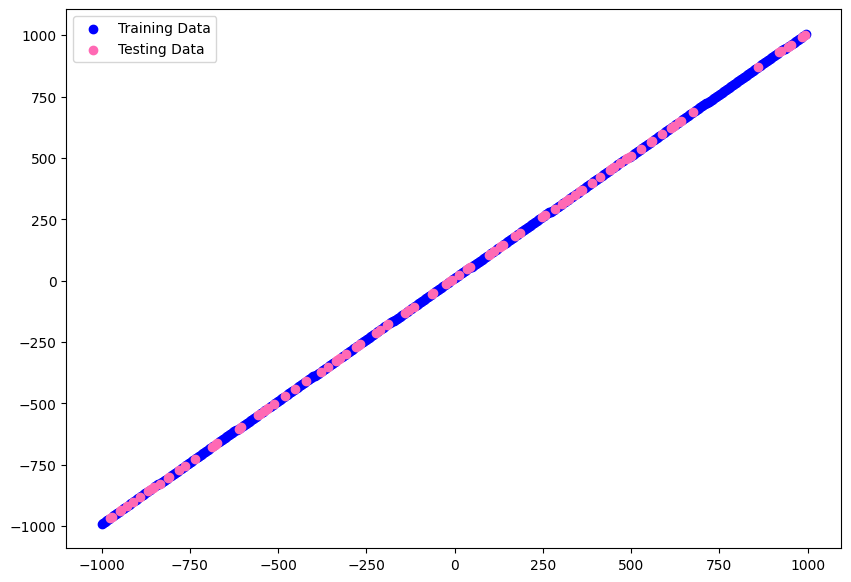

In [60]:
# to get around biases it is better to shuffle your data
# first create random indices to be able to shuffle
# both features and lables by the same order
indices = tf.range(start=0, limit=tf.shape(X)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

# use random indices to shuffle both tensors
X_random = tf.gather(X, shuffled_indices)
y_random = tf.gather(y, shuffled_indices)

# re-split
X_train = X_random[:400] # take first 80% of features
X_test = X_random[400:] # take last 20% of features
y_train = y_random[:400] # take first 80% of lables
y_test = y_random[400:] # take last 20% of lables

# visualize datasets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="hotpink", label="Testing Data")
plt.legend()

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_07.png)

### Add Model Complexity

* `model_1` - longer training 200 epochs
* `model_2` - add another dense layer
* `model_3` - add another dropout layer
* `model_4` - same as model above but trained for 500 epochs
* ... take the best model and reduce complexity to find an optimum

#### model_1

In [7]:
# longer training 200 epochs
model_1 = tf.keras.Sequential([
    layers.Dense(1, input_shape=[1], name="input_layer"),
    layers.Dense(128, activation="relu", name="dense_layer1"),
    layers.Dropout(.25, name="dropout"),
    layers.Dense(64, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="my_model_1")

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics="mae")

Epoch 1/200
13/13 [==============================] - 0s 7ms/step - loss: 31.6036 - mae: 31.6036 - val_loss: 18.1551 - val_mae: 18.1551
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 34.3236 - mae: 34.3236 - val_loss: 26.0814 - val_mae: 26.0814
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 36.3775 - mae: 36.3775 - val_loss: 10.0609 - val_mae: 10.0609
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 29.8732 - mae: 29.8732 - val_loss: 14.4481 - val_mae: 14.4481
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 33.2272 - mae: 33.2272 - val_loss: 16.9236 - val_mae: 16.9236
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 36.1037 - mae: 36.1037 - val_loss: 30.2905 - val_mae: 30.2905
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 34.1296 - mae: 34.1296 - val_loss: 16.2966 - val_mae: 16.2966
Epoch 8/200
13/13 [==============================] - 0s

13/13 [==============================] - 0s 6ms/step - loss: 26.9663 - mae: 26.9663 - val_loss: 39.9392 - val_mae: 39.9392
Epoch 122/200
13/13 [==============================] - 0s 5ms/step - loss: 27.3166 - mae: 27.3166 - val_loss: 38.3399 - val_mae: 38.3399
Epoch 123/200
13/13 [==============================] - 0s 5ms/step - loss: 28.0911 - mae: 28.0911 - val_loss: 29.6646 - val_mae: 29.6646
Epoch 124/200
13/13 [==============================] - 0s 5ms/step - loss: 26.2085 - mae: 26.2085 - val_loss: 29.6784 - val_mae: 29.6784
Epoch 125/200
13/13 [==============================] - 0s 5ms/step - loss: 25.1006 - mae: 25.1006 - val_loss: 30.9062 - val_mae: 30.9062
Epoch 126/200
13/13 [==============================] - 0s 5ms/step - loss: 25.3765 - mae: 25.3765 - val_loss: 42.1872 - val_mae: 42.1872
Epoch 127/200
13/13 [==============================] - 0s 6ms/step - loss: 25.7010 - mae: 25.7010 - val_loss: 32.0291 - val_mae: 32.0291
Epoch 128/200
13/13 [==============================] - 

Epoch 181/200
13/13 [==============================] - 0s 5ms/step - loss: 18.8514 - mae: 18.8514 - val_loss: 109.2067 - val_mae: 109.2067
Epoch 182/200
13/13 [==============================] - 0s 5ms/step - loss: 17.1174 - mae: 17.1174 - val_loss: 105.6453 - val_mae: 105.6453
Epoch 183/200
13/13 [==============================] - 0s 6ms/step - loss: 16.5721 - mae: 16.5721 - val_loss: 78.0556 - val_mae: 78.0556
Epoch 184/200
13/13 [==============================] - 0s 5ms/step - loss: 14.4966 - mae: 14.4966 - val_loss: 79.8654 - val_mae: 79.8654
Epoch 185/200
13/13 [==============================] - 0s 6ms/step - loss: 14.2603 - mae: 14.2603 - val_loss: 101.2646 - val_mae: 101.2646
Epoch 186/200
13/13 [==============================] - 0s 5ms/step - loss: 15.5184 - mae: 15.5184 - val_loss: 85.6567 - val_mae: 85.6567
Epoch 187/200
13/13 [==============================] - 0s 6ms/step - loss: 18.4779 - mae: 18.4779 - val_loss: 115.5181 - val_mae: 115.5181
Epoch 188/200
13/13 [============

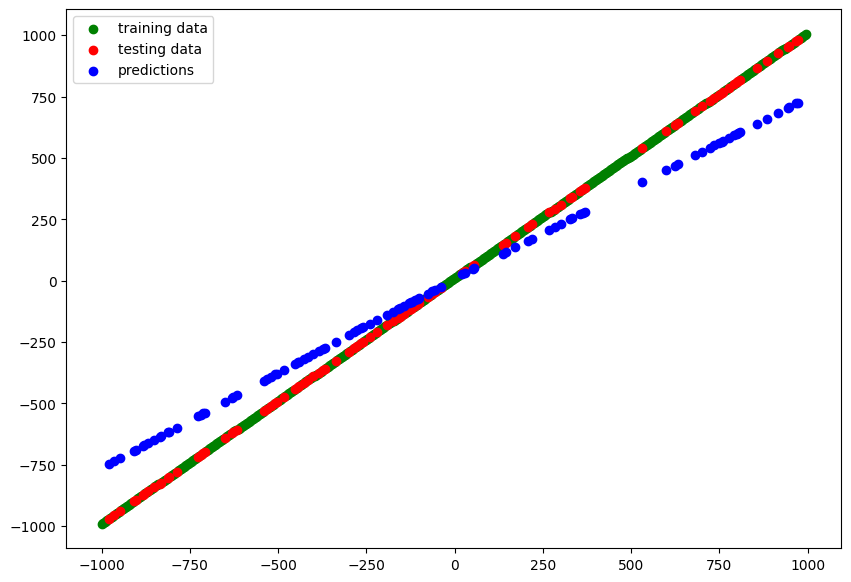

In [12]:
model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)
# Epoch 200/200
# 13/13 [==============================] - 0s 5ms/step - loss: 10.6268 - mae: 10.6268 - val_loss: 122.6467 - val_mae: 122.6467

y_pred_1 = model_1.predict(X_test)

# blue dots should line up with red dots for a perfect prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_1)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_08.png)

#### model_2

In [13]:
# add another dense layer
model_2 = tf.keras.Sequential([
    layers.Dense(1, input_shape=[1], name="input_layer"),
    layers.Dense(128, activation="relu", name="dense_layer1"),
    layers.Dropout(.25, name="dropout"),
    layers.Dense(64, activation="relu", name="dense_layer2"),
    layers.Dense(32, activation="relu", name="dense_layer3"),
    layers.Dense(1, name="output_layer")
], name="my_model_2")

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics="mae")

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 143.6586 - mae: 143.6586 - val_loss: 9.6779 - val_mae: 9.6779
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 52.2385 - mae: 52.2385 - val_loss: 30.5906 - val_mae: 30.5906
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 40.4875 - mae: 40.4875 - val_loss: 37.4773 - val_mae: 37.4773
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 42.7759 - mae: 42.7759 - val_loss: 26.2639 - val_mae: 26.2639
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 48.2024 - mae: 48.2024 - val_loss: 10.2532 - val_mae: 10.2532
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 50.8191 - mae: 50.8191 - val_loss: 54.5295 - val_mae: 54.5295
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 44.8948 - mae: 44.8948 - val_loss: 40.3873 - val_mae: 40.3873
Epoch 8/100
13/13 [==============================] - 0

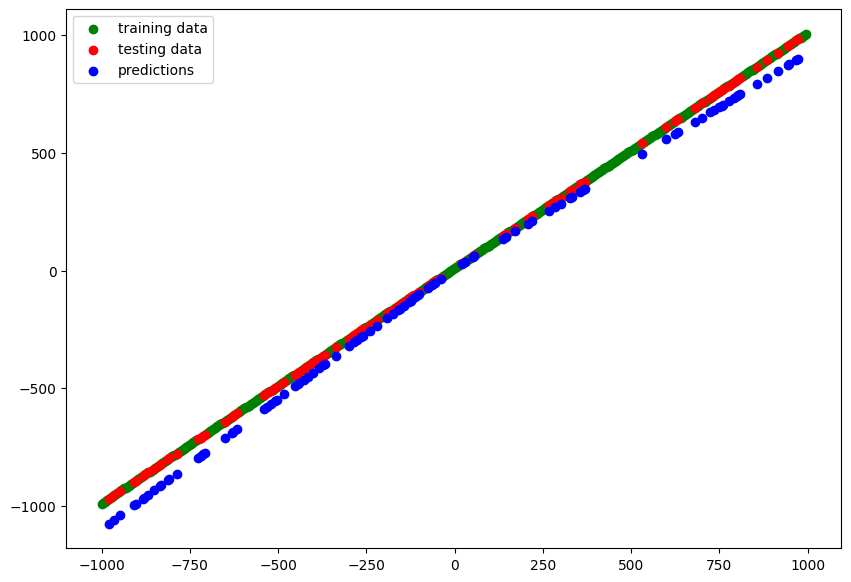

In [14]:
model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# Epoch 100/100
# 13/13 [==============================] - 0s 5ms/step - loss: 31.7044 - mae: 31.7044 - val_loss: 10.8619 - val_mae: 10.8619

y_pred_2 = model_2.predict(X_test)

# blue dots should line up with red dots for a perfect prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_2)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_09.png)

#### model_3

In [15]:
# add another dropout layer
model_3 = tf.keras.Sequential([
    layers.Dense(1, input_shape=[1], name="input_layer"),
    layers.Dense(128, activation="relu", name="dense_layer1"),
    layers.Dropout(.25, name="dropout1"),
    layers.Dense(64, activation="relu", name="dense_layer2"),
    layers.Dropout(.25, name="dropout2"),
    layers.Dense(32, activation="relu", name="dense_layer3"),
    layers.Dense(1, name="output_layer")
], name="my_model_3")

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics="mae")

Epoch 1/100
13/13 [==============================] - 2s 13ms/step - loss: 211.3777 - mae: 211.3777 - val_loss: 75.3931 - val_mae: 75.3931
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 108.8324 - mae: 108.8324 - val_loss: 26.8359 - val_mae: 26.8359
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 85.2959 - mae: 85.2959 - val_loss: 17.8240 - val_mae: 17.8240
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 75.0681 - mae: 75.0681 - val_loss: 10.4342 - val_mae: 10.4342
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 66.8371 - mae: 66.8371 - val_loss: 41.0600 - val_mae: 41.0600
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 68.9964 - mae: 68.9964 - val_loss: 12.1428 - val_mae: 12.1428
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 65.2114 - mae: 65.2114 - val_loss: 13.8204 - val_mae: 13.8204
Epoch 8/100
13/13 [==============================]

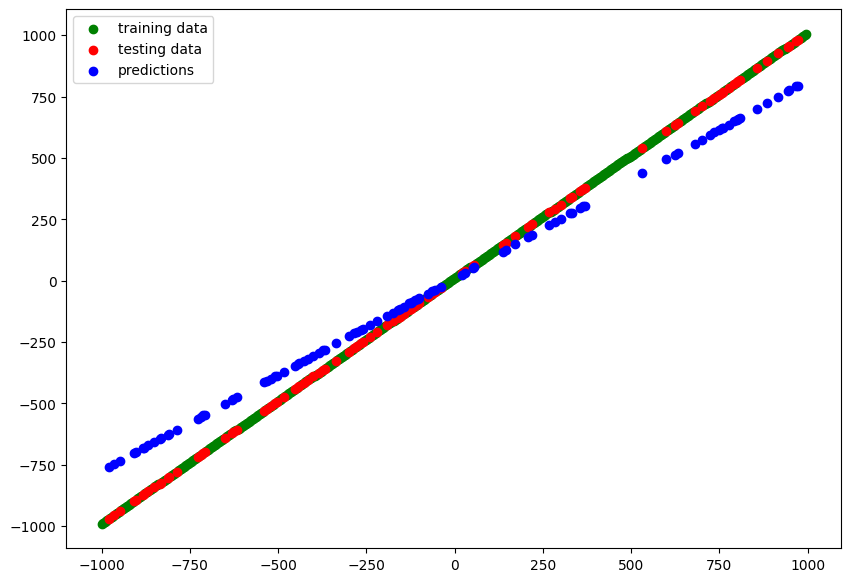

In [16]:
model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# Epoch 100/100
# 13/13 [==============================] - 0s 5ms/step - loss: 44.1139 - mae: 44.1139 - val_loss: 107.2299 - val_mae: 107.2299

y_pred_3 = model_3.predict(X_test)

# blue dots should line up with red dots for a perfect prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_3)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_10.png)

#### model_4

In [17]:
# same as model above but trained for 500 epochs
model_4 = tf.keras.Sequential([
    layers.Dense(1, input_shape=[1], name="input_layer"),
    layers.Dense(128, activation="relu", name="dense_layer1"),
    layers.Dropout(.25, name="dropout1"),
    layers.Dense(64, activation="relu", name="dense_layer2"),
    layers.Dropout(.25, name="dropout2"),
    layers.Dense(32, activation="relu", name="dense_layer3"),
    layers.Dense(1, name="output_layer")
], name="my_model_4")

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics="mae")

Epoch 1/500
13/13 [==============================] - 1s 13ms/step - loss: 161.2874 - mae: 161.2874 - val_loss: 28.5319 - val_mae: 28.5319
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 91.2878 - mae: 91.2878 - val_loss: 28.0316 - val_mae: 28.0316
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 86.4320 - mae: 86.4320 - val_loss: 13.4494 - val_mae: 13.4494
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 72.3500 - mae: 72.3500 - val_loss: 55.4059 - val_mae: 55.4059
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 74.4050 - mae: 74.4050 - val_loss: 37.3676 - val_mae: 37.3676
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 67.2565 - mae: 67.2565 - val_loss: 28.6105 - val_mae: 28.6105
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 72.3452 - mae: 72.3452 - val_loss: 22.0881 - val_mae: 22.0881
Epoch 8/500
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 39.3986 - mae: 39.3986 - val_loss: 115.0043 - val_mae: 115.0043
Epoch 121/500
13/13 [==============================] - 0s 5ms/step - loss: 42.5319 - mae: 42.5319 - val_loss: 147.2879 - val_mae: 147.2879
Epoch 122/500
13/13 [==============================] - 0s 5ms/step - loss: 45.7399 - mae: 45.7399 - val_loss: 118.2605 - val_mae: 118.2605
Epoch 123/500
13/13 [==============================] - 0s 5ms/step - loss: 49.2091 - mae: 49.2091 - val_loss: 130.4167 - val_mae: 130.4167
Epoch 124/500
13/13 [==============================] - 0s 4ms/step - loss: 53.1905 - mae: 53.1905 - val_loss: 128.9898 - val_mae: 128.9898
Epoch 125/500
13/13 [==============================] - 0s 5ms/step - loss: 52.7924 - mae: 52.7924 - val_loss: 111.3831 - val_mae: 111.3831
Epoch 126/500
13/13 [==============================] - 0s 5ms/step - loss: 41.6861 - mae: 41.6861 - val_loss: 126.2909 - val_mae: 126.2909
Epoch 127/500
13/13 [====================

13/13 [==============================] - 0s 5ms/step - loss: 40.3495 - mae: 40.3495 - val_loss: 135.9825 - val_mae: 135.9825
Epoch 180/500
13/13 [==============================] - 0s 5ms/step - loss: 41.6765 - mae: 41.6765 - val_loss: 135.8359 - val_mae: 135.8359
Epoch 181/500
13/13 [==============================] - 0s 5ms/step - loss: 40.4315 - mae: 40.4315 - val_loss: 132.7589 - val_mae: 132.7589
Epoch 182/500
13/13 [==============================] - 0s 5ms/step - loss: 42.5872 - mae: 42.5872 - val_loss: 127.0509 - val_mae: 127.0509
Epoch 183/500
13/13 [==============================] - 0s 5ms/step - loss: 35.3592 - mae: 35.3592 - val_loss: 131.2493 - val_mae: 131.2493
Epoch 184/500
13/13 [==============================] - 0s 5ms/step - loss: 46.0807 - mae: 46.0807 - val_loss: 88.7899 - val_mae: 88.7899
Epoch 185/500
13/13 [==============================] - 0s 5ms/step - loss: 43.9476 - mae: 43.9476 - val_loss: 144.8673 - val_mae: 144.8673
Epoch 186/500
13/13 [======================

13/13 [==============================] - 0s 5ms/step - loss: 41.0698 - mae: 41.0698 - val_loss: 130.9221 - val_mae: 130.9221
Epoch 239/500
13/13 [==============================] - 0s 5ms/step - loss: 34.7258 - mae: 34.7258 - val_loss: 157.5995 - val_mae: 157.5995
Epoch 240/500
13/13 [==============================] - 0s 5ms/step - loss: 43.3335 - mae: 43.3335 - val_loss: 149.7811 - val_mae: 149.7811
Epoch 241/500
13/13 [==============================] - 0s 6ms/step - loss: 43.7746 - mae: 43.7746 - val_loss: 117.1313 - val_mae: 117.1313
Epoch 242/500
13/13 [==============================] - 0s 5ms/step - loss: 39.5753 - mae: 39.5753 - val_loss: 115.4134 - val_mae: 115.4134
Epoch 243/500
13/13 [==============================] - 0s 5ms/step - loss: 37.2010 - mae: 37.2010 - val_loss: 135.9483 - val_mae: 135.9483
Epoch 244/500
13/13 [==============================] - 0s 5ms/step - loss: 39.8375 - mae: 39.8375 - val_loss: 132.1195 - val_mae: 132.1195
Epoch 245/500
13/13 [====================

13/13 [==============================] - 0s 5ms/step - loss: 35.9540 - mae: 35.9540 - val_loss: 121.0155 - val_mae: 121.0155
Epoch 298/500
13/13 [==============================] - 0s 6ms/step - loss: 45.3348 - mae: 45.3348 - val_loss: 108.0885 - val_mae: 108.0885
Epoch 299/500
13/13 [==============================] - 0s 5ms/step - loss: 42.2193 - mae: 42.2193 - val_loss: 118.5941 - val_mae: 118.5941
Epoch 300/500
13/13 [==============================] - 0s 5ms/step - loss: 38.3346 - mae: 38.3346 - val_loss: 120.4968 - val_mae: 120.4968
Epoch 301/500
13/13 [==============================] - 0s 6ms/step - loss: 37.5477 - mae: 37.5477 - val_loss: 123.5975 - val_mae: 123.5975
Epoch 302/500
13/13 [==============================] - 0s 6ms/step - loss: 36.9141 - mae: 36.9141 - val_loss: 133.5374 - val_mae: 133.5374
Epoch 303/500
13/13 [==============================] - 0s 6ms/step - loss: 33.8926 - mae: 33.8926 - val_loss: 136.8112 - val_mae: 136.8112
Epoch 304/500
13/13 [====================

13/13 [==============================] - 0s 6ms/step - loss: 40.7233 - mae: 40.7233 - val_loss: 90.4390 - val_mae: 90.4390
Epoch 357/500
13/13 [==============================] - 0s 6ms/step - loss: 39.5133 - mae: 39.5133 - val_loss: 125.6914 - val_mae: 125.6914
Epoch 358/500
13/13 [==============================] - 0s 6ms/step - loss: 37.5852 - mae: 37.5852 - val_loss: 122.3570 - val_mae: 122.3570
Epoch 359/500
13/13 [==============================] - 0s 5ms/step - loss: 34.6861 - mae: 34.6861 - val_loss: 105.8974 - val_mae: 105.8974
Epoch 360/500
13/13 [==============================] - 0s 5ms/step - loss: 42.4505 - mae: 42.4505 - val_loss: 135.0956 - val_mae: 135.0956
Epoch 361/500
13/13 [==============================] - 0s 6ms/step - loss: 38.9987 - mae: 38.9987 - val_loss: 118.8765 - val_mae: 118.8765
Epoch 362/500
13/13 [==============================] - 0s 5ms/step - loss: 36.6089 - mae: 36.6089 - val_loss: 146.6886 - val_mae: 146.6886
Epoch 363/500
13/13 [======================

13/13 [==============================] - 0s 6ms/step - loss: 38.9523 - mae: 38.9523 - val_loss: 144.3881 - val_mae: 144.3881
Epoch 416/500
13/13 [==============================] - 0s 5ms/step - loss: 48.4887 - mae: 48.4887 - val_loss: 145.3249 - val_mae: 145.3249
Epoch 417/500
13/13 [==============================] - 0s 6ms/step - loss: 37.2895 - mae: 37.2895 - val_loss: 143.0798 - val_mae: 143.0798
Epoch 418/500
13/13 [==============================] - 0s 6ms/step - loss: 37.4791 - mae: 37.4791 - val_loss: 124.9278 - val_mae: 124.9278
Epoch 419/500
13/13 [==============================] - 0s 5ms/step - loss: 37.9532 - mae: 37.9532 - val_loss: 102.3894 - val_mae: 102.3894
Epoch 420/500
13/13 [==============================] - 0s 5ms/step - loss: 44.5833 - mae: 44.5833 - val_loss: 147.0978 - val_mae: 147.0978
Epoch 421/500
13/13 [==============================] - 0s 5ms/step - loss: 45.5970 - mae: 45.5970 - val_loss: 124.7635 - val_mae: 124.7635
Epoch 422/500
13/13 [====================

13/13 [==============================] - 0s 6ms/step - loss: 38.7148 - mae: 38.7148 - val_loss: 108.1434 - val_mae: 108.1434
Epoch 475/500
13/13 [==============================] - 0s 5ms/step - loss: 35.1686 - mae: 35.1686 - val_loss: 137.0124 - val_mae: 137.0124
Epoch 476/500
13/13 [==============================] - 0s 5ms/step - loss: 35.4344 - mae: 35.4344 - val_loss: 120.3743 - val_mae: 120.3743
Epoch 477/500
13/13 [==============================] - 0s 5ms/step - loss: 37.5573 - mae: 37.5573 - val_loss: 142.6868 - val_mae: 142.6868
Epoch 478/500
13/13 [==============================] - 0s 5ms/step - loss: 38.9389 - mae: 38.9389 - val_loss: 110.3636 - val_mae: 110.3636
Epoch 479/500
13/13 [==============================] - 0s 5ms/step - loss: 38.4246 - mae: 38.4246 - val_loss: 143.5871 - val_mae: 143.5871
Epoch 480/500
13/13 [==============================] - 0s 5ms/step - loss: 40.4710 - mae: 40.4710 - val_loss: 127.0315 - val_mae: 127.0315
Epoch 481/500
13/13 [====================

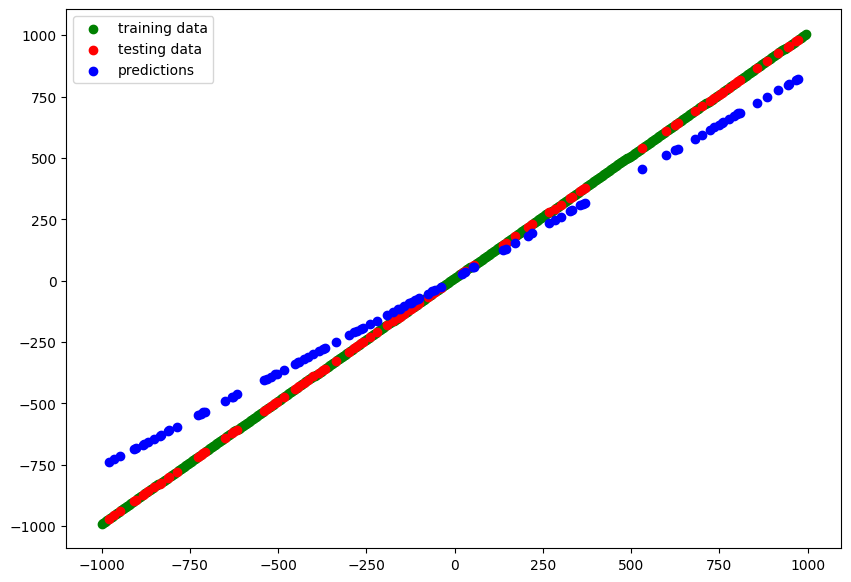

In [18]:
model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)
# Epoch 500/500
# 13/13 [==============================] - 0s 5ms/step - loss: 38.3689 - mae: 38.3689 - val_loss: 143.9144 - val_mae: 143.9144

y_pred_4 = model_4.predict(X_test)

# blue dots should line up with red dots for a perfect prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_4)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_11.png)

#### model_5

In [19]:
# I am getting the best results with `model_2`
# but a 2nd dropout layer seems to reduce the performance
# let's remove the 1st dropout
model_5 = tf.keras.Sequential([
    layers.Dense(1, input_shape=[1], name="input_layer"),
    layers.Dense(128, activation="relu", name="dense_layer1"),
    layers.Dense(64, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="my_model_5")

model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics="mae")

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 477.6631 - mae: 477.6631 - val_loss: 447.9326 - val_mae: 447.9326
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 433.8457 - mae: 433.8457 - val_loss: 401.1877 - val_mae: 401.1877
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 378.2622 - mae: 378.2622 - val_loss: 329.3852 - val_mae: 329.3852
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 290.1796 - mae: 290.1796 - val_loss: 214.1151 - val_mae: 214.1151
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 152.4059 - mae: 152.4059 - val_loss: 57.5977 - val_mae: 57.5977
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 37.8096 - mae: 37.8096 - val_loss: 28.4989 - val_mae: 28.4989
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 18.3268 - mae: 18.3268 - val_loss: 10.6431 - val_mae: 10.6431
Epoch 8/100
13/13 [=================

Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 1.4186 - mae: 1.4186 - val_loss: 0.6925 - val_mae: 0.6925
Epoch 64/100
13/13 [==============================] - 0s 5ms/step - loss: 1.8609 - mae: 1.8609 - val_loss: 2.2861 - val_mae: 2.2861
Epoch 65/100
13/13 [==============================] - 0s 5ms/step - loss: 2.8216 - mae: 2.8216 - val_loss: 2.3768 - val_mae: 2.3768
Epoch 66/100
13/13 [==============================] - 0s 5ms/step - loss: 2.0676 - mae: 2.0676 - val_loss: 2.1216 - val_mae: 2.1216
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 1.2882 - mae: 1.2882 - val_loss: 0.6003 - val_mae: 0.6003
Epoch 68/100
13/13 [==============================] - 0s 5ms/step - loss: 1.5108 - mae: 1.5108 - val_loss: 2.9733 - val_mae: 2.9733
Epoch 69/100
13/13 [==============================] - 0s 5ms/step - loss: 2.6997 - mae: 2.6997 - val_loss: 2.1180 - val_mae: 2.1180
Epoch 70/100
13/13 [==============================] - 0s 5ms/step - loss: 1.

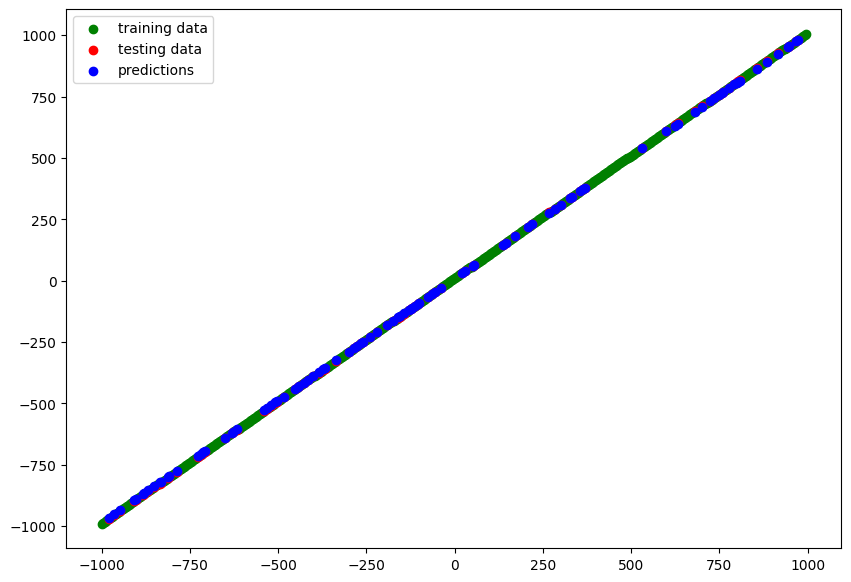

In [20]:
model_5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# Epoch 100/100
# 13/13 [==============================] - 0s 4ms/step - loss: 2.1195 - mae: 2.1195 - val_loss: 2.9318 - val_mae: 2.9318

y_pred_5 = model_5.predict(X_test)

# blue dots should line up with red dots for a perfect prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_5)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_12.png)

#### model_6

In [21]:
# same as above - based on `model_2`
# but more complexity removed
model_6 = tf.keras.Sequential([
    layers.Dense(1, input_shape=[1], name="input_layer"),
    layers.Dense(64, activation="relu", name="dense_layer1"),
    layers.Dense(32, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="my_model_6")

model_6.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics="mae")

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 378.5552 - mae: 378.5552 - val_loss: 319.1344 - val_mae: 319.1344
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 262.8046 - mae: 262.8046 - val_loss: 206.8240 - val_mae: 206.8240
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 137.3412 - mae: 137.3412 - val_loss: 104.3937 - val_mae: 104.3937
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 62.8305 - mae: 62.8305 - val_loss: 24.9376 - val_mae: 24.9376
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 18.5050 - mae: 18.5050 - val_loss: 16.3517 - val_mae: 16.3517
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 10.0983 - mae: 10.0983 - val_loss: 5.6018 - val_mae: 5.6018
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 5.4800 - mae: 5.4800 - val_loss: 4.3601 - val_mae: 4.3601
Epoch 8/100
13/13 [=============================

Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 2.6374 - mae: 2.6374 - val_loss: 3.7935 - val_mae: 3.7935
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 3.2661 - mae: 3.2661 - val_loss: 2.8361 - val_mae: 2.8361
Epoch 65/100
13/13 [==============================] - 0s 5ms/step - loss: 2.8581 - mae: 2.8581 - val_loss: 3.2971 - val_mae: 3.2971
Epoch 66/100
13/13 [==============================] - 0s 5ms/step - loss: 3.2126 - mae: 3.2126 - val_loss: 3.0356 - val_mae: 3.0356
Epoch 67/100
13/13 [==============================] - 0s 5ms/step - loss: 3.2027 - mae: 3.2027 - val_loss: 2.6071 - val_mae: 2.6071
Epoch 68/100
13/13 [==============================] - 0s 5ms/step - loss: 3.5572 - mae: 3.5572 - val_loss: 3.5314 - val_mae: 3.5314
Epoch 69/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7340 - mae: 2.7340 - val_loss: 3.0068 - val_mae: 3.0068
Epoch 70/100
13/13 [==============================] - 0s 5ms/step - loss: 2.

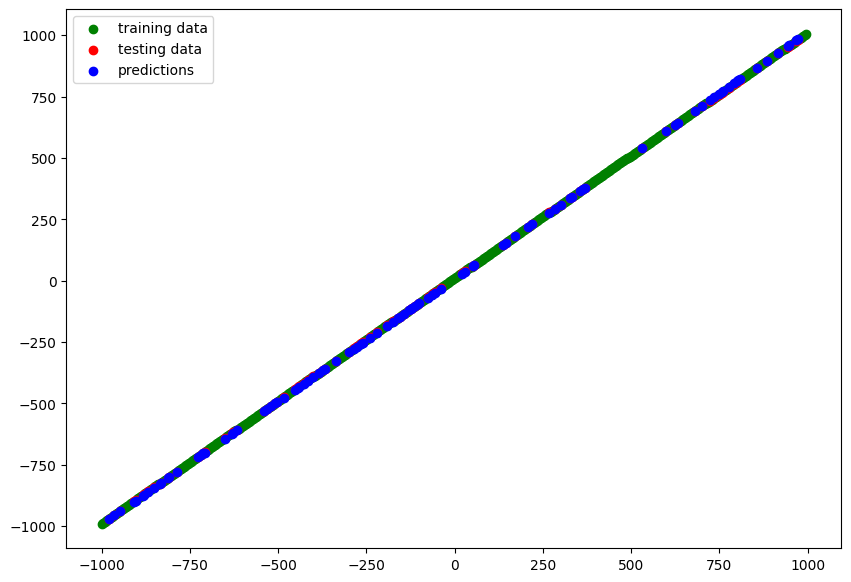

In [22]:
model_6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# Epoch 100/100
# 13/13 [==============================] - 0s 5ms/step - loss: 1.9283 - mae: 1.9283 - val_loss: 2.0062 - val_mae: 2.0062

y_pred_6 = model_6.predict(X_test)

# blue dots should line up with red dots for a perfect prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_6)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_13.png)

#### model_7

In [23]:
# same as above - based on `model_2`
# but even more complexity removed
model_7 = tf.keras.Sequential([
    layers.Dense(1, input_shape=[1], name="input_layer"),
    layers.Dense(16, activation="relu", name="dense_layer1"),
    layers.Dense(8, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="my_model_6")

model_7.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics="mae")

Epoch 1/500
13/13 [==============================] - 1s 14ms/step - loss: 465.8888 - mae: 465.8888 - val_loss: 453.4268 - val_mae: 453.4268
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 441.1689 - mae: 441.1689 - val_loss: 430.4008 - val_mae: 430.4008
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 414.9956 - mae: 414.9956 - val_loss: 404.2722 - val_mae: 404.2722
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 385.9467 - mae: 385.9467 - val_loss: 374.4695 - val_mae: 374.4695
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 352.1628 - mae: 352.1628 - val_loss: 340.7601 - val_mae: 340.7601
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 314.4102 - mae: 314.4102 - val_loss: 301.2552 - val_mae: 301.2552
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 269.4601 - mae: 269.4601 - val_loss: 255.1228 - val_mae: 255.1228
Epoch 8/500
13/13 [=======

Epoch 124/500
13/13 [==============================] - 0s 5ms/step - loss: 2.3649 - mae: 2.3649 - val_loss: 2.4666 - val_mae: 2.4666
Epoch 125/500
13/13 [==============================] - 0s 5ms/step - loss: 2.2555 - mae: 2.2555 - val_loss: 2.6940 - val_mae: 2.6940
Epoch 126/500
13/13 [==============================] - 0s 5ms/step - loss: 2.2251 - mae: 2.2251 - val_loss: 2.3959 - val_mae: 2.3959
Epoch 127/500
13/13 [==============================] - 0s 5ms/step - loss: 2.2208 - mae: 2.2208 - val_loss: 2.5156 - val_mae: 2.5156
Epoch 128/500
13/13 [==============================] - 0s 5ms/step - loss: 2.2790 - mae: 2.2790 - val_loss: 2.3410 - val_mae: 2.3410
Epoch 129/500
13/13 [==============================] - 0s 5ms/step - loss: 2.1844 - mae: 2.1844 - val_loss: 2.3540 - val_mae: 2.3540
Epoch 130/500
13/13 [==============================] - 0s 5ms/step - loss: 2.3194 - mae: 2.3194 - val_loss: 2.2027 - val_mae: 2.2027
Epoch 131/500
13/13 [==============================] - 0s 5ms/step - 

Epoch 247/500
13/13 [==============================] - 0s 5ms/step - loss: 0.9399 - mae: 0.9399 - val_loss: 1.3573 - val_mae: 1.3573
Epoch 248/500
13/13 [==============================] - 0s 5ms/step - loss: 1.3428 - mae: 1.3428 - val_loss: 0.4194 - val_mae: 0.4194
Epoch 249/500
13/13 [==============================] - 0s 5ms/step - loss: 1.4136 - mae: 1.4136 - val_loss: 3.1813 - val_mae: 3.1813
Epoch 250/500
13/13 [==============================] - 0s 5ms/step - loss: 2.1439 - mae: 2.1439 - val_loss: 2.4128 - val_mae: 2.4128
Epoch 251/500
13/13 [==============================] - 0s 5ms/step - loss: 1.2208 - mae: 1.2208 - val_loss: 1.5745 - val_mae: 1.5745
Epoch 252/500
13/13 [==============================] - 0s 5ms/step - loss: 0.9277 - mae: 0.9277 - val_loss: 0.5731 - val_mae: 0.5731
Epoch 253/500
13/13 [==============================] - 0s 5ms/step - loss: 0.9118 - mae: 0.9118 - val_loss: 1.0800 - val_mae: 1.0800
Epoch 254/500
13/13 [==============================] - 0s 5ms/step - 

Epoch 370/500
13/13 [==============================] - 0s 5ms/step - loss: 0.9158 - mae: 0.9158 - val_loss: 0.8919 - val_mae: 0.8919
Epoch 371/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6758 - mae: 0.6758 - val_loss: 0.3083 - val_mae: 0.3083
Epoch 372/500
13/13 [==============================] - 0s 5ms/step - loss: 0.8517 - mae: 0.8517 - val_loss: 0.7123 - val_mae: 0.7123
Epoch 373/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5981 - mae: 0.5981 - val_loss: 0.5709 - val_mae: 0.5709
Epoch 374/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5938 - mae: 0.5938 - val_loss: 0.9991 - val_mae: 0.9991
Epoch 375/500
13/13 [==============================] - 0s 5ms/step - loss: 0.9272 - mae: 0.9272 - val_loss: 1.8068 - val_mae: 1.8068
Epoch 376/500
13/13 [==============================] - 0s 5ms/step - loss: 0.8560 - mae: 0.8560 - val_loss: 1.2550 - val_mae: 1.2550
Epoch 377/500
13/13 [==============================] - 0s 5ms/step - 

Epoch 493/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6449 - mae: 0.6449 - val_loss: 1.2179 - val_mae: 1.2179
Epoch 494/500
13/13 [==============================] - 0s 5ms/step - loss: 1.0523 - mae: 1.0523 - val_loss: 0.6237 - val_mae: 0.6237
Epoch 495/500
13/13 [==============================] - 0s 5ms/step - loss: 0.7011 - mae: 0.7011 - val_loss: 0.5986 - val_mae: 0.5986
Epoch 496/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5001 - mae: 0.5001 - val_loss: 0.5867 - val_mae: 0.5867
Epoch 497/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5038 - mae: 0.5038 - val_loss: 1.0164 - val_mae: 1.0164
Epoch 498/500
13/13 [==============================] - 0s 5ms/step - loss: 0.7561 - mae: 0.7561 - val_loss: 0.5226 - val_mae: 0.5226
Epoch 499/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6307 - mae: 0.6307 - val_loss: 1.1849 - val_mae: 1.1849
Epoch 500/500
4/4 [==============================] - 0s 2ms/step


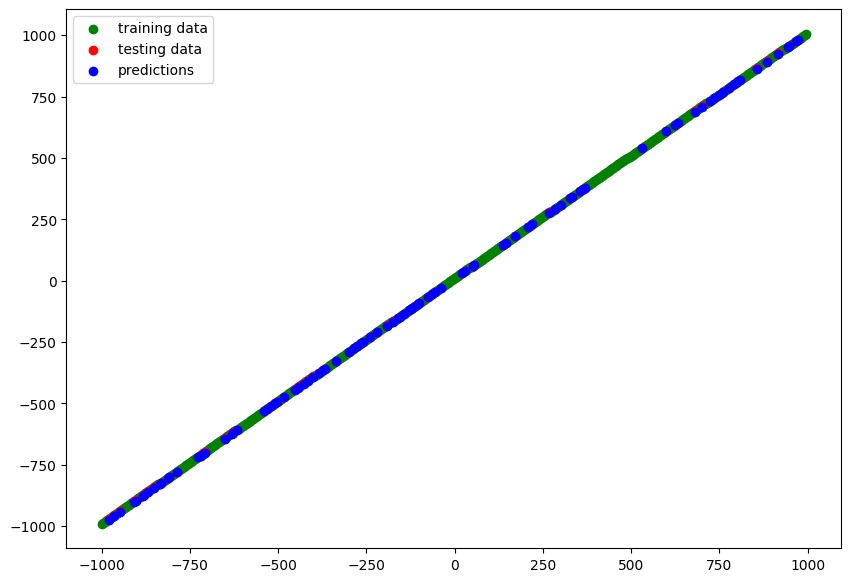

In [24]:
# increased epochs 100 -> 500
model_7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)
# Epoch 500/500
# 13/13 [==============================] - 0s 5ms/step - loss: 0.6490 - mae: 0.6490 - val_loss: 0.9975 - val_mae: 0.9975

y_pred_7 = model_7.predict(X_test)

# blue dots should line up with red dots for a perfect prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_7)

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_14.png)

### Comparing Experiments

In [47]:
# function to calculate mae & mse
def squared_and_absolute_error(y_true, y_pred):
    mae = tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))
    mse = tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))
    
    return mae.numpy(), mse.numpy()

In [48]:
# calculate errors for all models
model_1_err = squared_and_absolute_error(y_true=y_test, y_pred=y_pred_1)
model_2_err = squared_and_absolute_error(y_true=y_test, y_pred=y_pred_2)
model_3_err = squared_and_absolute_error(y_true=y_test, y_pred=y_pred_3)
model_4_err = squared_and_absolute_error(y_true=y_test, y_pred=y_pred_4)
model_5_err = squared_and_absolute_error(y_true=y_test, y_pred=y_pred_5)
model_6_err = squared_and_absolute_error(y_true=y_test, y_pred=y_pred_6)
model_7_err = squared_and_absolute_error(y_true=y_test, y_pred=y_pred_7)


In [49]:
model_err = [["model_1", model_1_err[0], model_1_err[1]],
             ["model_2", model_2_err[0], model_2_err[1]],
             ["model_3", model_3_err[0], model_3_err[1]],
             ["model_4", model_4_err[0], model_4_err[1]],
             ["model_5", model_5_err[0], model_5_err[1]],
             ["model_6", model_6_err[0], model_6_err[1]],
             ["model_7", model_7_err[0], model_7_err[1]]]

result_table = pd.DataFrame(model_err, columns=["model", "mae", "mse"])
# sort results by lowest error
result_table.sort_values(by=['mae'])

,model,mae,mse
6,model_7,1.144104,1.818071
5,model_6,1.684225,3.257224
4,model_5,2.049126,5.940683
1,model_2,49.432564,3300.268799
3,model_4,100.509567,14063.405273
2,model_3,102.297127,14211.152344
0,model_1,121.414032,20278.529297


In [50]:
# the best performing model is `model_7`
model_7.summary()

# Model: "my_model_6"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_layer (Dense)         (None, 1)                 2         
                                                                 
#  dense_layer1 (Dense)        (None, 16)                32        
                                                                 
#  dense_layer2 (Dense)        (None, 8)                 136       
                                                                 
#  output_layer (Dense)        (None, 1)                 9         
                                                                 
# =================================================================
# Total params: 179
# Trainable params: 179
# Non-trainable params: 0
# _________________________________________________________________

Model: "my_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 dense_layer1 (Dense)        (None, 16)                32        
                                                                 
 dense_layer2 (Dense)        (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


## Saving the Trained Models

1. `SavedModel` format (default)
2. `HDF5` format (easier to transfer outside of TF)

In [51]:
# assign location
path='saved_models/SavedModel_Format'
# saving to SavedModel
model_7.save(path)

INFO:tensorflow:Assets written to: saved_models/SavedModel_Format/assets


In [52]:
# assign location
path_hdf5='saved_models/hdf5_format.h5'
# saving to HDF5
model_7.save(path_hdf5)

### Restoring a Saved Model

In [56]:
loaded_SavedModel = tf.keras.models.load_model(path)
# Verify that it is the correct model
loaded_SavedModel.summary()

# Model: "my_model_6"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_layer (Dense)         (None, 1)                 2         
                                                                 
#  dense_layer1 (Dense)        (None, 16)                32        
                                                                 
#  dense_layer2 (Dense)        (None, 8)                 136       
                                                                 
#  output_layer (Dense)        (None, 1)                 9         
                                                                 
# =================================================================
# Total params: 179
# Trainable params: 179
# Non-trainable params: 0
# _________________________________________________________________


Model: "my_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 dense_layer1 (Dense)        (None, 16)                32        
                                                                 
 dense_layer2 (Dense)        (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [62]:
# make a prediction with the restored model
# lets find a value pair from the test dataset
X_test[66], y_test[66]
# (<tf.Tensor: shape=(), dtype=int32, numpy=-944>,
#  <tf.Tensor: shape=(), dtype=int32, numpy=-934>)
# So for a feature value of `-944` we should receive a label value of `-943`

(<tf.Tensor: shape=(), dtype=int32, numpy=-944>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-934>)

In [63]:
# run prediction
loaded_SavedModel.predict([-944])
# array([[-936.5761]], dtype=float32)

1/1 [==============================] - 0s 62ms/step


array([[-936.5761]], dtype=float32)

In [64]:
loaded_HDF5Model = tf.keras.models.load_model(path_hdf5)
# Verify that it is the correct model
loaded_HDF5Model.summary()

# Model: "my_model_6"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_layer (Dense)         (None, 1)                 2         
                                                                 
#  dense_layer1 (Dense)        (None, 16)                32        
                                                                 
#  dense_layer2 (Dense)        (None, 8)                 136       
                                                                 
#  output_layer (Dense)        (None, 1)                 9         
                                                                 
# =================================================================
# Total params: 179
# Trainable params: 179
# Non-trainable params: 0
# _________________________________________________________________

Model: "my_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 dense_layer1 (Dense)        (None, 16)                32        
                                                                 
 dense_layer2 (Dense)        (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [65]:
# run prediction
loaded_HDF5Model.predict([-944])
# array([[-936.5761]], dtype=float32)
# the result is identical to the result we get from
# the restored SavedModel format model

1/1 [==============================] - 0s 67ms/step


array([[-936.5761]], dtype=float32)

In [66]:
model_7.predict([-944]) == loaded_SavedModel.predict([-944]) == loaded_HDF5Model.predict([-944])
# array([[ True]])
# the restored models predict the identical values

1/1 [==============================] - 0s 30ms/step


array([[ True]])

## Medical Cost Dataset

The [Medical Cost Dataset](https://github.com/mpolinowski/Machine-Learning-with-R-datasets) investigates if you can accurately predict insurance costs based on:

* __age__: age of primary beneficiary
* __sex__: insurance contractor gender, female, male
* __bmi__: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (`kg / m ^ 2`) using the ratio of height to weight, ideally `18.5` to `24.9`
* __children__: Number of children covered by health insurance / Number of dependents
* __smoker__: Smoking
* __region__: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* __charges__: Individual medical costs billed by health insurance

In [3]:
# get insurance dataset
insurance_data = pd.read_csv('https://raw.githubusercontent.com/mpolinowski/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_15.png)

In [13]:
# shuffle dataframe to prevent bias
insurance_data_random = insurance_data.sample(frac=1)
insurance_data_random

,age,sex,bmi,children,smoker,region,charges
974,26,male,35.420,0,no,southeast,2322.62180
1009,51,male,27.740,1,no,northeast,9957.72160
610,47,female,29.370,1,no,southeast,8547.69130
772,44,female,36.480,0,no,northeast,12797.20962
628,58,male,38.000,0,no,southwest,11365.95200
...,...,...,...,...,...,...,...
1074,60,female,18.335,0,no,northeast,13204.28565
176,38,male,27.835,2,no,northwest,6455.86265
322,34,male,30.800,0,yes,southwest,35491.64000
1234,45,female,27.830,2,no,southeast,8515.75870


![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_16.png)

In [15]:
# creating numerical labels for strings
# convert categorical variables into indicator variables with pandas get_dummies
insurance_one_hot = pd.get_dummies(insurance_data_random)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
974,26,35.42,0,2322.62180,0,1,1,0,0,0,1,0
1009,51,27.74,1,9957.72160,0,1,1,0,1,0,0,0
610,47,29.37,1,8547.69130,1,0,1,0,0,0,1,0
772,44,36.48,0,12797.20962,1,0,1,0,1,0,0,0
628,58,38.00,0,11365.95200,0,1,1,0,0,0,0,1


![](../assets/01a_Tensorflow_Regressions_17.png)

In [19]:
# create features and labels
# we need to predict "charges" - so drop this column from features
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [21]:
# training and testing data split using scikit-learn
# this function actually randomizes the dataset for us
# we did not need to shuffle the dataframe before - doesn't hurt, though
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train
# 80% => 1070 rows × 11 columns

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
181,18,38.280,0,1,0,1,0,0,0,1,0
1039,19,27.265,2,0,1,1,0,0,1,0,0
1004,47,19.190,1,0,1,1,0,1,0,0,0
787,21,36.860,0,0,1,1,0,0,1,0,0
1220,30,21.945,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1051,64,26.410,0,0,1,1,0,1,0,0,0
640,33,42.400,5,0,1,1,0,0,0,0,1
97,55,38.280,0,0,1,1,0,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0


![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_18.png)

### Model Building

In [33]:
tf.random.set_seed(42)

# building the model (based on the "best model" above)
insurance_model = tf.keras.Sequential([
    layers.Dense(10, input_shape=[11], name="input_layer"),
    layers.Dense(16, activation="relu", name="dense_layer1"),
    layers.Dense(8, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="insurance_model")

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics="mae")

In [27]:
# model training
insurance_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)
# Epoch 500/500
# 34/34 [==============================] - 0s 3ms/step - loss: 2702.7041 - mae: 2702.7041 - val_loss: 2433.1829 - val_mae: 2433.1829

Epoch 1/500
34/34 [==============================] - 1s 6ms/step - loss: 13252.7139 - mae: 13252.7139 - val_loss: 13392.1553 - val_mae: 13392.1553
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13238.4414 - mae: 13238.4414 - val_loss: 13378.5264 - val_mae: 13378.5264
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13221.5781 - mae: 13221.5781 - val_loss: 13353.8809 - val_mae: 13353.8809
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13183.1953 - mae: 13183.1953 - val_loss: 13297.4424 - val_mae: 13297.4424
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 13102.9678 - mae: 13102.9678 - val_loss: 13184.5518 - val_mae: 13184.5518
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 12945.8848 - mae: 12945.8848 - val_loss: 12967.3506 - val_mae: 12967.3506
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 12652.7617 - mae: 12652.7617 - val_loss: 1257

Epoch 58/500
34/34 [==============================] - 0s 4ms/step - loss: 6904.2690 - mae: 6904.2690 - val_loss: 7166.5767 - val_mae: 7166.5767
Epoch 59/500
34/34 [==============================] - 0s 4ms/step - loss: 6885.3389 - mae: 6885.3389 - val_loss: 7146.6133 - val_mae: 7146.6133
Epoch 60/500
34/34 [==============================] - 0s 3ms/step - loss: 6867.1968 - mae: 6867.1968 - val_loss: 7128.4023 - val_mae: 7128.4023
Epoch 61/500
34/34 [==============================] - 0s 3ms/step - loss: 6849.0156 - mae: 6849.0156 - val_loss: 7109.8145 - val_mae: 7109.8145
Epoch 62/500
34/34 [==============================] - 0s 3ms/step - loss: 6829.2661 - mae: 6829.2661 - val_loss: 7093.3784 - val_mae: 7093.3784
Epoch 63/500
34/34 [==============================] - 0s 3ms/step - loss: 6808.7881 - mae: 6808.7881 - val_loss: 7071.8833 - val_mae: 7071.8833
Epoch 64/500
34/34 [==============================] - 0s 4ms/step - loss: 6789.4624 - mae: 6789.4624 - val_loss: 7049.6836 - val_mae: 70

Epoch 115/500
34/34 [==============================] - 0s 4ms/step - loss: 6064.9512 - mae: 6064.9512 - val_loss: 6326.5142 - val_mae: 6326.5142
Epoch 116/500
34/34 [==============================] - 0s 4ms/step - loss: 6052.8018 - mae: 6052.8018 - val_loss: 6310.0029 - val_mae: 6310.0029
Epoch 117/500
34/34 [==============================] - 0s 4ms/step - loss: 6033.8301 - mae: 6033.8301 - val_loss: 6294.8994 - val_mae: 6294.8994
Epoch 118/500
34/34 [==============================] - 0s 3ms/step - loss: 6025.4424 - mae: 6025.4424 - val_loss: 6277.4204 - val_mae: 6277.4204
Epoch 119/500
34/34 [==============================] - 0s 3ms/step - loss: 6010.5146 - mae: 6010.5146 - val_loss: 6260.4546 - val_mae: 6260.4546
Epoch 120/500
34/34 [==============================] - 0s 3ms/step - loss: 5990.4346 - mae: 5990.4346 - val_loss: 6242.8984 - val_mae: 6242.8984
Epoch 121/500
34/34 [==============================] - 0s 3ms/step - loss: 5973.4873 - mae: 5973.4873 - val_loss: 6225.6880 - val_

34/34 [==============================] - 0s 3ms/step - loss: 3595.7417 - mae: 3595.7417 - val_loss: 3739.7485 - val_mae: 3739.7485
Epoch 172/500
34/34 [==============================] - 0s 3ms/step - loss: 3587.1816 - mae: 3587.1816 - val_loss: 3728.3867 - val_mae: 3728.3867
Epoch 173/500
34/34 [==============================] - 0s 3ms/step - loss: 3584.1267 - mae: 3584.1267 - val_loss: 3714.5962 - val_mae: 3714.5962
Epoch 174/500
34/34 [==============================] - 0s 4ms/step - loss: 3576.9409 - mae: 3576.9409 - val_loss: 3712.8647 - val_mae: 3712.8647
Epoch 175/500
34/34 [==============================] - 0s 3ms/step - loss: 3572.2800 - mae: 3572.2800 - val_loss: 3692.4500 - val_mae: 3692.4500
Epoch 176/500
34/34 [==============================] - 0s 3ms/step - loss: 3578.7991 - mae: 3578.7991 - val_loss: 3681.3511 - val_mae: 3681.3511
Epoch 177/500
34/34 [==============================] - 0s 3ms/step - loss: 3571.6184 - mae: 3571.6184 - val_loss: 3671.2339 - val_mae: 3671.2339

34/34 [==============================] - 0s 3ms/step - loss: 3371.0283 - mae: 3371.0283 - val_loss: 3314.9644 - val_mae: 3314.9644
Epoch 228/500
34/34 [==============================] - 0s 3ms/step - loss: 3371.5740 - mae: 3371.5740 - val_loss: 3328.7197 - val_mae: 3328.7197
Epoch 229/500
34/34 [==============================] - 0s 3ms/step - loss: 3371.0085 - mae: 3371.0085 - val_loss: 3305.9473 - val_mae: 3305.9473
Epoch 230/500
34/34 [==============================] - 0s 3ms/step - loss: 3365.9661 - mae: 3365.9661 - val_loss: 3299.8823 - val_mae: 3299.8823
Epoch 231/500
34/34 [==============================] - 0s 3ms/step - loss: 3355.7039 - mae: 3355.7039 - val_loss: 3286.5764 - val_mae: 3286.5764
Epoch 232/500
34/34 [==============================] - 0s 3ms/step - loss: 3355.6492 - mae: 3355.6492 - val_loss: 3287.9563 - val_mae: 3287.9563
Epoch 233/500
34/34 [==============================] - 0s 3ms/step - loss: 3357.9456 - mae: 3357.9456 - val_loss: 3275.0872 - val_mae: 3275.0872

34/34 [==============================] - 0s 3ms/step - loss: 3195.4294 - mae: 3195.4294 - val_loss: 2960.9180 - val_mae: 2960.9180
Epoch 284/500
34/34 [==============================] - 0s 3ms/step - loss: 3193.6978 - mae: 3193.6978 - val_loss: 2957.4441 - val_mae: 2957.4441
Epoch 285/500
34/34 [==============================] - 0s 3ms/step - loss: 3194.0945 - mae: 3194.0945 - val_loss: 2954.8135 - val_mae: 2954.8135
Epoch 286/500
34/34 [==============================] - 0s 3ms/step - loss: 3194.6643 - mae: 3194.6643 - val_loss: 2971.1665 - val_mae: 2971.1665
Epoch 287/500
34/34 [==============================] - 0s 3ms/step - loss: 3193.7747 - mae: 3193.7747 - val_loss: 2948.0969 - val_mae: 2948.0969
Epoch 288/500
34/34 [==============================] - 0s 3ms/step - loss: 3190.0051 - mae: 3190.0051 - val_loss: 2951.6753 - val_mae: 2951.6753
Epoch 289/500
34/34 [==============================] - 0s 3ms/step - loss: 3185.4851 - mae: 3185.4851 - val_loss: 2946.1060 - val_mae: 2946.1060

34/34 [==============================] - 0s 3ms/step - loss: 3099.9231 - mae: 3099.9231 - val_loss: 2830.8833 - val_mae: 2830.8833
Epoch 340/500
34/34 [==============================] - 0s 3ms/step - loss: 3100.8979 - mae: 3100.8979 - val_loss: 2835.1262 - val_mae: 2835.1262
Epoch 341/500
34/34 [==============================] - 0s 3ms/step - loss: 3096.2690 - mae: 3096.2690 - val_loss: 2831.5479 - val_mae: 2831.5479
Epoch 342/500
34/34 [==============================] - 0s 3ms/step - loss: 3101.7363 - mae: 3101.7363 - val_loss: 2822.1133 - val_mae: 2822.1133
Epoch 343/500
34/34 [==============================] - 0s 3ms/step - loss: 3092.5193 - mae: 3092.5193 - val_loss: 2821.9414 - val_mae: 2821.9414
Epoch 344/500
34/34 [==============================] - 0s 3ms/step - loss: 3093.3835 - mae: 3093.3835 - val_loss: 2823.1277 - val_mae: 2823.1277
Epoch 345/500
34/34 [==============================] - 0s 3ms/step - loss: 3104.4634 - mae: 3104.4634 - val_loss: 2823.6497 - val_mae: 2823.6497

34/34 [==============================] - 0s 3ms/step - loss: 2992.3882 - mae: 2992.3882 - val_loss: 2690.9058 - val_mae: 2690.9058
Epoch 396/500
34/34 [==============================] - 0s 3ms/step - loss: 2986.8406 - mae: 2986.8406 - val_loss: 2699.8672 - val_mae: 2699.8672
Epoch 397/500
34/34 [==============================] - 0s 3ms/step - loss: 2985.4763 - mae: 2985.4763 - val_loss: 2691.3713 - val_mae: 2691.3713
Epoch 398/500
34/34 [==============================] - 0s 3ms/step - loss: 2976.7329 - mae: 2976.7329 - val_loss: 2687.8857 - val_mae: 2687.8857
Epoch 399/500
34/34 [==============================] - 0s 3ms/step - loss: 2981.1973 - mae: 2981.1973 - val_loss: 2683.2571 - val_mae: 2683.2571
Epoch 400/500
34/34 [==============================] - 0s 3ms/step - loss: 2975.1238 - mae: 2975.1238 - val_loss: 2690.9392 - val_mae: 2690.9392
Epoch 401/500
34/34 [==============================] - 0s 3ms/step - loss: 2981.3792 - mae: 2981.3792 - val_loss: 2674.9402 - val_mae: 2674.9402

34/34 [==============================] - 0s 3ms/step - loss: 2823.7776 - mae: 2823.7776 - val_loss: 2543.1406 - val_mae: 2543.1406
Epoch 452/500
34/34 [==============================] - 0s 3ms/step - loss: 2821.0803 - mae: 2821.0803 - val_loss: 2559.3599 - val_mae: 2559.3599
Epoch 453/500
34/34 [==============================] - 0s 3ms/step - loss: 2819.2546 - mae: 2819.2546 - val_loss: 2547.2876 - val_mae: 2547.2876
Epoch 454/500
34/34 [==============================] - 0s 3ms/step - loss: 2819.1917 - mae: 2819.1917 - val_loss: 2532.0667 - val_mae: 2532.0667
Epoch 455/500
34/34 [==============================] - 0s 3ms/step - loss: 2815.4644 - mae: 2815.4644 - val_loss: 2551.7642 - val_mae: 2551.7642
Epoch 456/500
34/34 [==============================] - 0s 3ms/step - loss: 2811.6514 - mae: 2811.6514 - val_loss: 2528.3076 - val_mae: 2528.3076
Epoch 457/500
34/34 [==============================] - 0s 3ms/step - loss: 2808.5833 - mae: 2808.5833 - val_loss: 2547.7339 - val_mae: 2547.7339

In [28]:
# we have an average absolute validation error of val_mae: `2433.1829`
y_train.median(), y_train.mean()
# (9373.744050000001, 13240.898205242056)

# the arithmetic average is of medical charges is `13240.898` => 18.4% off

(9373.744050000001, 13240.898205242056)

### Improving the Model

In [34]:
# since the model was still improving I will extend the training
insurance_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5000)
# I am still seeing improvements after 5000 epochs

# Epoch 5000/5000
# 34/34 [==============================] - 0s 3ms/step - loss: 1498.0355 - mae: 1498.0355 - val_loss: 1543.5344 - val_mae: 1543.5344

# the error is now down to 11% from 18% before

Epoch 1/5000
34/34 [==============================] - 1s 6ms/step - loss: 13204.1582 - mae: 13204.1582 - val_loss: 13330.0537 - val_mae: 13330.0537
Epoch 2/5000
34/34 [==============================] - 0s 3ms/step - loss: 13155.5195 - mae: 13155.5195 - val_loss: 13268.8613 - val_mae: 13268.8613
Epoch 3/5000
34/34 [==============================] - 0s 3ms/step - loss: 13072.2900 - mae: 13072.2900 - val_loss: 13155.7559 - val_mae: 13155.7559
Epoch 4/5000
34/34 [==============================] - 0s 3ms/step - loss: 12918.6201 - mae: 12918.6201 - val_loss: 12949.6699 - val_mae: 12949.6699
Epoch 5/5000
34/34 [==============================] - 0s 3ms/step - loss: 12643.3955 - mae: 12643.3955 - val_loss: 12589.5977 - val_mae: 12589.5977
Epoch 6/5000
34/34 [==============================] - 0s 3ms/step - loss: 12178.5479 - mae: 12178.5479 - val_loss: 11994.2021 - val_mae: 11994.2021
Epoch 7/5000
34/34 [==============================] - 0s 3ms/step - loss: 11433.3984 - mae: 11433.3984 - val_los

34/34 [==============================] - 0s 3ms/step - loss: 6488.2422 - mae: 6488.2422 - val_loss: 6748.0884 - val_mae: 6748.0884
Epoch 58/5000
34/34 [==============================] - 0s 3ms/step - loss: 6473.9268 - mae: 6473.9268 - val_loss: 6733.2720 - val_mae: 6733.2720
Epoch 59/5000
34/34 [==============================] - 0s 4ms/step - loss: 6458.3579 - mae: 6458.3579 - val_loss: 6726.3022 - val_mae: 6726.3022
Epoch 60/5000
34/34 [==============================] - 0s 3ms/step - loss: 6448.5503 - mae: 6448.5503 - val_loss: 6720.9844 - val_mae: 6720.9844
Epoch 61/5000
34/34 [==============================] - 0s 4ms/step - loss: 6435.1938 - mae: 6435.1938 - val_loss: 6708.1323 - val_mae: 6708.1323
Epoch 62/5000
34/34 [==============================] - 0s 3ms/step - loss: 6424.1152 - mae: 6424.1152 - val_loss: 6708.2720 - val_mae: 6708.2720
Epoch 63/5000
34/34 [==============================] - 0s 3ms/step - loss: 6414.8936 - mae: 6414.8936 - val_loss: 6695.7739 - val_mae: 6695.7739

34/34 [==============================] - 0s 3ms/step - loss: 5785.6963 - mae: 5785.6963 - val_loss: 6050.1426 - val_mae: 6050.1426
Epoch 114/5000
34/34 [==============================] - 0s 3ms/step - loss: 5764.1533 - mae: 5764.1533 - val_loss: 6013.4551 - val_mae: 6013.4551
Epoch 115/5000
34/34 [==============================] - 0s 4ms/step - loss: 5737.6299 - mae: 5737.6299 - val_loss: 5996.1763 - val_mae: 5996.1763
Epoch 116/5000
34/34 [==============================] - 0s 3ms/step - loss: 5716.3921 - mae: 5716.3921 - val_loss: 5968.5269 - val_mae: 5968.5269
Epoch 117/5000
34/34 [==============================] - 0s 3ms/step - loss: 5684.8604 - mae: 5684.8604 - val_loss: 5931.9053 - val_mae: 5931.9053
Epoch 118/5000
34/34 [==============================] - 0s 3ms/step - loss: 5657.7310 - mae: 5657.7310 - val_loss: 5904.4653 - val_mae: 5904.4653
Epoch 119/5000
34/34 [==============================] - 0s 3ms/step - loss: 5631.3892 - mae: 5631.3892 - val_loss: 5874.7715 - val_mae: 587

34/34 [==============================] - 0s 4ms/step - loss: 3726.9399 - mae: 3726.9399 - val_loss: 3866.9219 - val_mae: 3866.9219
Epoch 170/5000
34/34 [==============================] - 0s 3ms/step - loss: 3729.1936 - mae: 3729.1936 - val_loss: 3892.7847 - val_mae: 3892.7847
Epoch 171/5000
34/34 [==============================] - 0s 3ms/step - loss: 3722.1113 - mae: 3722.1113 - val_loss: 3863.9558 - val_mae: 3863.9558
Epoch 172/5000
34/34 [==============================] - 0s 3ms/step - loss: 3723.7212 - mae: 3723.7212 - val_loss: 3861.3528 - val_mae: 3861.3528
Epoch 173/5000
34/34 [==============================] - 0s 3ms/step - loss: 3726.5225 - mae: 3726.5225 - val_loss: 3863.4751 - val_mae: 3863.4751
Epoch 174/5000
34/34 [==============================] - 0s 3ms/step - loss: 3723.1824 - mae: 3723.1824 - val_loss: 3866.2424 - val_mae: 3866.2424
Epoch 175/5000
34/34 [==============================] - 0s 3ms/step - loss: 3714.4661 - mae: 3714.4661 - val_loss: 3849.4434 - val_mae: 384

34/34 [==============================] - 0s 3ms/step - loss: 3630.5503 - mae: 3630.5503 - val_loss: 3731.2603 - val_mae: 3731.2603
Epoch 226/5000
34/34 [==============================] - 0s 3ms/step - loss: 3631.8833 - mae: 3631.8833 - val_loss: 3724.5461 - val_mae: 3724.5461
Epoch 227/5000
34/34 [==============================] - 0s 3ms/step - loss: 3629.4268 - mae: 3629.4268 - val_loss: 3724.2214 - val_mae: 3724.2214
Epoch 228/5000
34/34 [==============================] - 0s 3ms/step - loss: 3632.8193 - mae: 3632.8193 - val_loss: 3736.7224 - val_mae: 3736.7224
Epoch 229/5000
34/34 [==============================] - 0s 3ms/step - loss: 3634.3689 - mae: 3634.3689 - val_loss: 3714.3401 - val_mae: 3714.3401
Epoch 230/5000
34/34 [==============================] - 0s 3ms/step - loss: 3632.5491 - mae: 3632.5491 - val_loss: 3711.2368 - val_mae: 3711.2368
Epoch 231/5000
34/34 [==============================] - 0s 3ms/step - loss: 3624.3601 - mae: 3624.3601 - val_loss: 3708.2712 - val_mae: 370

34/34 [==============================] - 0s 4ms/step - loss: 3496.0090 - mae: 3496.0090 - val_loss: 3509.0283 - val_mae: 3509.0283
Epoch 282/5000
34/34 [==============================] - 0s 3ms/step - loss: 3502.7788 - mae: 3502.7788 - val_loss: 3586.4333 - val_mae: 3586.4333
Epoch 283/5000
34/34 [==============================] - 0s 3ms/step - loss: 3493.5134 - mae: 3493.5134 - val_loss: 3511.9084 - val_mae: 3511.9084
Epoch 284/5000
34/34 [==============================] - 0s 4ms/step - loss: 3488.3232 - mae: 3488.3232 - val_loss: 3495.1499 - val_mae: 3495.1499
Epoch 285/5000
34/34 [==============================] - 0s 4ms/step - loss: 3474.4109 - mae: 3474.4109 - val_loss: 3492.9324 - val_mae: 3492.9324
Epoch 286/5000
34/34 [==============================] - 0s 4ms/step - loss: 3472.8838 - mae: 3472.8838 - val_loss: 3483.5708 - val_mae: 3483.5708
Epoch 287/5000
34/34 [==============================] - 0s 5ms/step - loss: 3469.8650 - mae: 3469.8650 - val_loss: 3476.6470 - val_mae: 347

34/34 [==============================] - 0s 3ms/step - loss: 3214.6936 - mae: 3214.6936 - val_loss: 3118.7671 - val_mae: 3118.7671
Epoch 338/5000
34/34 [==============================] - 0s 3ms/step - loss: 3205.3752 - mae: 3205.3752 - val_loss: 3114.1504 - val_mae: 3114.1504
Epoch 339/5000
34/34 [==============================] - 0s 3ms/step - loss: 3204.2534 - mae: 3204.2534 - val_loss: 3125.9922 - val_mae: 3125.9922
Epoch 340/5000
34/34 [==============================] - 0s 3ms/step - loss: 3199.7146 - mae: 3199.7146 - val_loss: 3125.8125 - val_mae: 3125.8125
Epoch 341/5000
34/34 [==============================] - 0s 3ms/step - loss: 3186.4895 - mae: 3186.4895 - val_loss: 3099.6396 - val_mae: 3099.6396
Epoch 342/5000
34/34 [==============================] - 0s 3ms/step - loss: 3184.2966 - mae: 3184.2966 - val_loss: 3093.5408 - val_mae: 3093.5408
Epoch 343/5000
34/34 [==============================] - 0s 3ms/step - loss: 3177.4431 - mae: 3177.4431 - val_loss: 3091.2139 - val_mae: 309

34/34 [==============================] - 0s 5ms/step - loss: 3099.0706 - mae: 3099.0706 - val_loss: 2957.1021 - val_mae: 2957.1021
Epoch 394/5000
34/34 [==============================] - 0s 4ms/step - loss: 3105.4507 - mae: 3105.4507 - val_loss: 2955.6233 - val_mae: 2955.6233
Epoch 395/5000
34/34 [==============================] - 0s 4ms/step - loss: 3098.8318 - mae: 3098.8318 - val_loss: 2962.5459 - val_mae: 2962.5459
Epoch 396/5000
34/34 [==============================] - 0s 5ms/step - loss: 3101.7810 - mae: 3101.7810 - val_loss: 2952.8628 - val_mae: 2952.8628
Epoch 397/5000
34/34 [==============================] - 0s 4ms/step - loss: 3094.7295 - mae: 3094.7295 - val_loss: 2969.1541 - val_mae: 2969.1541
Epoch 398/5000
34/34 [==============================] - 0s 4ms/step - loss: 3095.5542 - mae: 3095.5542 - val_loss: 2970.0696 - val_mae: 2970.0696
Epoch 399/5000
34/34 [==============================] - 0s 4ms/step - loss: 3095.1516 - mae: 3095.1516 - val_loss: 2949.8738 - val_mae: 294

34/34 [==============================] - 0s 3ms/step - loss: 3050.3140 - mae: 3050.3140 - val_loss: 2873.7727 - val_mae: 2873.7727
Epoch 450/5000
34/34 [==============================] - 0s 3ms/step - loss: 3049.9187 - mae: 3049.9187 - val_loss: 2884.4172 - val_mae: 2884.4172
Epoch 451/5000
34/34 [==============================] - 0s 3ms/step - loss: 3050.3831 - mae: 3050.3831 - val_loss: 2871.5828 - val_mae: 2871.5828
Epoch 452/5000
34/34 [==============================] - 0s 3ms/step - loss: 3048.6025 - mae: 3048.6025 - val_loss: 2879.1377 - val_mae: 2879.1377
Epoch 453/5000
34/34 [==============================] - 0s 3ms/step - loss: 3047.7021 - mae: 3047.7021 - val_loss: 2904.4492 - val_mae: 2904.4492
Epoch 454/5000
34/34 [==============================] - 0s 3ms/step - loss: 3054.9268 - mae: 3054.9268 - val_loss: 2872.1121 - val_mae: 2872.1121
Epoch 455/5000
34/34 [==============================] - 0s 3ms/step - loss: 3057.0994 - mae: 3057.0994 - val_loss: 2867.6758 - val_mae: 286

34/34 [==============================] - 0s 4ms/step - loss: 3014.1714 - mae: 3014.1714 - val_loss: 2816.1292 - val_mae: 2816.1292
Epoch 506/5000
34/34 [==============================] - 0s 3ms/step - loss: 3013.9841 - mae: 3013.9841 - val_loss: 2824.6987 - val_mae: 2824.6987
Epoch 507/5000
34/34 [==============================] - 0s 4ms/step - loss: 3024.8508 - mae: 3024.8508 - val_loss: 2819.7642 - val_mae: 2819.7642
Epoch 508/5000
34/34 [==============================] - 0s 4ms/step - loss: 3011.4368 - mae: 3011.4368 - val_loss: 2811.9766 - val_mae: 2811.9766
Epoch 509/5000
34/34 [==============================] - 0s 4ms/step - loss: 3015.3008 - mae: 3015.3008 - val_loss: 2809.6453 - val_mae: 2809.6453
Epoch 510/5000
34/34 [==============================] - 0s 4ms/step - loss: 3009.6033 - mae: 3009.6033 - val_loss: 2809.1724 - val_mae: 2809.1724
Epoch 511/5000
34/34 [==============================] - 0s 4ms/step - loss: 3008.1353 - mae: 3008.1353 - val_loss: 2822.3469 - val_mae: 282

34/34 [==============================] - 0s 3ms/step - loss: 2981.5593 - mae: 2981.5593 - val_loss: 2773.7622 - val_mae: 2773.7622
Epoch 562/5000
34/34 [==============================] - 0s 4ms/step - loss: 2985.0940 - mae: 2985.0940 - val_loss: 2767.8630 - val_mae: 2767.8630
Epoch 563/5000
34/34 [==============================] - 0s 4ms/step - loss: 2977.5137 - mae: 2977.5137 - val_loss: 2764.2053 - val_mae: 2764.2053
Epoch 564/5000
34/34 [==============================] - 0s 3ms/step - loss: 2983.4556 - mae: 2983.4556 - val_loss: 2765.2344 - val_mae: 2765.2344
Epoch 565/5000
34/34 [==============================] - 0s 3ms/step - loss: 2979.7146 - mae: 2979.7146 - val_loss: 2768.4937 - val_mae: 2768.4937
Epoch 566/5000
34/34 [==============================] - 0s 3ms/step - loss: 2980.6057 - mae: 2980.6057 - val_loss: 2761.5962 - val_mae: 2761.5962
Epoch 567/5000
34/34 [==============================] - 0s 3ms/step - loss: 2984.0068 - mae: 2984.0068 - val_loss: 2766.9314 - val_mae: 276

34/34 [==============================] - 0s 3ms/step - loss: 2948.8564 - mae: 2948.8564 - val_loss: 2722.0784 - val_mae: 2722.0784
Epoch 618/5000
34/34 [==============================] - 0s 3ms/step - loss: 2953.3752 - mae: 2953.3752 - val_loss: 2752.7375 - val_mae: 2752.7375
Epoch 619/5000
34/34 [==============================] - 0s 3ms/step - loss: 2964.1880 - mae: 2964.1880 - val_loss: 2725.2207 - val_mae: 2725.2207
Epoch 620/5000
34/34 [==============================] - 0s 3ms/step - loss: 2958.2798 - mae: 2958.2798 - val_loss: 2717.3411 - val_mae: 2717.3411
Epoch 621/5000
34/34 [==============================] - 0s 3ms/step - loss: 2951.1201 - mae: 2951.1201 - val_loss: 2717.0437 - val_mae: 2717.0437
Epoch 622/5000
34/34 [==============================] - 0s 3ms/step - loss: 2944.3792 - mae: 2944.3792 - val_loss: 2724.9128 - val_mae: 2724.9128
Epoch 623/5000
34/34 [==============================] - 0s 3ms/step - loss: 2941.8135 - mae: 2941.8135 - val_loss: 2717.6963 - val_mae: 271

34/34 [==============================] - 0s 3ms/step - loss: 2914.7891 - mae: 2914.7891 - val_loss: 2681.5264 - val_mae: 2681.5264
Epoch 674/5000
34/34 [==============================] - 0s 3ms/step - loss: 2917.5518 - mae: 2917.5518 - val_loss: 2681.0688 - val_mae: 2681.0688
Epoch 675/5000
34/34 [==============================] - 0s 3ms/step - loss: 2924.2065 - mae: 2924.2065 - val_loss: 2674.9504 - val_mae: 2674.9504
Epoch 676/5000
34/34 [==============================] - 0s 3ms/step - loss: 2920.5232 - mae: 2920.5232 - val_loss: 2692.6677 - val_mae: 2692.6677
Epoch 677/5000
34/34 [==============================] - 0s 3ms/step - loss: 2915.5464 - mae: 2915.5464 - val_loss: 2681.4778 - val_mae: 2681.4778
Epoch 678/5000
34/34 [==============================] - 0s 3ms/step - loss: 2917.6147 - mae: 2917.6147 - val_loss: 2676.3491 - val_mae: 2676.3491
Epoch 679/5000
34/34 [==============================] - 0s 3ms/step - loss: 2911.9092 - mae: 2911.9092 - val_loss: 2676.5649 - val_mae: 267

34/34 [==============================] - 0s 3ms/step - loss: 2886.9648 - mae: 2886.9648 - val_loss: 2642.6343 - val_mae: 2642.6343
Epoch 730/5000
34/34 [==============================] - 0s 4ms/step - loss: 2888.7388 - mae: 2888.7388 - val_loss: 2636.3792 - val_mae: 2636.3792
Epoch 731/5000
34/34 [==============================] - 0s 3ms/step - loss: 2884.1060 - mae: 2884.1060 - val_loss: 2637.8201 - val_mae: 2637.8201
Epoch 732/5000
34/34 [==============================] - 0s 3ms/step - loss: 2893.2244 - mae: 2893.2244 - val_loss: 2634.0095 - val_mae: 2634.0095
Epoch 733/5000
34/34 [==============================] - 0s 3ms/step - loss: 2883.1494 - mae: 2883.1494 - val_loss: 2642.4377 - val_mae: 2642.4377
Epoch 734/5000
34/34 [==============================] - 0s 3ms/step - loss: 2880.4463 - mae: 2880.4463 - val_loss: 2647.3083 - val_mae: 2647.3083
Epoch 735/5000
34/34 [==============================] - 0s 3ms/step - loss: 2882.3657 - mae: 2882.3657 - val_loss: 2636.6760 - val_mae: 263

34/34 [==============================] - 0s 3ms/step - loss: 2847.9519 - mae: 2847.9519 - val_loss: 2626.1301 - val_mae: 2626.1301
Epoch 786/5000
34/34 [==============================] - 0s 4ms/step - loss: 2860.0647 - mae: 2860.0647 - val_loss: 2599.8118 - val_mae: 2599.8118
Epoch 787/5000
34/34 [==============================] - 0s 4ms/step - loss: 2851.1174 - mae: 2851.1174 - val_loss: 2608.4470 - val_mae: 2608.4470
Epoch 788/5000
34/34 [==============================] - 0s 3ms/step - loss: 2848.1626 - mae: 2848.1626 - val_loss: 2598.0627 - val_mae: 2598.0627
Epoch 789/5000
34/34 [==============================] - 0s 3ms/step - loss: 2859.7417 - mae: 2859.7417 - val_loss: 2624.4568 - val_mae: 2624.4568
Epoch 790/5000
34/34 [==============================] - 0s 3ms/step - loss: 2845.1641 - mae: 2845.1641 - val_loss: 2608.1345 - val_mae: 2608.1345
Epoch 791/5000
34/34 [==============================] - 0s 4ms/step - loss: 2847.9094 - mae: 2847.9094 - val_loss: 2597.8484 - val_mae: 259

34/34 [==============================] - 0s 3ms/step - loss: 2814.6602 - mae: 2814.6602 - val_loss: 2570.9429 - val_mae: 2570.9429
Epoch 842/5000
34/34 [==============================] - 0s 3ms/step - loss: 2809.6733 - mae: 2809.6733 - val_loss: 2582.7627 - val_mae: 2582.7627
Epoch 843/5000
34/34 [==============================] - 0s 3ms/step - loss: 2809.6755 - mae: 2809.6755 - val_loss: 2573.9038 - val_mae: 2573.9038
Epoch 844/5000
34/34 [==============================] - 0s 3ms/step - loss: 2813.0625 - mae: 2813.0625 - val_loss: 2565.6484 - val_mae: 2565.6484
Epoch 845/5000
34/34 [==============================] - 0s 3ms/step - loss: 2811.6804 - mae: 2811.6804 - val_loss: 2564.9531 - val_mae: 2564.9531
Epoch 846/5000
34/34 [==============================] - 0s 3ms/step - loss: 2818.5413 - mae: 2818.5413 - val_loss: 2564.0610 - val_mae: 2564.0610
Epoch 847/5000
34/34 [==============================] - 0s 3ms/step - loss: 2816.7546 - mae: 2816.7546 - val_loss: 2565.1589 - val_mae: 256

34/34 [==============================] - 0s 3ms/step - loss: 2777.0691 - mae: 2777.0691 - val_loss: 2533.5754 - val_mae: 2533.5754
Epoch 898/5000
34/34 [==============================] - 0s 3ms/step - loss: 2776.2339 - mae: 2776.2339 - val_loss: 2534.1838 - val_mae: 2534.1838
Epoch 899/5000
34/34 [==============================] - 0s 3ms/step - loss: 2774.8813 - mae: 2774.8813 - val_loss: 2545.5708 - val_mae: 2545.5708
Epoch 900/5000
34/34 [==============================] - 0s 3ms/step - loss: 2778.9109 - mae: 2778.9109 - val_loss: 2578.5686 - val_mae: 2578.5686
Epoch 901/5000
34/34 [==============================] - 0s 3ms/step - loss: 2774.3171 - mae: 2774.3171 - val_loss: 2532.2434 - val_mae: 2532.2434
Epoch 902/5000
34/34 [==============================] - 0s 3ms/step - loss: 2776.2139 - mae: 2776.2139 - val_loss: 2530.3777 - val_mae: 2530.3777
Epoch 903/5000
34/34 [==============================] - 0s 3ms/step - loss: 2777.4780 - mae: 2777.4780 - val_loss: 2533.2322 - val_mae: 253

34/34 [==============================] - 0s 3ms/step - loss: 2740.0972 - mae: 2740.0972 - val_loss: 2542.6560 - val_mae: 2542.6560
Epoch 954/5000
34/34 [==============================] - 0s 3ms/step - loss: 2742.9402 - mae: 2742.9402 - val_loss: 2505.8882 - val_mae: 2505.8882
Epoch 955/5000
34/34 [==============================] - 0s 3ms/step - loss: 2746.6462 - mae: 2746.6462 - val_loss: 2502.0457 - val_mae: 2502.0457
Epoch 956/5000
34/34 [==============================] - 0s 3ms/step - loss: 2744.9949 - mae: 2744.9949 - val_loss: 2496.6843 - val_mae: 2496.6843
Epoch 957/5000
34/34 [==============================] - 0s 3ms/step - loss: 2739.0767 - mae: 2739.0767 - val_loss: 2517.6167 - val_mae: 2517.6167
Epoch 958/5000
34/34 [==============================] - 0s 3ms/step - loss: 2752.1589 - mae: 2752.1589 - val_loss: 2489.2107 - val_mae: 2489.2107
Epoch 959/5000
34/34 [==============================] - 0s 3ms/step - loss: 2744.0361 - mae: 2744.0361 - val_loss: 2515.4675 - val_mae: 251

34/34 [==============================] - 0s 3ms/step - loss: 2707.8594 - mae: 2707.8594 - val_loss: 2466.5073 - val_mae: 2466.5073
Epoch 1010/5000
34/34 [==============================] - 0s 3ms/step - loss: 2701.3828 - mae: 2701.3828 - val_loss: 2450.5342 - val_mae: 2450.5342
Epoch 1011/5000
34/34 [==============================] - 0s 3ms/step - loss: 2699.4751 - mae: 2699.4751 - val_loss: 2450.8115 - val_mae: 2450.8115
Epoch 1012/5000
34/34 [==============================] - 0s 3ms/step - loss: 2701.1738 - mae: 2701.1738 - val_loss: 2538.0374 - val_mae: 2538.0374
Epoch 1013/5000
34/34 [==============================] - 0s 3ms/step - loss: 2714.2314 - mae: 2714.2314 - val_loss: 2461.6387 - val_mae: 2461.6387
Epoch 1014/5000
34/34 [==============================] - 0s 3ms/step - loss: 2705.1506 - mae: 2705.1506 - val_loss: 2458.4817 - val_mae: 2458.4817
Epoch 1015/5000
34/34 [==============================] - 0s 3ms/step - loss: 2696.2979 - mae: 2696.2979 - val_loss: 2487.7075 - val_ma

Epoch 1065/5000
34/34 [==============================] - 0s 3ms/step - loss: 2660.3916 - mae: 2660.3916 - val_loss: 2407.6089 - val_mae: 2407.6089
Epoch 1066/5000
34/34 [==============================] - 0s 3ms/step - loss: 2674.7844 - mae: 2674.7844 - val_loss: 2441.7297 - val_mae: 2441.7297
Epoch 1067/5000
34/34 [==============================] - 0s 3ms/step - loss: 2666.2310 - mae: 2666.2310 - val_loss: 2430.8191 - val_mae: 2430.8191
Epoch 1068/5000
34/34 [==============================] - 0s 3ms/step - loss: 2663.2988 - mae: 2663.2988 - val_loss: 2416.6260 - val_mae: 2416.6260
Epoch 1069/5000
34/34 [==============================] - 0s 3ms/step - loss: 2657.8826 - mae: 2657.8826 - val_loss: 2402.6907 - val_mae: 2402.6907
Epoch 1070/5000
34/34 [==============================] - 0s 3ms/step - loss: 2657.3555 - mae: 2657.3555 - val_loss: 2403.9480 - val_mae: 2403.9480
Epoch 1071/5000
34/34 [==============================] - 0s 3ms/step - loss: 2651.9656 - mae: 2651.9656 - val_loss: 23

Epoch 1121/5000
34/34 [==============================] - 0s 3ms/step - loss: 2608.9893 - mae: 2608.9893 - val_loss: 2345.4453 - val_mae: 2345.4453
Epoch 1122/5000
34/34 [==============================] - 0s 3ms/step - loss: 2617.5037 - mae: 2617.5037 - val_loss: 2339.9236 - val_mae: 2339.9236
Epoch 1123/5000
34/34 [==============================] - 0s 3ms/step - loss: 2604.2944 - mae: 2604.2944 - val_loss: 2343.4170 - val_mae: 2343.4170
Epoch 1124/5000
34/34 [==============================] - 0s 3ms/step - loss: 2599.5962 - mae: 2599.5962 - val_loss: 2341.7114 - val_mae: 2341.7114
Epoch 1125/5000
34/34 [==============================] - 0s 3ms/step - loss: 2601.1526 - mae: 2601.1526 - val_loss: 2350.1243 - val_mae: 2350.1243
Epoch 1126/5000
34/34 [==============================] - 0s 3ms/step - loss: 2604.9609 - mae: 2604.9609 - val_loss: 2336.3540 - val_mae: 2336.3540
Epoch 1127/5000
34/34 [==============================] - 0s 3ms/step - loss: 2601.8091 - mae: 2601.8091 - val_loss: 23

Epoch 1177/5000
34/34 [==============================] - 0s 3ms/step - loss: 2543.1348 - mae: 2543.1348 - val_loss: 2264.8716 - val_mae: 2264.8716
Epoch 1178/5000
34/34 [==============================] - 0s 3ms/step - loss: 2539.6018 - mae: 2539.6018 - val_loss: 2269.1956 - val_mae: 2269.1956
Epoch 1179/5000
34/34 [==============================] - 0s 3ms/step - loss: 2540.2336 - mae: 2540.2336 - val_loss: 2301.4299 - val_mae: 2301.4299
Epoch 1180/5000
34/34 [==============================] - 0s 3ms/step - loss: 2547.4663 - mae: 2547.4663 - val_loss: 2298.3293 - val_mae: 2298.3293
Epoch 1181/5000
34/34 [==============================] - 0s 3ms/step - loss: 2536.6274 - mae: 2536.6274 - val_loss: 2259.5188 - val_mae: 2259.5188
Epoch 1182/5000
34/34 [==============================] - 0s 3ms/step - loss: 2543.1377 - mae: 2543.1377 - val_loss: 2260.0950 - val_mae: 2260.0950
Epoch 1183/5000
34/34 [==============================] - 0s 3ms/step - loss: 2550.1707 - mae: 2550.1707 - val_loss: 22

Epoch 1233/5000
34/34 [==============================] - 0s 3ms/step - loss: 2483.6929 - mae: 2483.6929 - val_loss: 2194.1741 - val_mae: 2194.1741
Epoch 1234/5000
34/34 [==============================] - 0s 3ms/step - loss: 2468.7856 - mae: 2468.7856 - val_loss: 2178.2300 - val_mae: 2178.2300
Epoch 1235/5000
34/34 [==============================] - 0s 3ms/step - loss: 2472.4646 - mae: 2472.4646 - val_loss: 2182.9819 - val_mae: 2182.9819
Epoch 1236/5000
34/34 [==============================] - 0s 3ms/step - loss: 2467.3572 - mae: 2467.3572 - val_loss: 2178.3711 - val_mae: 2178.3711
Epoch 1237/5000
34/34 [==============================] - 0s 3ms/step - loss: 2462.7441 - mae: 2462.7441 - val_loss: 2174.4297 - val_mae: 2174.4297
Epoch 1238/5000
34/34 [==============================] - 0s 3ms/step - loss: 2463.5056 - mae: 2463.5056 - val_loss: 2177.7029 - val_mae: 2177.7029
Epoch 1239/5000
34/34 [==============================] - 0s 3ms/step - loss: 2468.1316 - mae: 2468.1316 - val_loss: 21

Epoch 1289/5000
34/34 [==============================] - 0s 3ms/step - loss: 2398.5178 - mae: 2398.5178 - val_loss: 2148.9297 - val_mae: 2148.9297
Epoch 1290/5000
34/34 [==============================] - 0s 3ms/step - loss: 2399.7239 - mae: 2399.7239 - val_loss: 2134.7786 - val_mae: 2134.7786
Epoch 1291/5000
34/34 [==============================] - 0s 4ms/step - loss: 2391.3896 - mae: 2391.3896 - val_loss: 2121.7817 - val_mae: 2121.7817
Epoch 1292/5000
34/34 [==============================] - 0s 3ms/step - loss: 2395.2927 - mae: 2395.2927 - val_loss: 2120.3469 - val_mae: 2120.3469
Epoch 1293/5000
34/34 [==============================] - 0s 3ms/step - loss: 2390.1948 - mae: 2390.1948 - val_loss: 2160.7734 - val_mae: 2160.7734
Epoch 1294/5000
34/34 [==============================] - 0s 3ms/step - loss: 2391.3867 - mae: 2391.3867 - val_loss: 2127.8467 - val_mae: 2127.8467
Epoch 1295/5000
34/34 [==============================] - 0s 3ms/step - loss: 2392.0210 - mae: 2392.0210 - val_loss: 21

Epoch 1345/5000
34/34 [==============================] - 0s 3ms/step - loss: 2330.5200 - mae: 2330.5200 - val_loss: 2094.8132 - val_mae: 2094.8132
Epoch 1346/5000
34/34 [==============================] - 0s 3ms/step - loss: 2323.0471 - mae: 2323.0471 - val_loss: 2091.5955 - val_mae: 2091.5955
Epoch 1347/5000
34/34 [==============================] - 0s 3ms/step - loss: 2325.7334 - mae: 2325.7334 - val_loss: 2136.7512 - val_mae: 2136.7512
Epoch 1348/5000
34/34 [==============================] - 0s 3ms/step - loss: 2332.7654 - mae: 2332.7654 - val_loss: 2093.2202 - val_mae: 2093.2202
Epoch 1349/5000
34/34 [==============================] - 0s 4ms/step - loss: 2322.1267 - mae: 2322.1267 - val_loss: 2090.1133 - val_mae: 2090.1133
Epoch 1350/5000
34/34 [==============================] - 0s 3ms/step - loss: 2315.4111 - mae: 2315.4111 - val_loss: 2097.3252 - val_mae: 2097.3252
Epoch 1351/5000
34/34 [==============================] - 0s 3ms/step - loss: 2318.3826 - mae: 2318.3826 - val_loss: 20

Epoch 1401/5000
34/34 [==============================] - 0s 3ms/step - loss: 2265.4802 - mae: 2265.4802 - val_loss: 2071.2515 - val_mae: 2071.2515
Epoch 1402/5000
34/34 [==============================] - 0s 3ms/step - loss: 2277.5515 - mae: 2277.5515 - val_loss: 2069.2466 - val_mae: 2069.2466
Epoch 1403/5000
34/34 [==============================] - 0s 3ms/step - loss: 2264.2046 - mae: 2264.2046 - val_loss: 2073.7996 - val_mae: 2073.7996
Epoch 1404/5000
34/34 [==============================] - 0s 3ms/step - loss: 2268.2397 - mae: 2268.2397 - val_loss: 2074.3120 - val_mae: 2074.3120
Epoch 1405/5000
34/34 [==============================] - 0s 3ms/step - loss: 2269.2690 - mae: 2269.2690 - val_loss: 2070.1777 - val_mae: 2070.1777
Epoch 1406/5000
34/34 [==============================] - 0s 4ms/step - loss: 2265.6074 - mae: 2265.6074 - val_loss: 2070.3704 - val_mae: 2070.3704
Epoch 1407/5000
34/34 [==============================] - 0s 3ms/step - loss: 2262.3235 - mae: 2262.3235 - val_loss: 20

Epoch 1457/5000
34/34 [==============================] - 0s 3ms/step - loss: 2218.7507 - mae: 2218.7507 - val_loss: 2038.8365 - val_mae: 2038.8365
Epoch 1458/5000
34/34 [==============================] - 0s 3ms/step - loss: 2210.4883 - mae: 2210.4883 - val_loss: 2039.5194 - val_mae: 2039.5194
Epoch 1459/5000
34/34 [==============================] - 0s 3ms/step - loss: 2213.5332 - mae: 2213.5332 - val_loss: 2035.5720 - val_mae: 2035.5720
Epoch 1460/5000
34/34 [==============================] - 0s 3ms/step - loss: 2213.8674 - mae: 2213.8674 - val_loss: 2057.2959 - val_mae: 2057.2959
Epoch 1461/5000
34/34 [==============================] - 0s 3ms/step - loss: 2217.3384 - mae: 2217.3384 - val_loss: 2037.1644 - val_mae: 2037.1644
Epoch 1462/5000
34/34 [==============================] - 0s 3ms/step - loss: 2214.1223 - mae: 2214.1223 - val_loss: 2032.6355 - val_mae: 2032.6355
Epoch 1463/5000
34/34 [==============================] - 0s 3ms/step - loss: 2218.0701 - mae: 2218.0701 - val_loss: 20

Epoch 1513/5000
34/34 [==============================] - 0s 4ms/step - loss: 2161.5542 - mae: 2161.5542 - val_loss: 2025.9567 - val_mae: 2025.9567
Epoch 1514/5000
34/34 [==============================] - 0s 3ms/step - loss: 2169.8096 - mae: 2169.8096 - val_loss: 2016.4757 - val_mae: 2016.4757
Epoch 1515/5000
34/34 [==============================] - 0s 3ms/step - loss: 2170.3877 - mae: 2170.3877 - val_loss: 2016.9098 - val_mae: 2016.9098
Epoch 1516/5000
34/34 [==============================] - 0s 3ms/step - loss: 2166.6174 - mae: 2166.6174 - val_loss: 2018.2041 - val_mae: 2018.2041
Epoch 1517/5000
34/34 [==============================] - 0s 3ms/step - loss: 2161.1348 - mae: 2161.1348 - val_loss: 2028.2777 - val_mae: 2028.2777
Epoch 1518/5000
34/34 [==============================] - 0s 3ms/step - loss: 2181.3828 - mae: 2181.3828 - val_loss: 2035.1304 - val_mae: 2035.1304
Epoch 1519/5000
34/34 [==============================] - 0s 3ms/step - loss: 2173.9949 - mae: 2173.9949 - val_loss: 20

Epoch 1569/5000
34/34 [==============================] - 0s 3ms/step - loss: 2151.5264 - mae: 2151.5264 - val_loss: 2010.7019 - val_mae: 2010.7019
Epoch 1570/5000
34/34 [==============================] - 0s 3ms/step - loss: 2132.5449 - mae: 2132.5449 - val_loss: 2036.7418 - val_mae: 2036.7418
Epoch 1571/5000
34/34 [==============================] - 0s 3ms/step - loss: 2124.2788 - mae: 2124.2788 - val_loss: 2009.3663 - val_mae: 2009.3663
Epoch 1572/5000
34/34 [==============================] - 0s 3ms/step - loss: 2126.6841 - mae: 2126.6841 - val_loss: 2007.6414 - val_mae: 2007.6414
Epoch 1573/5000
34/34 [==============================] - 0s 3ms/step - loss: 2127.8352 - mae: 2127.8352 - val_loss: 2040.6250 - val_mae: 2040.6250
Epoch 1574/5000
34/34 [==============================] - 0s 3ms/step - loss: 2124.2761 - mae: 2124.2761 - val_loss: 2006.1390 - val_mae: 2006.1390
Epoch 1575/5000
34/34 [==============================] - 0s 3ms/step - loss: 2129.5364 - mae: 2129.5364 - val_loss: 20

Epoch 1625/5000
34/34 [==============================] - 0s 3ms/step - loss: 2093.2830 - mae: 2093.2830 - val_loss: 2003.1754 - val_mae: 2003.1754
Epoch 1626/5000
34/34 [==============================] - 0s 3ms/step - loss: 2091.8716 - mae: 2091.8716 - val_loss: 2006.3346 - val_mae: 2006.3346
Epoch 1627/5000
34/34 [==============================] - 0s 4ms/step - loss: 2092.2998 - mae: 2092.2998 - val_loss: 2033.6511 - val_mae: 2033.6511
Epoch 1628/5000
34/34 [==============================] - 0s 3ms/step - loss: 2096.7456 - mae: 2096.7456 - val_loss: 2001.0264 - val_mae: 2001.0264
Epoch 1629/5000
34/34 [==============================] - 0s 4ms/step - loss: 2089.8301 - mae: 2089.8301 - val_loss: 2015.5786 - val_mae: 2015.5786
Epoch 1630/5000
34/34 [==============================] - 0s 3ms/step - loss: 2105.9851 - mae: 2105.9851 - val_loss: 2001.4883 - val_mae: 2001.4883
Epoch 1631/5000
34/34 [==============================] - 0s 3ms/step - loss: 2087.1619 - mae: 2087.1619 - val_loss: 20

Epoch 1681/5000
34/34 [==============================] - 0s 3ms/step - loss: 2057.2859 - mae: 2057.2859 - val_loss: 1982.5704 - val_mae: 1982.5704
Epoch 1682/5000
34/34 [==============================] - 0s 3ms/step - loss: 2058.5574 - mae: 2058.5574 - val_loss: 1997.3417 - val_mae: 1997.3417
Epoch 1683/5000
34/34 [==============================] - 0s 3ms/step - loss: 2052.7021 - mae: 2052.7021 - val_loss: 1991.0028 - val_mae: 1991.0028
Epoch 1684/5000
34/34 [==============================] - 0s 3ms/step - loss: 2064.5581 - mae: 2064.5581 - val_loss: 1993.8376 - val_mae: 1993.8379
Epoch 1685/5000
34/34 [==============================] - 0s 3ms/step - loss: 2057.7344 - mae: 2057.7344 - val_loss: 1986.3235 - val_mae: 1986.3235
Epoch 1686/5000
34/34 [==============================] - 0s 4ms/step - loss: 2065.9119 - mae: 2065.9119 - val_loss: 2004.7383 - val_mae: 2004.7383
Epoch 1687/5000
34/34 [==============================] - 0s 3ms/step - loss: 2057.6970 - mae: 2057.6970 - val_loss: 19

Epoch 1737/5000
34/34 [==============================] - 0s 3ms/step - loss: 2043.5964 - mae: 2043.5964 - val_loss: 1975.3394 - val_mae: 1975.3394
Epoch 1738/5000
34/34 [==============================] - 0s 3ms/step - loss: 2041.5199 - mae: 2041.5199 - val_loss: 1979.4221 - val_mae: 1979.4221
Epoch 1739/5000
34/34 [==============================] - 0s 3ms/step - loss: 2039.9082 - mae: 2039.9082 - val_loss: 1978.7400 - val_mae: 1978.7400
Epoch 1740/5000
34/34 [==============================] - 0s 3ms/step - loss: 2061.3071 - mae: 2061.3071 - val_loss: 2041.9091 - val_mae: 2041.9091
Epoch 1741/5000
34/34 [==============================] - 0s 3ms/step - loss: 2058.9509 - mae: 2058.9509 - val_loss: 1978.2917 - val_mae: 1978.2917
Epoch 1742/5000
34/34 [==============================] - 0s 3ms/step - loss: 2049.6814 - mae: 2049.6814 - val_loss: 1991.0287 - val_mae: 1991.0287
Epoch 1743/5000
34/34 [==============================] - 0s 3ms/step - loss: 2050.4136 - mae: 2050.4136 - val_loss: 20

Epoch 1793/5000
34/34 [==============================] - 0s 3ms/step - loss: 2037.0605 - mae: 2037.0605 - val_loss: 1975.0175 - val_mae: 1975.0175
Epoch 1794/5000
34/34 [==============================] - 0s 3ms/step - loss: 2049.8025 - mae: 2049.8025 - val_loss: 1981.6348 - val_mae: 1981.6348
Epoch 1795/5000
34/34 [==============================] - 0s 3ms/step - loss: 2042.5568 - mae: 2042.5568 - val_loss: 1999.1990 - val_mae: 1999.1990
Epoch 1796/5000
34/34 [==============================] - 0s 3ms/step - loss: 2040.0059 - mae: 2040.0059 - val_loss: 1974.5133 - val_mae: 1974.5133
Epoch 1797/5000
34/34 [==============================] - 0s 3ms/step - loss: 2046.1930 - mae: 2046.1930 - val_loss: 1985.1416 - val_mae: 1985.1416
Epoch 1798/5000
34/34 [==============================] - 0s 3ms/step - loss: 2032.0393 - mae: 2032.0393 - val_loss: 1971.5791 - val_mae: 1971.5791
Epoch 1799/5000
34/34 [==============================] - 0s 3ms/step - loss: 2035.4075 - mae: 2035.4075 - val_loss: 19

Epoch 1849/5000
34/34 [==============================] - 0s 3ms/step - loss: 2031.6021 - mae: 2031.6021 - val_loss: 1974.8942 - val_mae: 1974.8942
Epoch 1850/5000
34/34 [==============================] - 0s 3ms/step - loss: 2025.0312 - mae: 2025.0312 - val_loss: 1962.6143 - val_mae: 1962.6143
Epoch 1851/5000
34/34 [==============================] - 0s 3ms/step - loss: 2035.6974 - mae: 2035.6974 - val_loss: 1983.3113 - val_mae: 1983.3113
Epoch 1852/5000
34/34 [==============================] - 0s 3ms/step - loss: 2025.4033 - mae: 2025.4033 - val_loss: 1974.1570 - val_mae: 1974.1570
Epoch 1853/5000
34/34 [==============================] - 0s 3ms/step - loss: 2029.2822 - mae: 2029.2822 - val_loss: 1960.9288 - val_mae: 1960.9288
Epoch 1854/5000
34/34 [==============================] - 0s 3ms/step - loss: 2021.6918 - mae: 2021.6920 - val_loss: 1965.6196 - val_mae: 1965.6196
Epoch 1855/5000
34/34 [==============================] - 0s 3ms/step - loss: 2029.8472 - mae: 2029.8472 - val_loss: 19

Epoch 1905/5000
34/34 [==============================] - 0s 3ms/step - loss: 2019.1521 - mae: 2019.1521 - val_loss: 1954.2646 - val_mae: 1954.2646
Epoch 1906/5000
34/34 [==============================] - 0s 3ms/step - loss: 2030.2106 - mae: 2030.2106 - val_loss: 1955.0530 - val_mae: 1955.0530
Epoch 1907/5000
34/34 [==============================] - 0s 3ms/step - loss: 2013.9084 - mae: 2013.9084 - val_loss: 1951.6564 - val_mae: 1951.6564
Epoch 1908/5000
34/34 [==============================] - 0s 3ms/step - loss: 2012.9446 - mae: 2012.9446 - val_loss: 1963.1711 - val_mae: 1963.1711
Epoch 1909/5000
34/34 [==============================] - 0s 3ms/step - loss: 2014.7421 - mae: 2014.7421 - val_loss: 1957.9813 - val_mae: 1957.9813
Epoch 1910/5000
34/34 [==============================] - 0s 3ms/step - loss: 2018.0087 - mae: 2018.0087 - val_loss: 1968.0966 - val_mae: 1968.0966
Epoch 1911/5000
34/34 [==============================] - 0s 3ms/step - loss: 2017.2374 - mae: 2017.2374 - val_loss: 19

Epoch 1961/5000
34/34 [==============================] - 0s 3ms/step - loss: 1994.5800 - mae: 1994.5800 - val_loss: 1930.2211 - val_mae: 1930.2211
Epoch 1962/5000
34/34 [==============================] - 0s 3ms/step - loss: 1998.6725 - mae: 1998.6725 - val_loss: 1926.6027 - val_mae: 1926.6027
Epoch 1963/5000
34/34 [==============================] - 0s 3ms/step - loss: 1996.0435 - mae: 1996.0435 - val_loss: 1934.2419 - val_mae: 1934.2419
Epoch 1964/5000
34/34 [==============================] - 0s 3ms/step - loss: 1991.5374 - mae: 1991.5374 - val_loss: 1927.3523 - val_mae: 1927.3523
Epoch 1965/5000
34/34 [==============================] - 0s 3ms/step - loss: 1989.3362 - mae: 1989.3362 - val_loss: 1930.7795 - val_mae: 1930.7795
Epoch 1966/5000
34/34 [==============================] - 0s 3ms/step - loss: 1999.8768 - mae: 1999.8768 - val_loss: 1931.3047 - val_mae: 1931.3047
Epoch 1967/5000
34/34 [==============================] - 0s 3ms/step - loss: 1993.9474 - mae: 1993.9474 - val_loss: 19

Epoch 2017/5000
34/34 [==============================] - 0s 3ms/step - loss: 1984.0140 - mae: 1984.0140 - val_loss: 1923.3816 - val_mae: 1923.3816
Epoch 2018/5000
34/34 [==============================] - 0s 3ms/step - loss: 1996.8643 - mae: 1996.8643 - val_loss: 1919.4927 - val_mae: 1919.4927
Epoch 2019/5000
34/34 [==============================] - 0s 3ms/step - loss: 1986.5381 - mae: 1986.5381 - val_loss: 1924.4355 - val_mae: 1924.4355
Epoch 2020/5000
34/34 [==============================] - 0s 3ms/step - loss: 1989.1127 - mae: 1989.1127 - val_loss: 1921.8787 - val_mae: 1921.8787
Epoch 2021/5000
34/34 [==============================] - 0s 3ms/step - loss: 1980.4486 - mae: 1980.4486 - val_loss: 1924.3745 - val_mae: 1924.3745
Epoch 2022/5000
34/34 [==============================] - 0s 3ms/step - loss: 1990.0486 - mae: 1990.0486 - val_loss: 1919.6786 - val_mae: 1919.6786
Epoch 2023/5000
34/34 [==============================] - 0s 3ms/step - loss: 1991.8701 - mae: 1991.8701 - val_loss: 19

Epoch 2073/5000
34/34 [==============================] - 0s 3ms/step - loss: 1980.5194 - mae: 1980.5194 - val_loss: 1926.3092 - val_mae: 1926.3092
Epoch 2074/5000
34/34 [==============================] - 0s 3ms/step - loss: 1977.7231 - mae: 1977.7231 - val_loss: 1908.8442 - val_mae: 1908.8442
Epoch 2075/5000
34/34 [==============================] - 0s 3ms/step - loss: 1974.7848 - mae: 1974.7848 - val_loss: 1914.4417 - val_mae: 1914.4417
Epoch 2076/5000
34/34 [==============================] - 0s 3ms/step - loss: 1985.0659 - mae: 1985.0659 - val_loss: 1909.5027 - val_mae: 1909.5027
Epoch 2077/5000
34/34 [==============================] - 0s 3ms/step - loss: 1977.4624 - mae: 1977.4624 - val_loss: 1908.1470 - val_mae: 1908.1470
Epoch 2078/5000
34/34 [==============================] - 0s 3ms/step - loss: 1980.0986 - mae: 1980.0986 - val_loss: 1906.7053 - val_mae: 1906.7053
Epoch 2079/5000
34/34 [==============================] - 0s 3ms/step - loss: 1977.0388 - mae: 1977.0388 - val_loss: 19

Epoch 2129/5000
34/34 [==============================] - 0s 4ms/step - loss: 1970.7014 - mae: 1970.7014 - val_loss: 1948.0123 - val_mae: 1948.0123
Epoch 2130/5000
34/34 [==============================] - 0s 4ms/step - loss: 1978.8014 - mae: 1978.8014 - val_loss: 1918.0552 - val_mae: 1918.0552
Epoch 2131/5000
34/34 [==============================] - 0s 3ms/step - loss: 1974.2806 - mae: 1974.2806 - val_loss: 1903.6718 - val_mae: 1903.6718
Epoch 2132/5000
34/34 [==============================] - 0s 3ms/step - loss: 1980.3542 - mae: 1980.3542 - val_loss: 1924.1593 - val_mae: 1924.1593
Epoch 2133/5000
34/34 [==============================] - 0s 3ms/step - loss: 1973.7490 - mae: 1973.7490 - val_loss: 1913.5430 - val_mae: 1913.5430
Epoch 2134/5000
34/34 [==============================] - 0s 3ms/step - loss: 1977.2792 - mae: 1977.2792 - val_loss: 1903.0542 - val_mae: 1903.0542
Epoch 2135/5000
34/34 [==============================] - 0s 3ms/step - loss: 1981.6191 - mae: 1981.6191 - val_loss: 19

Epoch 2185/5000
34/34 [==============================] - 0s 3ms/step - loss: 1977.2446 - mae: 1977.2446 - val_loss: 1912.5540 - val_mae: 1912.5540
Epoch 2186/5000
34/34 [==============================] - 0s 3ms/step - loss: 1965.3507 - mae: 1965.3507 - val_loss: 1891.8000 - val_mae: 1891.8000
Epoch 2187/5000
34/34 [==============================] - 0s 3ms/step - loss: 1969.9747 - mae: 1969.9747 - val_loss: 1957.8563 - val_mae: 1957.8563
Epoch 2188/5000
34/34 [==============================] - 0s 3ms/step - loss: 1971.6498 - mae: 1971.6498 - val_loss: 1936.6554 - val_mae: 1936.6554
Epoch 2189/5000
34/34 [==============================] - 0s 3ms/step - loss: 1971.7947 - mae: 1971.7947 - val_loss: 1897.8167 - val_mae: 1897.8167
Epoch 2190/5000
34/34 [==============================] - 0s 3ms/step - loss: 1997.7075 - mae: 1997.7075 - val_loss: 1889.6108 - val_mae: 1889.6108
Epoch 2191/5000
34/34 [==============================] - 0s 3ms/step - loss: 1970.3362 - mae: 1970.3362 - val_loss: 19

Epoch 2241/5000
34/34 [==============================] - 0s 4ms/step - loss: 1961.6451 - mae: 1961.6451 - val_loss: 1895.4114 - val_mae: 1895.4114
Epoch 2242/5000
34/34 [==============================] - 0s 3ms/step - loss: 1958.7756 - mae: 1958.7756 - val_loss: 1883.0096 - val_mae: 1883.0096
Epoch 2243/5000
34/34 [==============================] - 0s 3ms/step - loss: 1955.3748 - mae: 1955.3748 - val_loss: 1885.3447 - val_mae: 1885.3447
Epoch 2244/5000
34/34 [==============================] - 0s 3ms/step - loss: 1960.2559 - mae: 1960.2559 - val_loss: 1916.0818 - val_mae: 1916.0818
Epoch 2245/5000
34/34 [==============================] - 0s 3ms/step - loss: 1959.7743 - mae: 1959.7743 - val_loss: 1911.9111 - val_mae: 1911.9110
Epoch 2246/5000
34/34 [==============================] - 0s 3ms/step - loss: 1965.2595 - mae: 1965.2595 - val_loss: 1890.8723 - val_mae: 1890.8723
Epoch 2247/5000
34/34 [==============================] - 0s 3ms/step - loss: 1963.3960 - mae: 1963.3960 - val_loss: 18

Epoch 2297/5000
34/34 [==============================] - 0s 3ms/step - loss: 1958.6886 - mae: 1958.6886 - val_loss: 1878.4843 - val_mae: 1878.4843
Epoch 2298/5000
34/34 [==============================] - 0s 3ms/step - loss: 1967.6089 - mae: 1967.6089 - val_loss: 1885.0521 - val_mae: 1885.0521
Epoch 2299/5000
34/34 [==============================] - 0s 3ms/step - loss: 1956.5115 - mae: 1956.5115 - val_loss: 1904.4941 - val_mae: 1904.4941
Epoch 2300/5000
34/34 [==============================] - 0s 3ms/step - loss: 1952.2106 - mae: 1952.2106 - val_loss: 1878.9365 - val_mae: 1878.9365
Epoch 2301/5000
34/34 [==============================] - 0s 3ms/step - loss: 1949.1178 - mae: 1949.1178 - val_loss: 1885.1698 - val_mae: 1885.1698
Epoch 2302/5000
34/34 [==============================] - 0s 3ms/step - loss: 1971.4575 - mae: 1971.4575 - val_loss: 1892.3932 - val_mae: 1892.3932
Epoch 2303/5000
34/34 [==============================] - 0s 3ms/step - loss: 1951.7156 - mae: 1951.7156 - val_loss: 18

Epoch 2353/5000
34/34 [==============================] - 0s 3ms/step - loss: 1942.5585 - mae: 1942.5585 - val_loss: 1878.3868 - val_mae: 1878.3868
Epoch 2354/5000
34/34 [==============================] - 0s 3ms/step - loss: 1944.4823 - mae: 1944.4823 - val_loss: 1893.2228 - val_mae: 1893.2228
Epoch 2355/5000
34/34 [==============================] - 0s 3ms/step - loss: 1959.0961 - mae: 1959.0961 - val_loss: 1883.4019 - val_mae: 1883.4019
Epoch 2356/5000
34/34 [==============================] - 0s 3ms/step - loss: 1953.8439 - mae: 1953.8439 - val_loss: 1915.6569 - val_mae: 1915.6569
Epoch 2357/5000
34/34 [==============================] - 0s 3ms/step - loss: 1951.6698 - mae: 1951.6698 - val_loss: 1880.6829 - val_mae: 1880.6829
Epoch 2358/5000
34/34 [==============================] - 0s 3ms/step - loss: 1943.3157 - mae: 1943.3157 - val_loss: 1898.1400 - val_mae: 1898.1400
Epoch 2359/5000
34/34 [==============================] - 0s 3ms/step - loss: 1942.0753 - mae: 1942.0753 - val_loss: 18

Epoch 2409/5000
34/34 [==============================] - 0s 3ms/step - loss: 1940.1130 - mae: 1940.1130 - val_loss: 1877.6852 - val_mae: 1877.6852
Epoch 2410/5000
34/34 [==============================] - 0s 3ms/step - loss: 1936.3308 - mae: 1936.3308 - val_loss: 1867.5681 - val_mae: 1867.5682
Epoch 2411/5000
34/34 [==============================] - 0s 3ms/step - loss: 1935.4381 - mae: 1935.4381 - val_loss: 1870.6523 - val_mae: 1870.6523
Epoch 2412/5000
34/34 [==============================] - 0s 3ms/step - loss: 1943.7180 - mae: 1943.7180 - val_loss: 1898.5259 - val_mae: 1898.5259
Epoch 2413/5000
34/34 [==============================] - 0s 3ms/step - loss: 1950.4640 - mae: 1950.4640 - val_loss: 1936.7676 - val_mae: 1936.7676
Epoch 2414/5000
34/34 [==============================] - 0s 3ms/step - loss: 1963.0642 - mae: 1963.0642 - val_loss: 1906.5129 - val_mae: 1906.5129
Epoch 2415/5000
34/34 [==============================] - 0s 3ms/step - loss: 1947.7108 - mae: 1947.7108 - val_loss: 18

Epoch 2465/5000
34/34 [==============================] - 0s 3ms/step - loss: 1937.2837 - mae: 1937.2837 - val_loss: 1860.2622 - val_mae: 1860.2622
Epoch 2466/5000
34/34 [==============================] - 0s 3ms/step - loss: 1931.5852 - mae: 1931.5852 - val_loss: 1908.1750 - val_mae: 1908.1750
Epoch 2467/5000
34/34 [==============================] - 0s 3ms/step - loss: 1963.8451 - mae: 1963.8451 - val_loss: 1893.5464 - val_mae: 1893.5464
Epoch 2468/5000
34/34 [==============================] - 0s 3ms/step - loss: 1957.1207 - mae: 1957.1207 - val_loss: 1860.4369 - val_mae: 1860.4369
Epoch 2469/5000
34/34 [==============================] - 0s 3ms/step - loss: 1938.2827 - mae: 1938.2827 - val_loss: 1876.0587 - val_mae: 1876.0587
Epoch 2470/5000
34/34 [==============================] - 0s 3ms/step - loss: 1931.7576 - mae: 1931.7576 - val_loss: 1865.8296 - val_mae: 1865.8296
Epoch 2471/5000
34/34 [==============================] - 0s 3ms/step - loss: 1927.7600 - mae: 1927.7600 - val_loss: 18

Epoch 2521/5000
34/34 [==============================] - 0s 3ms/step - loss: 1938.3700 - mae: 1938.3700 - val_loss: 1857.8014 - val_mae: 1857.8014
Epoch 2522/5000
34/34 [==============================] - 0s 3ms/step - loss: 1924.0977 - mae: 1924.0977 - val_loss: 1858.0292 - val_mae: 1858.0292
Epoch 2523/5000
34/34 [==============================] - 0s 3ms/step - loss: 1922.1564 - mae: 1922.1564 - val_loss: 1868.7522 - val_mae: 1868.7522
Epoch 2524/5000
34/34 [==============================] - 0s 3ms/step - loss: 1919.6656 - mae: 1919.6656 - val_loss: 1856.0458 - val_mae: 1856.0458
Epoch 2525/5000
34/34 [==============================] - 0s 3ms/step - loss: 1926.8960 - mae: 1926.8960 - val_loss: 1863.4539 - val_mae: 1863.4539
Epoch 2526/5000
34/34 [==============================] - 0s 3ms/step - loss: 1921.9899 - mae: 1921.9899 - val_loss: 1859.0864 - val_mae: 1859.0864
Epoch 2527/5000
34/34 [==============================] - 0s 3ms/step - loss: 1919.9742 - mae: 1919.9742 - val_loss: 18

Epoch 2577/5000
34/34 [==============================] - 0s 3ms/step - loss: 1921.7036 - mae: 1921.7036 - val_loss: 1864.0675 - val_mae: 1864.0675
Epoch 2578/5000
34/34 [==============================] - 0s 3ms/step - loss: 1923.0084 - mae: 1923.0084 - val_loss: 1882.2758 - val_mae: 1882.2758
Epoch 2579/5000
34/34 [==============================] - 0s 3ms/step - loss: 1911.2699 - mae: 1911.2699 - val_loss: 1848.5333 - val_mae: 1848.5333
Epoch 2580/5000
34/34 [==============================] - 0s 3ms/step - loss: 1914.3822 - mae: 1914.3822 - val_loss: 1856.5327 - val_mae: 1856.5327
Epoch 2581/5000
34/34 [==============================] - 0s 3ms/step - loss: 1921.0654 - mae: 1921.0654 - val_loss: 1872.5397 - val_mae: 1872.5397
Epoch 2582/5000
34/34 [==============================] - 0s 3ms/step - loss: 1920.2465 - mae: 1920.2465 - val_loss: 1896.0321 - val_mae: 1896.0321
Epoch 2583/5000
34/34 [==============================] - 0s 3ms/step - loss: 1920.2704 - mae: 1920.2704 - val_loss: 18

Epoch 2633/5000
34/34 [==============================] - 0s 3ms/step - loss: 1905.4624 - mae: 1905.4624 - val_loss: 1847.7188 - val_mae: 1847.7188
Epoch 2634/5000
34/34 [==============================] - 0s 3ms/step - loss: 1908.9388 - mae: 1908.9388 - val_loss: 1862.8972 - val_mae: 1862.8972
Epoch 2635/5000
34/34 [==============================] - 0s 3ms/step - loss: 1909.6835 - mae: 1909.6835 - val_loss: 1853.0951 - val_mae: 1853.0951
Epoch 2636/5000
34/34 [==============================] - 0s 3ms/step - loss: 1907.4498 - mae: 1907.4498 - val_loss: 1850.2141 - val_mae: 1850.2141
Epoch 2637/5000
34/34 [==============================] - 0s 3ms/step - loss: 1910.0033 - mae: 1910.0033 - val_loss: 1849.4761 - val_mae: 1849.4761
Epoch 2638/5000
34/34 [==============================] - 0s 3ms/step - loss: 1908.0507 - mae: 1908.0507 - val_loss: 1849.1150 - val_mae: 1849.1150
Epoch 2639/5000
34/34 [==============================] - 0s 3ms/step - loss: 1905.9746 - mae: 1905.9746 - val_loss: 18

Epoch 2689/5000
34/34 [==============================] - 0s 3ms/step - loss: 1905.2318 - mae: 1905.2318 - val_loss: 1870.2467 - val_mae: 1870.2467
Epoch 2690/5000
34/34 [==============================] - 0s 3ms/step - loss: 1906.7152 - mae: 1906.7152 - val_loss: 1857.5685 - val_mae: 1857.5685
Epoch 2691/5000
34/34 [==============================] - 0s 3ms/step - loss: 1907.6210 - mae: 1907.6210 - val_loss: 1838.3013 - val_mae: 1838.3013
Epoch 2692/5000
34/34 [==============================] - 0s 3ms/step - loss: 1899.4656 - mae: 1899.4656 - val_loss: 1878.7974 - val_mae: 1878.7974
Epoch 2693/5000
34/34 [==============================] - 0s 3ms/step - loss: 1907.6261 - mae: 1907.6261 - val_loss: 1845.7670 - val_mae: 1845.7670
Epoch 2694/5000
34/34 [==============================] - 0s 3ms/step - loss: 1908.7559 - mae: 1908.7559 - val_loss: 1840.9236 - val_mae: 1840.9236
Epoch 2695/5000
34/34 [==============================] - 0s 3ms/step - loss: 1904.0829 - mae: 1904.0829 - val_loss: 18

Epoch 2745/5000
34/34 [==============================] - 0s 3ms/step - loss: 1892.6884 - mae: 1892.6884 - val_loss: 1841.9822 - val_mae: 1841.9822
Epoch 2746/5000
34/34 [==============================] - 0s 3ms/step - loss: 1893.6569 - mae: 1893.6569 - val_loss: 1851.5773 - val_mae: 1851.5773
Epoch 2747/5000
34/34 [==============================] - 0s 3ms/step - loss: 1892.3235 - mae: 1892.3235 - val_loss: 1876.2056 - val_mae: 1876.2056
Epoch 2748/5000
34/34 [==============================] - 0s 3ms/step - loss: 1916.6372 - mae: 1916.6372 - val_loss: 1837.3577 - val_mae: 1837.3577
Epoch 2749/5000
34/34 [==============================] - 0s 3ms/step - loss: 1896.1814 - mae: 1896.1814 - val_loss: 1832.0326 - val_mae: 1832.0326
Epoch 2750/5000
34/34 [==============================] - 0s 3ms/step - loss: 1893.9886 - mae: 1893.9886 - val_loss: 1843.5951 - val_mae: 1843.5951
Epoch 2751/5000
34/34 [==============================] - 0s 3ms/step - loss: 1891.8906 - mae: 1891.8906 - val_loss: 18

Epoch 2801/5000
34/34 [==============================] - 0s 3ms/step - loss: 1886.1313 - mae: 1886.1313 - val_loss: 1821.5231 - val_mae: 1821.5231
Epoch 2802/5000
34/34 [==============================] - 0s 3ms/step - loss: 1877.2865 - mae: 1877.2865 - val_loss: 1829.3466 - val_mae: 1829.3466
Epoch 2803/5000
34/34 [==============================] - 0s 3ms/step - loss: 1877.7402 - mae: 1877.7402 - val_loss: 1841.4763 - val_mae: 1841.4763
Epoch 2804/5000
34/34 [==============================] - 0s 3ms/step - loss: 1879.1956 - mae: 1879.1956 - val_loss: 1837.2307 - val_mae: 1837.2307
Epoch 2805/5000
34/34 [==============================] - 0s 3ms/step - loss: 1877.1765 - mae: 1877.1765 - val_loss: 1817.1143 - val_mae: 1817.1143
Epoch 2806/5000
34/34 [==============================] - 0s 3ms/step - loss: 1874.4811 - mae: 1874.4811 - val_loss: 1825.4984 - val_mae: 1825.4984
Epoch 2807/5000
34/34 [==============================] - 0s 3ms/step - loss: 1871.6399 - mae: 1871.6399 - val_loss: 18

Epoch 2857/5000
34/34 [==============================] - 0s 3ms/step - loss: 1856.7083 - mae: 1856.7083 - val_loss: 1803.2560 - val_mae: 1803.2560
Epoch 2858/5000
34/34 [==============================] - 0s 3ms/step - loss: 1856.5533 - mae: 1856.5533 - val_loss: 1789.9261 - val_mae: 1789.9261
Epoch 2859/5000
34/34 [==============================] - 0s 3ms/step - loss: 1868.3218 - mae: 1868.3218 - val_loss: 1787.3871 - val_mae: 1787.3871
Epoch 2860/5000
34/34 [==============================] - 0s 3ms/step - loss: 1854.9630 - mae: 1854.9630 - val_loss: 1796.3577 - val_mae: 1796.3577
Epoch 2861/5000
34/34 [==============================] - 0s 3ms/step - loss: 1862.1949 - mae: 1862.1949 - val_loss: 1824.2473 - val_mae: 1824.2473
Epoch 2862/5000
34/34 [==============================] - 0s 3ms/step - loss: 1861.4376 - mae: 1861.4376 - val_loss: 1790.0393 - val_mae: 1790.0393
Epoch 2863/5000
34/34 [==============================] - 0s 3ms/step - loss: 1867.1882 - mae: 1867.1882 - val_loss: 18

Epoch 2913/5000
34/34 [==============================] - 0s 3ms/step - loss: 1862.0964 - mae: 1862.0964 - val_loss: 1773.6963 - val_mae: 1773.6963
Epoch 2914/5000
34/34 [==============================] - 0s 3ms/step - loss: 1837.5449 - mae: 1837.5449 - val_loss: 1768.8374 - val_mae: 1768.8374
Epoch 2915/5000
34/34 [==============================] - 0s 3ms/step - loss: 1837.7496 - mae: 1837.7496 - val_loss: 1791.9880 - val_mae: 1791.9880
Epoch 2916/5000
34/34 [==============================] - 0s 3ms/step - loss: 1837.0104 - mae: 1837.0104 - val_loss: 1780.5989 - val_mae: 1780.5989
Epoch 2917/5000
34/34 [==============================] - 0s 3ms/step - loss: 1841.7164 - mae: 1841.7164 - val_loss: 1772.1958 - val_mae: 1772.1958
Epoch 2918/5000
34/34 [==============================] - 0s 3ms/step - loss: 1837.2731 - mae: 1837.2731 - val_loss: 1767.1453 - val_mae: 1767.1453
Epoch 2919/5000
34/34 [==============================] - 0s 3ms/step - loss: 1837.1310 - mae: 1837.1310 - val_loss: 18

Epoch 2969/5000
34/34 [==============================] - 0s 3ms/step - loss: 1830.0798 - mae: 1830.0798 - val_loss: 1755.7690 - val_mae: 1755.7690
Epoch 2970/5000
34/34 [==============================] - 0s 3ms/step - loss: 1818.9609 - mae: 1818.9609 - val_loss: 1749.5455 - val_mae: 1749.5455
Epoch 2971/5000
34/34 [==============================] - 0s 3ms/step - loss: 1814.7690 - mae: 1814.7690 - val_loss: 1749.5486 - val_mae: 1749.5486
Epoch 2972/5000
34/34 [==============================] - 0s 3ms/step - loss: 1812.5421 - mae: 1812.5421 - val_loss: 1787.8762 - val_mae: 1787.8762
Epoch 2973/5000
34/34 [==============================] - 0s 3ms/step - loss: 1834.3934 - mae: 1834.3934 - val_loss: 1745.7570 - val_mae: 1745.7570
Epoch 2974/5000
34/34 [==============================] - 0s 3ms/step - loss: 1807.7935 - mae: 1807.7935 - val_loss: 1739.9008 - val_mae: 1739.9008
Epoch 2975/5000
34/34 [==============================] - 0s 3ms/step - loss: 1823.3977 - mae: 1823.3977 - val_loss: 17

Epoch 3025/5000
34/34 [==============================] - 0s 4ms/step - loss: 1779.5129 - mae: 1779.5129 - val_loss: 1730.6069 - val_mae: 1730.6069
Epoch 3026/5000
34/34 [==============================] - 0s 3ms/step - loss: 1780.2976 - mae: 1780.2976 - val_loss: 1697.8005 - val_mae: 1697.8005
Epoch 3027/5000
34/34 [==============================] - 0s 3ms/step - loss: 1772.4624 - mae: 1772.4624 - val_loss: 1721.6453 - val_mae: 1721.6453
Epoch 3028/5000
34/34 [==============================] - 0s 3ms/step - loss: 1783.0547 - mae: 1783.0547 - val_loss: 1714.4265 - val_mae: 1714.4265
Epoch 3029/5000
34/34 [==============================] - 0s 3ms/step - loss: 1779.3870 - mae: 1779.3870 - val_loss: 1708.3948 - val_mae: 1708.3948
Epoch 3030/5000
34/34 [==============================] - 0s 3ms/step - loss: 1788.4167 - mae: 1788.4167 - val_loss: 1713.3335 - val_mae: 1713.3335
Epoch 3031/5000
34/34 [==============================] - 0s 3ms/step - loss: 1778.6970 - mae: 1778.6970 - val_loss: 17

Epoch 3081/5000
34/34 [==============================] - 0s 3ms/step - loss: 1747.1443 - mae: 1747.1443 - val_loss: 1693.1069 - val_mae: 1693.1069
Epoch 3082/5000
34/34 [==============================] - 0s 3ms/step - loss: 1745.7878 - mae: 1745.7878 - val_loss: 1695.0586 - val_mae: 1695.0586
Epoch 3083/5000
34/34 [==============================] - 0s 3ms/step - loss: 1744.0360 - mae: 1744.0360 - val_loss: 1699.4315 - val_mae: 1699.4315
Epoch 3084/5000
34/34 [==============================] - 0s 3ms/step - loss: 1738.4946 - mae: 1738.4946 - val_loss: 1692.1548 - val_mae: 1692.1548
Epoch 3085/5000
34/34 [==============================] - 0s 3ms/step - loss: 1740.1003 - mae: 1740.1003 - val_loss: 1693.4349 - val_mae: 1693.4349
Epoch 3086/5000
34/34 [==============================] - 0s 3ms/step - loss: 1737.8630 - mae: 1737.8630 - val_loss: 1741.5583 - val_mae: 1741.5583
Epoch 3087/5000
34/34 [==============================] - 0s 3ms/step - loss: 1750.7185 - mae: 1750.7185 - val_loss: 16

Epoch 3137/5000
34/34 [==============================] - 0s 3ms/step - loss: 1714.7886 - mae: 1714.7886 - val_loss: 1684.0557 - val_mae: 1684.0557
Epoch 3138/5000
34/34 [==============================] - 0s 3ms/step - loss: 1714.7229 - mae: 1714.7229 - val_loss: 1691.8062 - val_mae: 1691.8062
Epoch 3139/5000
34/34 [==============================] - 0s 3ms/step - loss: 1720.3997 - mae: 1720.3997 - val_loss: 1694.5674 - val_mae: 1694.5674
Epoch 3140/5000
34/34 [==============================] - 0s 3ms/step - loss: 1712.1593 - mae: 1712.1593 - val_loss: 1683.0433 - val_mae: 1683.0433
Epoch 3141/5000
34/34 [==============================] - 0s 3ms/step - loss: 1715.2587 - mae: 1715.2587 - val_loss: 1693.6643 - val_mae: 1693.6643
Epoch 3142/5000
34/34 [==============================] - 0s 3ms/step - loss: 1718.0537 - mae: 1718.0537 - val_loss: 1690.1647 - val_mae: 1690.1647
Epoch 3143/5000
34/34 [==============================] - 0s 3ms/step - loss: 1715.6876 - mae: 1715.6876 - val_loss: 17

Epoch 3193/5000
34/34 [==============================] - 0s 3ms/step - loss: 1696.6343 - mae: 1696.6343 - val_loss: 1698.6624 - val_mae: 1698.6624
Epoch 3194/5000
34/34 [==============================] - 0s 3ms/step - loss: 1695.9125 - mae: 1695.9125 - val_loss: 1674.9916 - val_mae: 1674.9916
Epoch 3195/5000
34/34 [==============================] - 0s 3ms/step - loss: 1692.6282 - mae: 1692.6282 - val_loss: 1673.4878 - val_mae: 1673.4878
Epoch 3196/5000
34/34 [==============================] - 0s 3ms/step - loss: 1686.3319 - mae: 1686.3319 - val_loss: 1677.5800 - val_mae: 1677.5800
Epoch 3197/5000
34/34 [==============================] - 0s 3ms/step - loss: 1696.7758 - mae: 1696.7758 - val_loss: 1687.3248 - val_mae: 1687.3248
Epoch 3198/5000
34/34 [==============================] - 0s 3ms/step - loss: 1684.3083 - mae: 1684.3083 - val_loss: 1671.9602 - val_mae: 1671.9602
Epoch 3199/5000
34/34 [==============================] - 0s 3ms/step - loss: 1686.9764 - mae: 1686.9764 - val_loss: 17

Epoch 3249/5000
34/34 [==============================] - 0s 3ms/step - loss: 1666.5986 - mae: 1666.5986 - val_loss: 1665.7294 - val_mae: 1665.7294
Epoch 3250/5000
34/34 [==============================] - 0s 3ms/step - loss: 1670.7107 - mae: 1670.7107 - val_loss: 1681.5114 - val_mae: 1681.5114
Epoch 3251/5000
34/34 [==============================] - 0s 3ms/step - loss: 1670.0016 - mae: 1670.0016 - val_loss: 1671.7991 - val_mae: 1671.7991
Epoch 3252/5000
34/34 [==============================] - 0s 3ms/step - loss: 1676.7212 - mae: 1676.7212 - val_loss: 1669.5532 - val_mae: 1669.5532
Epoch 3253/5000
34/34 [==============================] - 0s 3ms/step - loss: 1666.9813 - mae: 1666.9813 - val_loss: 1670.5569 - val_mae: 1670.5569
Epoch 3254/5000
34/34 [==============================] - 0s 3ms/step - loss: 1666.8695 - mae: 1666.8695 - val_loss: 1672.2997 - val_mae: 1672.2997
Epoch 3255/5000
34/34 [==============================] - 0s 3ms/step - loss: 1666.6418 - mae: 1666.6418 - val_loss: 17

Epoch 3305/5000
34/34 [==============================] - 0s 3ms/step - loss: 1650.9706 - mae: 1650.9706 - val_loss: 1660.2377 - val_mae: 1660.2377
Epoch 3306/5000
34/34 [==============================] - 0s 3ms/step - loss: 1644.1288 - mae: 1644.1288 - val_loss: 1663.2137 - val_mae: 1663.2137
Epoch 3307/5000
34/34 [==============================] - 0s 3ms/step - loss: 1650.5646 - mae: 1650.5646 - val_loss: 1661.3726 - val_mae: 1661.3726
Epoch 3308/5000
34/34 [==============================] - 0s 3ms/step - loss: 1649.0110 - mae: 1649.0110 - val_loss: 1661.6294 - val_mae: 1661.6294
Epoch 3309/5000
34/34 [==============================] - 0s 3ms/step - loss: 1645.5215 - mae: 1645.5215 - val_loss: 1696.8342 - val_mae: 1696.8342
Epoch 3310/5000
34/34 [==============================] - 0s 3ms/step - loss: 1651.9608 - mae: 1651.9608 - val_loss: 1674.3489 - val_mae: 1674.3489
Epoch 3311/5000
34/34 [==============================] - 0s 3ms/step - loss: 1651.0631 - mae: 1651.0631 - val_loss: 16

Epoch 3361/5000
34/34 [==============================] - 0s 3ms/step - loss: 1639.4442 - mae: 1639.4442 - val_loss: 1683.0068 - val_mae: 1683.0068
Epoch 3362/5000
34/34 [==============================] - 0s 3ms/step - loss: 1631.6571 - mae: 1631.6571 - val_loss: 1693.7017 - val_mae: 1693.7017
Epoch 3363/5000
34/34 [==============================] - 0s 3ms/step - loss: 1637.2935 - mae: 1637.2935 - val_loss: 1658.3280 - val_mae: 1658.3280
Epoch 3364/5000
34/34 [==============================] - 0s 3ms/step - loss: 1627.7413 - mae: 1627.7413 - val_loss: 1654.5056 - val_mae: 1654.5056
Epoch 3365/5000
34/34 [==============================] - 0s 3ms/step - loss: 1631.7908 - mae: 1631.7908 - val_loss: 1672.0698 - val_mae: 1672.0698
Epoch 3366/5000
34/34 [==============================] - 0s 3ms/step - loss: 1633.9272 - mae: 1633.9272 - val_loss: 1658.9045 - val_mae: 1658.9045
Epoch 3367/5000
34/34 [==============================] - 0s 3ms/step - loss: 1638.9347 - mae: 1638.9347 - val_loss: 16

Epoch 3417/5000
34/34 [==============================] - 0s 3ms/step - loss: 1621.2682 - mae: 1621.2682 - val_loss: 1652.1865 - val_mae: 1652.1865
Epoch 3418/5000
34/34 [==============================] - 0s 3ms/step - loss: 1611.5322 - mae: 1611.5322 - val_loss: 1655.3680 - val_mae: 1655.3680
Epoch 3419/5000
34/34 [==============================] - 0s 3ms/step - loss: 1613.5016 - mae: 1613.5016 - val_loss: 1665.3499 - val_mae: 1665.3499
Epoch 3420/5000
34/34 [==============================] - 0s 3ms/step - loss: 1621.1157 - mae: 1621.1157 - val_loss: 1683.3403 - val_mae: 1683.3403
Epoch 3421/5000
34/34 [==============================] - 0s 3ms/step - loss: 1616.8370 - mae: 1616.8370 - val_loss: 1667.0488 - val_mae: 1667.0488
Epoch 3422/5000
34/34 [==============================] - 0s 3ms/step - loss: 1613.4080 - mae: 1613.4080 - val_loss: 1648.8577 - val_mae: 1648.8577
Epoch 3423/5000
34/34 [==============================] - 0s 3ms/step - loss: 1617.2329 - mae: 1617.2329 - val_loss: 16

Epoch 3473/5000
34/34 [==============================] - 0s 3ms/step - loss: 1604.8652 - mae: 1604.8652 - val_loss: 1654.6251 - val_mae: 1654.6251
Epoch 3474/5000
34/34 [==============================] - 0s 3ms/step - loss: 1597.2155 - mae: 1597.2155 - val_loss: 1650.1343 - val_mae: 1650.1343
Epoch 3475/5000
34/34 [==============================] - 0s 3ms/step - loss: 1597.5413 - mae: 1597.5413 - val_loss: 1650.1342 - val_mae: 1650.1342
Epoch 3476/5000
34/34 [==============================] - 0s 3ms/step - loss: 1597.2155 - mae: 1597.2155 - val_loss: 1658.0679 - val_mae: 1658.0679
Epoch 3477/5000
34/34 [==============================] - 0s 3ms/step - loss: 1592.6090 - mae: 1592.6090 - val_loss: 1696.3965 - val_mae: 1696.3965
Epoch 3478/5000
34/34 [==============================] - 0s 3ms/step - loss: 1615.0339 - mae: 1615.0339 - val_loss: 1662.3722 - val_mae: 1662.3722
Epoch 3479/5000
34/34 [==============================] - 0s 3ms/step - loss: 1601.3137 - mae: 1601.3137 - val_loss: 16

Epoch 3529/5000
34/34 [==============================] - 0s 3ms/step - loss: 1585.5367 - mae: 1585.5367 - val_loss: 1642.8104 - val_mae: 1642.8104
Epoch 3530/5000
34/34 [==============================] - 0s 3ms/step - loss: 1587.4617 - mae: 1587.4617 - val_loss: 1643.0872 - val_mae: 1643.0872
Epoch 3531/5000
34/34 [==============================] - 0s 3ms/step - loss: 1585.7156 - mae: 1585.7156 - val_loss: 1646.7300 - val_mae: 1646.7300
Epoch 3532/5000
34/34 [==============================] - 0s 3ms/step - loss: 1580.1873 - mae: 1580.1873 - val_loss: 1644.1394 - val_mae: 1644.1394
Epoch 3533/5000
34/34 [==============================] - 0s 3ms/step - loss: 1601.8979 - mae: 1601.8979 - val_loss: 1689.5566 - val_mae: 1689.5566
Epoch 3534/5000
34/34 [==============================] - 0s 3ms/step - loss: 1614.0616 - mae: 1614.0616 - val_loss: 1692.2341 - val_mae: 1692.2341
Epoch 3535/5000
34/34 [==============================] - 0s 3ms/step - loss: 1597.0204 - mae: 1597.0204 - val_loss: 16

Epoch 3585/5000
34/34 [==============================] - 0s 3ms/step - loss: 1583.4532 - mae: 1583.4532 - val_loss: 1714.1697 - val_mae: 1714.1697
Epoch 3586/5000
34/34 [==============================] - 0s 3ms/step - loss: 1572.5673 - mae: 1572.5673 - val_loss: 1662.3748 - val_mae: 1662.3748
Epoch 3587/5000
34/34 [==============================] - 0s 3ms/step - loss: 1569.9420 - mae: 1569.9420 - val_loss: 1647.3783 - val_mae: 1647.3783
Epoch 3588/5000
34/34 [==============================] - 0s 3ms/step - loss: 1581.6785 - mae: 1581.6785 - val_loss: 1651.6968 - val_mae: 1651.6968
Epoch 3589/5000
34/34 [==============================] - 0s 3ms/step - loss: 1584.8790 - mae: 1584.8790 - val_loss: 1654.3921 - val_mae: 1654.3921
Epoch 3590/5000
34/34 [==============================] - 0s 3ms/step - loss: 1570.0699 - mae: 1570.0699 - val_loss: 1648.0055 - val_mae: 1648.0055
Epoch 3591/5000
34/34 [==============================] - 0s 3ms/step - loss: 1571.7841 - mae: 1571.7841 - val_loss: 16

Epoch 3641/5000
34/34 [==============================] - 0s 3ms/step - loss: 1572.2498 - mae: 1572.2498 - val_loss: 1646.9878 - val_mae: 1646.9878
Epoch 3642/5000
34/34 [==============================] - 0s 3ms/step - loss: 1566.9985 - mae: 1566.9985 - val_loss: 1649.3280 - val_mae: 1649.3280
Epoch 3643/5000
34/34 [==============================] - 0s 3ms/step - loss: 1564.3602 - mae: 1564.3602 - val_loss: 1650.3737 - val_mae: 1650.3737
Epoch 3644/5000
34/34 [==============================] - 0s 3ms/step - loss: 1575.5483 - mae: 1575.5483 - val_loss: 1648.3300 - val_mae: 1648.3300
Epoch 3645/5000
34/34 [==============================] - 0s 3ms/step - loss: 1560.7456 - mae: 1560.7456 - val_loss: 1653.0856 - val_mae: 1653.0856
Epoch 3646/5000
34/34 [==============================] - 0s 3ms/step - loss: 1573.0903 - mae: 1573.0903 - val_loss: 1645.7529 - val_mae: 1645.7529
Epoch 3647/5000
34/34 [==============================] - 0s 3ms/step - loss: 1560.4224 - mae: 1560.4224 - val_loss: 16

Epoch 3697/5000
34/34 [==============================] - 0s 3ms/step - loss: 1563.4569 - mae: 1563.4569 - val_loss: 1646.4662 - val_mae: 1646.4662
Epoch 3698/5000
34/34 [==============================] - 0s 3ms/step - loss: 1560.0121 - mae: 1560.0121 - val_loss: 1666.0685 - val_mae: 1666.0685
Epoch 3699/5000
34/34 [==============================] - 0s 3ms/step - loss: 1560.2496 - mae: 1560.2496 - val_loss: 1646.5377 - val_mae: 1646.5377
Epoch 3700/5000
34/34 [==============================] - 0s 3ms/step - loss: 1561.1050 - mae: 1561.1050 - val_loss: 1660.7025 - val_mae: 1660.7025
Epoch 3701/5000
34/34 [==============================] - 0s 3ms/step - loss: 1564.5236 - mae: 1564.5236 - val_loss: 1647.5891 - val_mae: 1647.5891
Epoch 3702/5000
34/34 [==============================] - 0s 3ms/step - loss: 1558.8982 - mae: 1558.8982 - val_loss: 1648.4879 - val_mae: 1648.4879
Epoch 3703/5000
34/34 [==============================] - 0s 3ms/step - loss: 1559.0098 - mae: 1559.0098 - val_loss: 16

Epoch 3753/5000
34/34 [==============================] - 0s 3ms/step - loss: 1565.8710 - mae: 1565.8710 - val_loss: 1661.1069 - val_mae: 1661.1069
Epoch 3754/5000
34/34 [==============================] - 0s 3ms/step - loss: 1560.2684 - mae: 1560.2684 - val_loss: 1648.6097 - val_mae: 1648.6097
Epoch 3755/5000
34/34 [==============================] - 0s 3ms/step - loss: 1563.4799 - mae: 1563.4799 - val_loss: 1656.4113 - val_mae: 1656.4113
Epoch 3756/5000
34/34 [==============================] - 0s 3ms/step - loss: 1566.7065 - mae: 1566.7065 - val_loss: 1649.3596 - val_mae: 1649.3596
Epoch 3757/5000
34/34 [==============================] - 0s 3ms/step - loss: 1555.0353 - mae: 1555.0353 - val_loss: 1678.0583 - val_mae: 1678.0583
Epoch 3758/5000
34/34 [==============================] - 0s 3ms/step - loss: 1568.5477 - mae: 1568.5477 - val_loss: 1647.8505 - val_mae: 1647.8505
Epoch 3759/5000
34/34 [==============================] - 0s 3ms/step - loss: 1553.9547 - mae: 1553.9547 - val_loss: 16

Epoch 3809/5000
34/34 [==============================] - 0s 3ms/step - loss: 1551.8175 - mae: 1551.8175 - val_loss: 1639.9896 - val_mae: 1639.9896
Epoch 3810/5000
34/34 [==============================] - 0s 3ms/step - loss: 1551.6498 - mae: 1551.6498 - val_loss: 1641.3334 - val_mae: 1641.3334
Epoch 3811/5000
34/34 [==============================] - 0s 3ms/step - loss: 1548.0676 - mae: 1548.0676 - val_loss: 1649.0186 - val_mae: 1649.0186
Epoch 3812/5000
34/34 [==============================] - 0s 3ms/step - loss: 1553.2662 - mae: 1553.2662 - val_loss: 1641.9723 - val_mae: 1641.9723
Epoch 3813/5000
34/34 [==============================] - 0s 3ms/step - loss: 1563.0898 - mae: 1563.0898 - val_loss: 1652.2834 - val_mae: 1652.2834
Epoch 3814/5000
34/34 [==============================] - 0s 3ms/step - loss: 1561.1849 - mae: 1561.1849 - val_loss: 1643.9833 - val_mae: 1643.9833
Epoch 3815/5000
34/34 [==============================] - 0s 3ms/step - loss: 1551.1427 - mae: 1551.1427 - val_loss: 16

Epoch 3865/5000
34/34 [==============================] - 0s 3ms/step - loss: 1546.7072 - mae: 1546.7072 - val_loss: 1637.0680 - val_mae: 1637.0680
Epoch 3866/5000
34/34 [==============================] - 0s 3ms/step - loss: 1548.6451 - mae: 1548.6451 - val_loss: 1673.8081 - val_mae: 1673.8081
Epoch 3867/5000
34/34 [==============================] - 0s 3ms/step - loss: 1548.6324 - mae: 1548.6324 - val_loss: 1649.6084 - val_mae: 1649.6084
Epoch 3868/5000
34/34 [==============================] - 0s 3ms/step - loss: 1548.6365 - mae: 1548.6365 - val_loss: 1647.7649 - val_mae: 1647.7649
Epoch 3869/5000
34/34 [==============================] - 0s 3ms/step - loss: 1545.5698 - mae: 1545.5698 - val_loss: 1674.4728 - val_mae: 1674.4728
Epoch 3870/5000
34/34 [==============================] - 0s 3ms/step - loss: 1545.0923 - mae: 1545.0923 - val_loss: 1686.4404 - val_mae: 1686.4404
Epoch 3871/5000
34/34 [==============================] - 0s 3ms/step - loss: 1546.6818 - mae: 1546.6818 - val_loss: 16

Epoch 3921/5000
34/34 [==============================] - 0s 3ms/step - loss: 1537.5323 - mae: 1537.5323 - val_loss: 1657.9225 - val_mae: 1657.9225
Epoch 3922/5000
34/34 [==============================] - 0s 3ms/step - loss: 1549.4149 - mae: 1549.4149 - val_loss: 1648.0574 - val_mae: 1648.0574
Epoch 3923/5000
34/34 [==============================] - 0s 3ms/step - loss: 1547.8344 - mae: 1547.8344 - val_loss: 1634.9716 - val_mae: 1634.9716
Epoch 3924/5000
34/34 [==============================] - 0s 3ms/step - loss: 1556.8823 - mae: 1556.8823 - val_loss: 1632.1932 - val_mae: 1632.1932
Epoch 3925/5000
34/34 [==============================] - 0s 3ms/step - loss: 1546.4143 - mae: 1546.4143 - val_loss: 1635.4948 - val_mae: 1635.4948
Epoch 3926/5000
34/34 [==============================] - 0s 3ms/step - loss: 1541.6522 - mae: 1541.6522 - val_loss: 1638.4792 - val_mae: 1638.4792
Epoch 3927/5000
34/34 [==============================] - 0s 3ms/step - loss: 1539.9531 - mae: 1539.9531 - val_loss: 16

Epoch 3977/5000
34/34 [==============================] - 0s 3ms/step - loss: 1530.6221 - mae: 1530.6221 - val_loss: 1626.0815 - val_mae: 1626.0815
Epoch 3978/5000
34/34 [==============================] - 0s 4ms/step - loss: 1535.6996 - mae: 1535.6996 - val_loss: 1635.0316 - val_mae: 1635.0316
Epoch 3979/5000
34/34 [==============================] - 0s 3ms/step - loss: 1539.9061 - mae: 1539.9061 - val_loss: 1635.8665 - val_mae: 1635.8665
Epoch 3980/5000
34/34 [==============================] - 0s 3ms/step - loss: 1537.0498 - mae: 1537.0498 - val_loss: 1629.3643 - val_mae: 1629.3643
Epoch 3981/5000
34/34 [==============================] - 0s 3ms/step - loss: 1546.8495 - mae: 1546.8495 - val_loss: 1625.8307 - val_mae: 1625.8307
Epoch 3982/5000
34/34 [==============================] - 0s 3ms/step - loss: 1539.4426 - mae: 1539.4426 - val_loss: 1633.1240 - val_mae: 1633.1240
Epoch 3983/5000
34/34 [==============================] - 0s 3ms/step - loss: 1541.1670 - mae: 1541.1670 - val_loss: 16

Epoch 4033/5000
34/34 [==============================] - 0s 3ms/step - loss: 1564.8899 - mae: 1564.8899 - val_loss: 1671.0085 - val_mae: 1671.0085
Epoch 4034/5000
34/34 [==============================] - 0s 3ms/step - loss: 1544.8595 - mae: 1544.8595 - val_loss: 1619.6970 - val_mae: 1619.6970
Epoch 4035/5000
34/34 [==============================] - 0s 3ms/step - loss: 1536.3079 - mae: 1536.3079 - val_loss: 1633.2037 - val_mae: 1633.2037
Epoch 4036/5000
34/34 [==============================] - 0s 3ms/step - loss: 1536.2395 - mae: 1536.2395 - val_loss: 1657.4617 - val_mae: 1657.4617
Epoch 4037/5000
34/34 [==============================] - 0s 3ms/step - loss: 1544.6796 - mae: 1544.6796 - val_loss: 1620.7538 - val_mae: 1620.7538
Epoch 4038/5000
34/34 [==============================] - 0s 3ms/step - loss: 1529.7019 - mae: 1529.7019 - val_loss: 1634.5295 - val_mae: 1634.5295
Epoch 4039/5000
34/34 [==============================] - 0s 3ms/step - loss: 1544.6368 - mae: 1544.6368 - val_loss: 16

Epoch 4089/5000
34/34 [==============================] - 0s 3ms/step - loss: 1529.6707 - mae: 1529.6707 - val_loss: 1615.2377 - val_mae: 1615.2377
Epoch 4090/5000
34/34 [==============================] - 0s 3ms/step - loss: 1548.4673 - mae: 1548.4673 - val_loss: 1619.0780 - val_mae: 1619.0780
Epoch 4091/5000
34/34 [==============================] - 0s 3ms/step - loss: 1532.0585 - mae: 1532.0585 - val_loss: 1610.4775 - val_mae: 1610.4775
Epoch 4092/5000
34/34 [==============================] - 0s 3ms/step - loss: 1532.0920 - mae: 1532.0920 - val_loss: 1611.7192 - val_mae: 1611.7192
Epoch 4093/5000
34/34 [==============================] - 0s 3ms/step - loss: 1534.2603 - mae: 1534.2603 - val_loss: 1641.5554 - val_mae: 1641.5554
Epoch 4094/5000
34/34 [==============================] - 0s 3ms/step - loss: 1532.2697 - mae: 1532.2697 - val_loss: 1610.3939 - val_mae: 1610.3939
Epoch 4095/5000
34/34 [==============================] - 0s 3ms/step - loss: 1526.0470 - mae: 1526.0470 - val_loss: 16

Epoch 4145/5000
34/34 [==============================] - 0s 3ms/step - loss: 1529.3763 - mae: 1529.3763 - val_loss: 1622.8173 - val_mae: 1622.8173
Epoch 4146/5000
34/34 [==============================] - 0s 3ms/step - loss: 1529.7090 - mae: 1529.7090 - val_loss: 1602.0919 - val_mae: 1602.0919
Epoch 4147/5000
34/34 [==============================] - 0s 3ms/step - loss: 1533.2139 - mae: 1533.2139 - val_loss: 1664.2561 - val_mae: 1664.2561
Epoch 4148/5000
34/34 [==============================] - 0s 3ms/step - loss: 1532.3628 - mae: 1532.3628 - val_loss: 1611.2416 - val_mae: 1611.2416
Epoch 4149/5000
34/34 [==============================] - 0s 3ms/step - loss: 1538.2081 - mae: 1538.2081 - val_loss: 1708.2357 - val_mae: 1708.2357
Epoch 4150/5000
34/34 [==============================] - 0s 3ms/step - loss: 1534.1304 - mae: 1534.1304 - val_loss: 1609.1451 - val_mae: 1609.1451
Epoch 4151/5000
34/34 [==============================] - 0s 3ms/step - loss: 1525.2257 - mae: 1525.2257 - val_loss: 16

Epoch 4201/5000
34/34 [==============================] - 0s 3ms/step - loss: 1522.6337 - mae: 1522.6337 - val_loss: 1596.9088 - val_mae: 1596.9088
Epoch 4202/5000
34/34 [==============================] - 0s 3ms/step - loss: 1529.7141 - mae: 1529.7141 - val_loss: 1607.8477 - val_mae: 1607.8477
Epoch 4203/5000
34/34 [==============================] - 0s 3ms/step - loss: 1525.0743 - mae: 1525.0743 - val_loss: 1600.6639 - val_mae: 1600.6639
Epoch 4204/5000
34/34 [==============================] - 0s 3ms/step - loss: 1521.0706 - mae: 1521.0706 - val_loss: 1622.7437 - val_mae: 1622.7437
Epoch 4205/5000
34/34 [==============================] - 0s 3ms/step - loss: 1526.7767 - mae: 1526.7767 - val_loss: 1629.6747 - val_mae: 1629.6747
Epoch 4206/5000
34/34 [==============================] - 0s 3ms/step - loss: 1532.4492 - mae: 1532.4492 - val_loss: 1603.6792 - val_mae: 1603.6792
Epoch 4207/5000
34/34 [==============================] - 0s 3ms/step - loss: 1531.0195 - mae: 1531.0195 - val_loss: 16

Epoch 4257/5000
34/34 [==============================] - 0s 3ms/step - loss: 1521.1105 - mae: 1521.1105 - val_loss: 1605.5479 - val_mae: 1605.5479
Epoch 4258/5000
34/34 [==============================] - 0s 3ms/step - loss: 1518.1268 - mae: 1518.1268 - val_loss: 1603.3706 - val_mae: 1603.3706
Epoch 4259/5000
34/34 [==============================] - 0s 3ms/step - loss: 1524.0032 - mae: 1524.0032 - val_loss: 1600.8983 - val_mae: 1600.8983
Epoch 4260/5000
34/34 [==============================] - 0s 3ms/step - loss: 1527.5776 - mae: 1527.5776 - val_loss: 1601.7072 - val_mae: 1601.7072
Epoch 4261/5000
34/34 [==============================] - 0s 3ms/step - loss: 1518.1609 - mae: 1518.1609 - val_loss: 1601.3225 - val_mae: 1601.3225
Epoch 4262/5000
34/34 [==============================] - 0s 3ms/step - loss: 1524.6750 - mae: 1524.6750 - val_loss: 1608.8983 - val_mae: 1608.8983
Epoch 4263/5000
34/34 [==============================] - 0s 3ms/step - loss: 1525.7761 - mae: 1525.7761 - val_loss: 15

Epoch 4313/5000
34/34 [==============================] - 0s 3ms/step - loss: 1520.2572 - mae: 1520.2572 - val_loss: 1587.0166 - val_mae: 1587.0166
Epoch 4314/5000
34/34 [==============================] - 0s 3ms/step - loss: 1519.8607 - mae: 1519.8607 - val_loss: 1590.9492 - val_mae: 1590.9492
Epoch 4315/5000
34/34 [==============================] - 0s 3ms/step - loss: 1527.2759 - mae: 1527.2759 - val_loss: 1611.3489 - val_mae: 1611.3489
Epoch 4316/5000
34/34 [==============================] - 0s 3ms/step - loss: 1519.9401 - mae: 1519.9401 - val_loss: 1605.1637 - val_mae: 1605.1637
Epoch 4317/5000
34/34 [==============================] - 0s 3ms/step - loss: 1545.6519 - mae: 1545.6519 - val_loss: 1620.6346 - val_mae: 1620.6346
Epoch 4318/5000
34/34 [==============================] - 0s 3ms/step - loss: 1529.7485 - mae: 1529.7485 - val_loss: 1601.4430 - val_mae: 1601.4430
Epoch 4319/5000
34/34 [==============================] - 0s 3ms/step - loss: 1522.9298 - mae: 1522.9298 - val_loss: 16

Epoch 4369/5000
34/34 [==============================] - 0s 3ms/step - loss: 1535.9919 - mae: 1535.9919 - val_loss: 1586.8844 - val_mae: 1586.8844
Epoch 4370/5000
34/34 [==============================] - 0s 3ms/step - loss: 1516.3075 - mae: 1516.3075 - val_loss: 1590.0457 - val_mae: 1590.0457
Epoch 4371/5000
34/34 [==============================] - 0s 3ms/step - loss: 1523.0431 - mae: 1523.0431 - val_loss: 1584.3895 - val_mae: 1584.3895
Epoch 4372/5000
34/34 [==============================] - 0s 3ms/step - loss: 1516.0398 - mae: 1516.0398 - val_loss: 1593.6958 - val_mae: 1593.6958
Epoch 4373/5000
34/34 [==============================] - 0s 3ms/step - loss: 1518.7501 - mae: 1518.7501 - val_loss: 1605.7517 - val_mae: 1605.7517
Epoch 4374/5000
34/34 [==============================] - 0s 3ms/step - loss: 1526.2946 - mae: 1526.2946 - val_loss: 1609.4811 - val_mae: 1609.4811
Epoch 4375/5000
34/34 [==============================] - 0s 3ms/step - loss: 1518.3605 - mae: 1518.3605 - val_loss: 15

Epoch 4425/5000
34/34 [==============================] - 0s 3ms/step - loss: 1512.6892 - mae: 1512.6892 - val_loss: 1595.6810 - val_mae: 1595.6810
Epoch 4426/5000
34/34 [==============================] - 0s 3ms/step - loss: 1512.8223 - mae: 1512.8223 - val_loss: 1572.7517 - val_mae: 1572.7517
Epoch 4427/5000
34/34 [==============================] - 0s 3ms/step - loss: 1512.7395 - mae: 1512.7395 - val_loss: 1607.9294 - val_mae: 1607.9294
Epoch 4428/5000
34/34 [==============================] - 0s 3ms/step - loss: 1519.4294 - mae: 1519.4294 - val_loss: 1573.3685 - val_mae: 1573.3685
Epoch 4429/5000
34/34 [==============================] - 0s 3ms/step - loss: 1518.6035 - mae: 1518.6035 - val_loss: 1585.2621 - val_mae: 1585.2621
Epoch 4430/5000
34/34 [==============================] - 0s 3ms/step - loss: 1515.9351 - mae: 1515.9351 - val_loss: 1580.5533 - val_mae: 1580.5533
Epoch 4431/5000
34/34 [==============================] - 0s 3ms/step - loss: 1514.7281 - mae: 1514.7281 - val_loss: 15

Epoch 4481/5000
34/34 [==============================] - 0s 3ms/step - loss: 1511.1580 - mae: 1511.1580 - val_loss: 1572.9390 - val_mae: 1572.9390
Epoch 4482/5000
34/34 [==============================] - 0s 3ms/step - loss: 1523.1007 - mae: 1523.1007 - val_loss: 1590.1660 - val_mae: 1590.1660
Epoch 4483/5000
34/34 [==============================] - 0s 3ms/step - loss: 1518.2827 - mae: 1518.2827 - val_loss: 1572.2375 - val_mae: 1572.2375
Epoch 4484/5000
34/34 [==============================] - 0s 3ms/step - loss: 1520.3475 - mae: 1520.3475 - val_loss: 1581.4451 - val_mae: 1581.4451
Epoch 4485/5000
34/34 [==============================] - 0s 3ms/step - loss: 1514.8960 - mae: 1514.8960 - val_loss: 1602.8877 - val_mae: 1602.8877
Epoch 4486/5000
34/34 [==============================] - 0s 3ms/step - loss: 1516.5901 - mae: 1516.5901 - val_loss: 1584.7876 - val_mae: 1584.7876
Epoch 4487/5000
34/34 [==============================] - 0s 3ms/step - loss: 1521.3905 - mae: 1521.3905 - val_loss: 15

Epoch 4537/5000
34/34 [==============================] - 0s 3ms/step - loss: 1513.9537 - mae: 1513.9537 - val_loss: 1583.7799 - val_mae: 1583.7799
Epoch 4538/5000
34/34 [==============================] - 0s 3ms/step - loss: 1523.2673 - mae: 1523.2673 - val_loss: 1623.5427 - val_mae: 1623.5427
Epoch 4539/5000
34/34 [==============================] - 0s 3ms/step - loss: 1512.6494 - mae: 1512.6494 - val_loss: 1585.7715 - val_mae: 1585.7715
Epoch 4540/5000
34/34 [==============================] - 0s 3ms/step - loss: 1513.0233 - mae: 1513.0233 - val_loss: 1600.1611 - val_mae: 1600.1611
Epoch 4541/5000
34/34 [==============================] - 0s 3ms/step - loss: 1519.3447 - mae: 1519.3447 - val_loss: 1568.4933 - val_mae: 1568.4933
Epoch 4542/5000
34/34 [==============================] - 0s 3ms/step - loss: 1508.4000 - mae: 1508.4000 - val_loss: 1579.1823 - val_mae: 1579.1823
Epoch 4543/5000
34/34 [==============================] - 0s 3ms/step - loss: 1523.3999 - mae: 1523.3999 - val_loss: 15

Epoch 4593/5000
34/34 [==============================] - 0s 3ms/step - loss: 1513.9823 - mae: 1513.9823 - val_loss: 1577.0482 - val_mae: 1577.0482
Epoch 4594/5000
34/34 [==============================] - 0s 3ms/step - loss: 1509.0260 - mae: 1509.0260 - val_loss: 1574.0602 - val_mae: 1574.0602
Epoch 4595/5000
34/34 [==============================] - 0s 3ms/step - loss: 1510.8868 - mae: 1510.8868 - val_loss: 1571.8601 - val_mae: 1571.8601
Epoch 4596/5000
34/34 [==============================] - 0s 3ms/step - loss: 1503.1617 - mae: 1503.1617 - val_loss: 1573.5627 - val_mae: 1573.5627
Epoch 4597/5000
34/34 [==============================] - 0s 3ms/step - loss: 1519.4249 - mae: 1519.4249 - val_loss: 1601.9657 - val_mae: 1601.9657
Epoch 4598/5000
34/34 [==============================] - 0s 3ms/step - loss: 1515.6002 - mae: 1515.6002 - val_loss: 1590.7330 - val_mae: 1590.7330
Epoch 4599/5000
34/34 [==============================] - 0s 3ms/step - loss: 1516.7866 - mae: 1516.7866 - val_loss: 15

Epoch 4649/5000
34/34 [==============================] - 0s 3ms/step - loss: 1505.2769 - mae: 1505.2769 - val_loss: 1597.4122 - val_mae: 1597.4122
Epoch 4650/5000
34/34 [==============================] - 0s 3ms/step - loss: 1515.4144 - mae: 1515.4144 - val_loss: 1580.9850 - val_mae: 1580.9850
Epoch 4651/5000
34/34 [==============================] - 0s 3ms/step - loss: 1511.5992 - mae: 1511.5992 - val_loss: 1572.3744 - val_mae: 1572.3744
Epoch 4652/5000
34/34 [==============================] - 0s 3ms/step - loss: 1517.0845 - mae: 1517.0845 - val_loss: 1600.0914 - val_mae: 1600.0914
Epoch 4653/5000
34/34 [==============================] - 0s 3ms/step - loss: 1509.1913 - mae: 1509.1913 - val_loss: 1572.5718 - val_mae: 1572.5718
Epoch 4654/5000
34/34 [==============================] - 0s 3ms/step - loss: 1507.2955 - mae: 1507.2955 - val_loss: 1581.0748 - val_mae: 1581.0748
Epoch 4655/5000
34/34 [==============================] - 0s 3ms/step - loss: 1513.7605 - mae: 1513.7605 - val_loss: 15

Epoch 4705/5000
34/34 [==============================] - 0s 3ms/step - loss: 1506.6067 - mae: 1506.6067 - val_loss: 1580.5150 - val_mae: 1580.5150
Epoch 4706/5000
34/34 [==============================] - 0s 3ms/step - loss: 1508.6377 - mae: 1508.6377 - val_loss: 1578.4901 - val_mae: 1578.4901
Epoch 4707/5000
34/34 [==============================] - 0s 3ms/step - loss: 1535.8833 - mae: 1535.8833 - val_loss: 1588.7253 - val_mae: 1588.7253
Epoch 4708/5000
34/34 [==============================] - 0s 3ms/step - loss: 1506.0680 - mae: 1506.0680 - val_loss: 1555.9159 - val_mae: 1555.9159
Epoch 4709/5000
34/34 [==============================] - 0s 3ms/step - loss: 1513.8586 - mae: 1513.8586 - val_loss: 1562.9988 - val_mae: 1562.9988
Epoch 4710/5000
34/34 [==============================] - 0s 3ms/step - loss: 1505.9087 - mae: 1505.9087 - val_loss: 1570.5146 - val_mae: 1570.5146
Epoch 4711/5000
34/34 [==============================] - 0s 3ms/step - loss: 1503.7374 - mae: 1503.7374 - val_loss: 15

Epoch 4761/5000
34/34 [==============================] - 0s 3ms/step - loss: 1501.3262 - mae: 1501.3262 - val_loss: 1549.5864 - val_mae: 1549.5864
Epoch 4762/5000
34/34 [==============================] - 0s 3ms/step - loss: 1518.7227 - mae: 1518.7227 - val_loss: 1563.9828 - val_mae: 1563.9828
Epoch 4763/5000
34/34 [==============================] - 0s 3ms/step - loss: 1503.4503 - mae: 1503.4503 - val_loss: 1560.6395 - val_mae: 1560.6395
Epoch 4764/5000
34/34 [==============================] - 0s 3ms/step - loss: 1514.2737 - mae: 1514.2737 - val_loss: 1567.0514 - val_mae: 1567.0514
Epoch 4765/5000
34/34 [==============================] - 0s 3ms/step - loss: 1503.1711 - mae: 1503.1711 - val_loss: 1595.8365 - val_mae: 1595.8365
Epoch 4766/5000
34/34 [==============================] - 0s 3ms/step - loss: 1506.3157 - mae: 1506.3157 - val_loss: 1573.0092 - val_mae: 1573.0092
Epoch 4767/5000
34/34 [==============================] - 0s 3ms/step - loss: 1502.0618 - mae: 1502.0618 - val_loss: 15

Epoch 4817/5000
34/34 [==============================] - 0s 3ms/step - loss: 1500.7405 - mae: 1500.7405 - val_loss: 1570.0588 - val_mae: 1570.0588
Epoch 4818/5000
34/34 [==============================] - 0s 3ms/step - loss: 1508.2444 - mae: 1508.2444 - val_loss: 1559.2614 - val_mae: 1559.2614
Epoch 4819/5000
34/34 [==============================] - 0s 3ms/step - loss: 1508.0195 - mae: 1508.0195 - val_loss: 1571.3940 - val_mae: 1571.3940
Epoch 4820/5000
34/34 [==============================] - 0s 3ms/step - loss: 1496.1638 - mae: 1496.1638 - val_loss: 1571.3456 - val_mae: 1571.3456
Epoch 4821/5000
34/34 [==============================] - 0s 3ms/step - loss: 1522.0172 - mae: 1522.0172 - val_loss: 1571.0414 - val_mae: 1571.0414
Epoch 4822/5000
34/34 [==============================] - 0s 3ms/step - loss: 1515.9733 - mae: 1515.9733 - val_loss: 1567.1567 - val_mae: 1567.1567
Epoch 4823/5000
34/34 [==============================] - 0s 3ms/step - loss: 1502.8740 - mae: 1502.8740 - val_loss: 15

Epoch 4873/5000
34/34 [==============================] - 0s 3ms/step - loss: 1497.1271 - mae: 1497.1271 - val_loss: 1562.6910 - val_mae: 1562.6910
Epoch 4874/5000
34/34 [==============================] - 0s 3ms/step - loss: 1508.3168 - mae: 1508.3168 - val_loss: 1549.2587 - val_mae: 1549.2587
Epoch 4875/5000
34/34 [==============================] - 0s 3ms/step - loss: 1507.0142 - mae: 1507.0142 - val_loss: 1548.2272 - val_mae: 1548.2272
Epoch 4876/5000
34/34 [==============================] - 0s 3ms/step - loss: 1507.6182 - mae: 1507.6182 - val_loss: 1564.9990 - val_mae: 1564.9990
Epoch 4877/5000
34/34 [==============================] - 0s 3ms/step - loss: 1502.4979 - mae: 1502.4979 - val_loss: 1546.2196 - val_mae: 1546.2196
Epoch 4878/5000
34/34 [==============================] - 0s 3ms/step - loss: 1503.0653 - mae: 1503.0653 - val_loss: 1564.3408 - val_mae: 1564.3408
Epoch 4879/5000
34/34 [==============================] - 0s 3ms/step - loss: 1497.4126 - mae: 1497.4126 - val_loss: 15

Epoch 4929/5000
34/34 [==============================] - 0s 3ms/step - loss: 1491.4210 - mae: 1491.4210 - val_loss: 1545.7555 - val_mae: 1545.7555
Epoch 4930/5000
34/34 [==============================] - 0s 3ms/step - loss: 1499.3014 - mae: 1499.3014 - val_loss: 1555.3828 - val_mae: 1555.3828
Epoch 4931/5000
34/34 [==============================] - 0s 3ms/step - loss: 1504.9113 - mae: 1504.9113 - val_loss: 1568.8622 - val_mae: 1568.8622
Epoch 4932/5000
34/34 [==============================] - 0s 3ms/step - loss: 1504.0657 - mae: 1504.0657 - val_loss: 1548.1139 - val_mae: 1548.1139
Epoch 4933/5000
34/34 [==============================] - 0s 3ms/step - loss: 1503.1737 - mae: 1503.1737 - val_loss: 1572.2372 - val_mae: 1572.2372
Epoch 4934/5000
34/34 [==============================] - 0s 3ms/step - loss: 1504.3203 - mae: 1504.3203 - val_loss: 1541.6398 - val_mae: 1541.6398
Epoch 4935/5000
34/34 [==============================] - 0s 3ms/step - loss: 1493.7485 - mae: 1493.7485 - val_loss: 15

Epoch 4985/5000
34/34 [==============================] - 0s 3ms/step - loss: 1526.0397 - mae: 1526.0397 - val_loss: 1607.5353 - val_mae: 1607.5353
Epoch 4986/5000
34/34 [==============================] - 0s 3ms/step - loss: 1510.7103 - mae: 1510.7103 - val_loss: 1549.8613 - val_mae: 1549.8613
Epoch 4987/5000
34/34 [==============================] - 0s 3ms/step - loss: 1497.4019 - mae: 1497.4019 - val_loss: 1556.3684 - val_mae: 1556.3684
Epoch 4988/5000
34/34 [==============================] - 0s 3ms/step - loss: 1512.9528 - mae: 1512.9528 - val_loss: 1557.5321 - val_mae: 1557.5321
Epoch 4989/5000
34/34 [==============================] - 0s 3ms/step - loss: 1510.6049 - mae: 1510.6049 - val_loss: 1559.1836 - val_mae: 1559.1836
Epoch 4990/5000
34/34 [==============================] - 0s 3ms/step - loss: 1496.5326 - mae: 1496.5326 - val_loss: 1539.3439 - val_mae: 1539.3439
Epoch 4991/5000
34/34 [==============================] - 0s 3ms/step - loss: 1497.6843 - mae: 1497.6843 - val_loss: 15

In [37]:
# since before removing complexity actually improved the model
# removing one dense layer
insurance_model_1 = tf.keras.Sequential([
    layers.Dense(10, input_shape=[11], name="input_layer"),
    layers.Dense(8, activation="relu", name="dense_layer"),
    layers.Dense(1, name="output_layer")
], name="insurance_model_1")

insurance_model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics="mae")

insurance_model_1.summary()

# Model: "insurance_model_1"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_layer (Dense)         (None, 10)                120       
                                                                 
#  dense_layer (Dense)         (None, 8)                 88        
                                                                 
#  output_layer (Dense)        (None, 1)                 9         
                                                                 
# =================================================================
# Total params: 217
# Trainable params: 217
# Non-trainable params: 0
# _________________________________________________________________

insurance_model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

# this decreased the performance with the error after 500 cycles
# Epoch 500/500
# 34/34 [==============================] - 0s 3ms/step - loss: 3530.7039 - mae: 3530.7039 - val_loss: 3634.2502 - val_mae: 3634.2502

# mae `2433.1829`  => mae `3634.2502`

Model: "insurance_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                120       
                                                                 
 dense_layer (Dense)         (None, 8)                 88        
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
34/34 [==============================] - 1s 6ms/step - loss: 13243.3506 - mae: 13243.3506 - val_loss: 13382.8623 - val_mae: 13382.8623
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13229.0400 - mae: 13229.0400 - val_loss: 13369.2178 - val_mae: 13369.2178
Epoch 3/500
34/34 [==

Epoch 52/500
34/34 [==============================] - 0s 3ms/step - loss: 7268.0132 - mae: 7268.0132 - val_loss: 7531.8789 - val_mae: 7531.8789
Epoch 53/500
34/34 [==============================] - 0s 3ms/step - loss: 7259.8540 - mae: 7259.8540 - val_loss: 7524.8477 - val_mae: 7524.8477
Epoch 54/500
34/34 [==============================] - 0s 3ms/step - loss: 7252.1499 - mae: 7252.1499 - val_loss: 7515.6899 - val_mae: 7515.6899
Epoch 55/500
34/34 [==============================] - 0s 3ms/step - loss: 7244.4536 - mae: 7244.4536 - val_loss: 7508.1768 - val_mae: 7508.1768
Epoch 56/500
34/34 [==============================] - 0s 4ms/step - loss: 7236.0083 - mae: 7236.0083 - val_loss: 7499.9575 - val_mae: 7499.9575
Epoch 57/500
34/34 [==============================] - 0s 4ms/step - loss: 7229.4795 - mae: 7229.4795 - val_loss: 7490.9424 - val_mae: 7490.9424
Epoch 58/500
34/34 [==============================] - 0s 3ms/step - loss: 7219.8271 - mae: 7219.8271 - val_loss: 7484.5688 - val_mae: 74

Epoch 109/500
34/34 [==============================] - 0s 3ms/step - loss: 6717.7070 - mae: 6717.7070 - val_loss: 6983.4795 - val_mae: 6983.4795
Epoch 110/500
34/34 [==============================] - 0s 3ms/step - loss: 6706.3257 - mae: 6706.3257 - val_loss: 6969.9067 - val_mae: 6969.9067
Epoch 111/500
34/34 [==============================] - 0s 3ms/step - loss: 6694.1191 - mae: 6694.1191 - val_loss: 6955.8433 - val_mae: 6955.8433
Epoch 112/500
34/34 [==============================] - 0s 4ms/step - loss: 6681.9077 - mae: 6681.9077 - val_loss: 6945.3491 - val_mae: 6945.3491
Epoch 113/500
34/34 [==============================] - 0s 3ms/step - loss: 6669.0186 - mae: 6669.0186 - val_loss: 6931.2100 - val_mae: 6931.2100
Epoch 114/500
34/34 [==============================] - 0s 3ms/step - loss: 6656.8604 - mae: 6656.8604 - val_loss: 6918.8726 - val_mae: 6918.8726
Epoch 115/500
34/34 [==============================] - 0s 3ms/step - loss: 6645.0459 - mae: 6645.0459 - val_loss: 6904.4834 - val_

34/34 [==============================] - 0s 3ms/step - loss: 6307.2627 - mae: 6307.2627 - val_loss: 6594.1992 - val_mae: 6594.1992
Epoch 166/500
34/34 [==============================] - 0s 3ms/step - loss: 6303.1724 - mae: 6303.1724 - val_loss: 6590.1289 - val_mae: 6590.1289
Epoch 167/500
34/34 [==============================] - 0s 3ms/step - loss: 6298.6362 - mae: 6298.6362 - val_loss: 6584.5024 - val_mae: 6584.5024
Epoch 168/500
34/34 [==============================] - 0s 3ms/step - loss: 6295.4111 - mae: 6295.4111 - val_loss: 6580.6074 - val_mae: 6580.6074
Epoch 169/500
34/34 [==============================] - 0s 3ms/step - loss: 6290.4160 - mae: 6290.4160 - val_loss: 6577.5518 - val_mae: 6577.5518
Epoch 170/500
34/34 [==============================] - 0s 3ms/step - loss: 6287.5757 - mae: 6287.5757 - val_loss: 6572.5264 - val_mae: 6572.5264
Epoch 171/500
34/34 [==============================] - 0s 3ms/step - loss: 6282.8145 - mae: 6282.8145 - val_loss: 6568.6309 - val_mae: 6568.6309

34/34 [==============================] - 0s 4ms/step - loss: 6032.0288 - mae: 6032.0288 - val_loss: 6301.4878 - val_mae: 6301.4878
Epoch 222/500
34/34 [==============================] - 0s 3ms/step - loss: 6026.1372 - mae: 6026.1372 - val_loss: 6295.5166 - val_mae: 6295.5166
Epoch 223/500
34/34 [==============================] - 0s 3ms/step - loss: 6020.3872 - mae: 6020.3872 - val_loss: 6288.3091 - val_mae: 6288.3091
Epoch 224/500
34/34 [==============================] - 0s 4ms/step - loss: 6013.3179 - mae: 6013.3179 - val_loss: 6281.6621 - val_mae: 6281.6621
Epoch 225/500
34/34 [==============================] - 0s 3ms/step - loss: 6006.8828 - mae: 6006.8828 - val_loss: 6274.9204 - val_mae: 6274.9204
Epoch 226/500
34/34 [==============================] - 0s 4ms/step - loss: 6000.4341 - mae: 6000.4341 - val_loss: 6268.0889 - val_mae: 6268.0889
Epoch 227/500
34/34 [==============================] - 0s 4ms/step - loss: 5994.7485 - mae: 5994.7485 - val_loss: 6260.7188 - val_mae: 6260.7188

34/34 [==============================] - 0s 3ms/step - loss: 5539.0518 - mae: 5539.0518 - val_loss: 5773.7983 - val_mae: 5773.7983
Epoch 278/500
34/34 [==============================] - 0s 3ms/step - loss: 5527.3643 - mae: 5527.3643 - val_loss: 5761.0156 - val_mae: 5761.0156
Epoch 279/500
34/34 [==============================] - 0s 4ms/step - loss: 5514.1704 - mae: 5514.1704 - val_loss: 5747.1748 - val_mae: 5747.1748
Epoch 280/500
34/34 [==============================] - 0s 4ms/step - loss: 5499.9688 - mae: 5499.9688 - val_loss: 5738.2568 - val_mae: 5738.2568
Epoch 281/500
34/34 [==============================] - 0s 3ms/step - loss: 5488.4976 - mae: 5488.4976 - val_loss: 5723.8125 - val_mae: 5723.8125
Epoch 282/500
34/34 [==============================] - 0s 3ms/step - loss: 5472.4937 - mae: 5472.4937 - val_loss: 5705.7881 - val_mae: 5705.7881
Epoch 283/500
34/34 [==============================] - 0s 3ms/step - loss: 5462.8696 - mae: 5462.8696 - val_loss: 5696.6841 - val_mae: 5696.6841

34/34 [==============================] - 0s 3ms/step - loss: 4400.9312 - mae: 4400.9312 - val_loss: 4603.4731 - val_mae: 4603.4731
Epoch 334/500
34/34 [==============================] - 0s 3ms/step - loss: 4368.6357 - mae: 4368.6357 - val_loss: 4583.0522 - val_mae: 4583.0522
Epoch 335/500
34/34 [==============================] - 0s 4ms/step - loss: 4337.9058 - mae: 4337.9058 - val_loss: 4543.4849 - val_mae: 4543.4849
Epoch 336/500
34/34 [==============================] - 0s 4ms/step - loss: 4309.9351 - mae: 4309.9351 - val_loss: 4516.3647 - val_mae: 4516.3647
Epoch 337/500
34/34 [==============================] - 0s 3ms/step - loss: 4278.1494 - mae: 4278.1494 - val_loss: 4486.5000 - val_mae: 4486.5000
Epoch 338/500
34/34 [==============================] - 0s 3ms/step - loss: 4247.0366 - mae: 4247.0366 - val_loss: 4457.3252 - val_mae: 4457.3252
Epoch 339/500
34/34 [==============================] - 0s 4ms/step - loss: 4215.1958 - mae: 4215.1958 - val_loss: 4427.8599 - val_mae: 4427.8599

34/34 [==============================] - 0s 3ms/step - loss: 3604.3157 - mae: 3604.3157 - val_loss: 3787.8987 - val_mae: 3787.8987
Epoch 390/500
34/34 [==============================] - 0s 3ms/step - loss: 3602.7446 - mae: 3602.7446 - val_loss: 3792.2725 - val_mae: 3792.2725
Epoch 391/500
34/34 [==============================] - 0s 3ms/step - loss: 3601.2671 - mae: 3601.2671 - val_loss: 3785.8738 - val_mae: 3785.8738
Epoch 392/500
34/34 [==============================] - 0s 4ms/step - loss: 3598.0771 - mae: 3598.0771 - val_loss: 3782.2656 - val_mae: 3782.2656
Epoch 393/500
34/34 [==============================] - 0s 3ms/step - loss: 3601.6501 - mae: 3601.6501 - val_loss: 3781.5962 - val_mae: 3781.5962
Epoch 394/500
34/34 [==============================] - 0s 3ms/step - loss: 3596.6648 - mae: 3596.6648 - val_loss: 3778.5940 - val_mae: 3778.5940
Epoch 395/500
34/34 [==============================] - 0s 3ms/step - loss: 3595.2971 - mae: 3595.2971 - val_loss: 3779.2288 - val_mae: 3779.2288

34/34 [==============================] - 0s 3ms/step - loss: 3560.9021 - mae: 3560.9021 - val_loss: 3707.4517 - val_mae: 3707.4517
Epoch 446/500
34/34 [==============================] - 0s 3ms/step - loss: 3563.3770 - mae: 3563.3770 - val_loss: 3705.4148 - val_mae: 3705.4148
Epoch 447/500
34/34 [==============================] - 0s 3ms/step - loss: 3561.3643 - mae: 3561.3643 - val_loss: 3704.3516 - val_mae: 3704.3516
Epoch 448/500
34/34 [==============================] - 0s 3ms/step - loss: 3559.2581 - mae: 3559.2581 - val_loss: 3701.0427 - val_mae: 3701.0427
Epoch 449/500
34/34 [==============================] - 0s 3ms/step - loss: 3557.7466 - mae: 3557.7466 - val_loss: 3700.0806 - val_mae: 3700.0806
Epoch 450/500
34/34 [==============================] - 0s 3ms/step - loss: 3557.0210 - mae: 3557.0210 - val_loss: 3699.9597 - val_mae: 3699.9597
Epoch 451/500
34/34 [==============================] - 0s 3ms/step - loss: 3557.3198 - mae: 3557.3198 - val_loss: 3704.2625 - val_mae: 3704.2625

In [41]:
tf.random.set_seed(42)

# back to the initial model but with a larger learning rate
insurance_model_2 = tf.keras.Sequential([
    layers.Dense(8, input_shape=[11], name="input_layer"),
    layers.Dense(16, activation="relu", name="dense_layer1"),
    layers.Dense(8, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="insurance_model_2")

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics="mae")

insurance_model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)
# Epoch 500/500
# 34/34 [==============================] - 0s 3ms/step - loss: 2059.1406 - mae: 2059.1406 - val_loss: 2059.2986 - val_mae: 2059.2986

# mae `2433.1829`  => mae `2059.2986`

Epoch 1/500
34/34 [==============================] - 1s 7ms/step - loss: 13030.7070 - mae: 13030.7070 - val_loss: 12435.3223 - val_mae: 12435.3223
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 9384.6924 - mae: 9384.6924 - val_loss: 8025.2778 - val_mae: 8025.2778
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 7428.3320 - mae: 7428.3320 - val_loss: 7656.9331 - val_mae: 7656.9331
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 7281.6440 - mae: 7281.6440 - val_loss: 7488.2910 - val_mae: 7488.2910
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 7178.7451 - mae: 7178.7451 - val_loss: 7467.4600 - val_mae: 7467.4600
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 7062.0728 - mae: 7062.0728 - val_loss: 7237.0493 - val_mae: 7237.0493
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 6911.3657 - mae: 6911.3657 - val_loss: 7081.8003 - val_mae: 7081.

Epoch 58/500
34/34 [==============================] - 0s 3ms/step - loss: 2863.7732 - mae: 2863.7732 - val_loss: 2644.7434 - val_mae: 2644.7434
Epoch 59/500
34/34 [==============================] - 0s 3ms/step - loss: 2845.5288 - mae: 2845.5288 - val_loss: 2787.0420 - val_mae: 2787.0420
Epoch 60/500
34/34 [==============================] - 0s 3ms/step - loss: 2846.7625 - mae: 2846.7625 - val_loss: 2640.1880 - val_mae: 2640.1880
Epoch 61/500
34/34 [==============================] - 0s 4ms/step - loss: 2826.7695 - mae: 2826.7695 - val_loss: 2598.0061 - val_mae: 2598.0061
Epoch 62/500
34/34 [==============================] - 0s 3ms/step - loss: 2853.9446 - mae: 2853.9446 - val_loss: 2598.3872 - val_mae: 2598.3872
Epoch 63/500
34/34 [==============================] - 0s 3ms/step - loss: 2813.3940 - mae: 2813.3940 - val_loss: 2582.7810 - val_mae: 2582.7810
Epoch 64/500
34/34 [==============================] - 0s 3ms/step - loss: 2802.5583 - mae: 2802.5583 - val_loss: 2591.2322 - val_mae: 25

Epoch 115/500
34/34 [==============================] - 0s 4ms/step - loss: 2268.6855 - mae: 2268.6855 - val_loss: 2155.4924 - val_mae: 2155.4924
Epoch 116/500
34/34 [==============================] - 0s 4ms/step - loss: 2249.0432 - mae: 2249.0432 - val_loss: 2125.5815 - val_mae: 2125.5815
Epoch 117/500
34/34 [==============================] - 0s 4ms/step - loss: 2249.6423 - mae: 2249.6423 - val_loss: 2089.4028 - val_mae: 2089.4028
Epoch 118/500
34/34 [==============================] - 0s 3ms/step - loss: 2208.5095 - mae: 2208.5095 - val_loss: 2097.1846 - val_mae: 2097.1846
Epoch 119/500
34/34 [==============================] - 0s 3ms/step - loss: 2203.5974 - mae: 2203.5974 - val_loss: 2142.9016 - val_mae: 2142.9016
Epoch 120/500
34/34 [==============================] - 0s 4ms/step - loss: 2202.5811 - mae: 2202.5811 - val_loss: 2081.7427 - val_mae: 2081.7427
Epoch 121/500
34/34 [==============================] - 0s 4ms/step - loss: 2224.8948 - mae: 2224.8948 - val_loss: 2108.5361 - val_

34/34 [==============================] - 0s 3ms/step - loss: 2240.8499 - mae: 2240.8499 - val_loss: 2007.5630 - val_mae: 2007.5630
Epoch 172/500
34/34 [==============================] - 0s 3ms/step - loss: 2067.0242 - mae: 2067.0242 - val_loss: 1928.6973 - val_mae: 1928.6973
Epoch 173/500
34/34 [==============================] - 0s 3ms/step - loss: 2188.1208 - mae: 2188.1208 - val_loss: 2159.7671 - val_mae: 2159.7671
Epoch 174/500
34/34 [==============================] - 0s 3ms/step - loss: 2204.1726 - mae: 2204.1726 - val_loss: 1936.1700 - val_mae: 1936.1700
Epoch 175/500
34/34 [==============================] - 0s 3ms/step - loss: 2103.1677 - mae: 2103.1677 - val_loss: 2154.8162 - val_mae: 2154.8162
Epoch 176/500
34/34 [==============================] - 0s 3ms/step - loss: 2068.3477 - mae: 2068.3477 - val_loss: 1981.3351 - val_mae: 1981.3351
Epoch 177/500
34/34 [==============================] - 0s 3ms/step - loss: 2063.8066 - mae: 2063.8066 - val_loss: 2104.7930 - val_mae: 2104.7930

34/34 [==============================] - 0s 3ms/step - loss: 2022.1820 - mae: 2022.1820 - val_loss: 2061.8865 - val_mae: 2061.8865
Epoch 228/500
34/34 [==============================] - 0s 3ms/step - loss: 2071.3091 - mae: 2071.3091 - val_loss: 1921.9656 - val_mae: 1921.9656
Epoch 229/500
34/34 [==============================] - 0s 3ms/step - loss: 2003.2490 - mae: 2003.2490 - val_loss: 2048.8225 - val_mae: 2048.8225
Epoch 230/500
34/34 [==============================] - 0s 3ms/step - loss: 2018.5164 - mae: 2018.5164 - val_loss: 2004.5560 - val_mae: 2004.5560
Epoch 231/500
34/34 [==============================] - 0s 3ms/step - loss: 2051.3967 - mae: 2051.3967 - val_loss: 1959.9283 - val_mae: 1959.9283
Epoch 232/500
34/34 [==============================] - 0s 3ms/step - loss: 2008.2649 - mae: 2008.2649 - val_loss: 1982.9049 - val_mae: 1982.9049
Epoch 233/500
34/34 [==============================] - 0s 3ms/step - loss: 2055.9944 - mae: 2055.9944 - val_loss: 1970.9821 - val_mae: 1970.9821

34/34 [==============================] - 0s 4ms/step - loss: 2094.6628 - mae: 2094.6628 - val_loss: 2138.3884 - val_mae: 2138.3884
Epoch 284/500
34/34 [==============================] - 0s 4ms/step - loss: 2013.9476 - mae: 2013.9476 - val_loss: 2065.4795 - val_mae: 2065.4795
Epoch 285/500
34/34 [==============================] - 0s 3ms/step - loss: 2036.4271 - mae: 2036.4271 - val_loss: 2000.8885 - val_mae: 2000.8885
Epoch 286/500
34/34 [==============================] - 0s 4ms/step - loss: 2024.0051 - mae: 2024.0051 - val_loss: 1943.5336 - val_mae: 1943.5336
Epoch 287/500
34/34 [==============================] - 0s 3ms/step - loss: 2032.9934 - mae: 2032.9934 - val_loss: 2073.7493 - val_mae: 2073.7493
Epoch 288/500
34/34 [==============================] - 0s 3ms/step - loss: 2141.0146 - mae: 2141.0146 - val_loss: 2102.1501 - val_mae: 2102.1501
Epoch 289/500
34/34 [==============================] - 0s 3ms/step - loss: 2056.1814 - mae: 2056.1814 - val_loss: 2003.3771 - val_mae: 2003.3771

34/34 [==============================] - 0s 3ms/step - loss: 2022.5764 - mae: 2022.5764 - val_loss: 1957.9813 - val_mae: 1957.9813
Epoch 340/500
34/34 [==============================] - 0s 3ms/step - loss: 2052.3933 - mae: 2052.3933 - val_loss: 2256.0315 - val_mae: 2256.0315
Epoch 341/500
34/34 [==============================] - 0s 4ms/step - loss: 2126.4197 - mae: 2126.4197 - val_loss: 1996.6360 - val_mae: 1996.6360
Epoch 342/500
34/34 [==============================] - 0s 4ms/step - loss: 2117.6208 - mae: 2117.6208 - val_loss: 2018.2754 - val_mae: 2018.2754
Epoch 343/500
34/34 [==============================] - 0s 3ms/step - loss: 2054.9932 - mae: 2054.9932 - val_loss: 1995.3876 - val_mae: 1995.3876
Epoch 344/500
34/34 [==============================] - 0s 3ms/step - loss: 2095.8411 - mae: 2095.8411 - val_loss: 1996.5184 - val_mae: 1996.5184
Epoch 345/500
34/34 [==============================] - 0s 3ms/step - loss: 2044.1951 - mae: 2044.1951 - val_loss: 1935.2832 - val_mae: 1935.2832

34/34 [==============================] - 0s 4ms/step - loss: 2043.2131 - mae: 2043.2131 - val_loss: 1994.1091 - val_mae: 1994.1091
Epoch 396/500
34/34 [==============================] - 0s 3ms/step - loss: 2025.6603 - mae: 2025.6603 - val_loss: 1932.8053 - val_mae: 1932.8053
Epoch 397/500
34/34 [==============================] - 0s 3ms/step - loss: 2021.6046 - mae: 2021.6046 - val_loss: 1938.1674 - val_mae: 1938.1674
Epoch 398/500
34/34 [==============================] - 0s 3ms/step - loss: 2000.6832 - mae: 2000.6832 - val_loss: 1920.9623 - val_mae: 1920.9623
Epoch 399/500
34/34 [==============================] - 0s 3ms/step - loss: 2042.5409 - mae: 2042.5409 - val_loss: 1987.8268 - val_mae: 1987.8268
Epoch 400/500
34/34 [==============================] - 0s 3ms/step - loss: 1997.7600 - mae: 1997.7600 - val_loss: 2039.2339 - val_mae: 2039.2339
Epoch 401/500
34/34 [==============================] - 0s 3ms/step - loss: 2053.7837 - mae: 2053.7837 - val_loss: 1991.4363 - val_mae: 1991.4363

34/34 [==============================] - 0s 4ms/step - loss: 2014.4939 - mae: 2014.4939 - val_loss: 2051.6484 - val_mae: 2051.6484
Epoch 452/500
34/34 [==============================] - 0s 4ms/step - loss: 2024.2648 - mae: 2024.2648 - val_loss: 1960.9618 - val_mae: 1960.9618
Epoch 453/500
34/34 [==============================] - 0s 4ms/step - loss: 2011.8890 - mae: 2011.8890 - val_loss: 2037.0690 - val_mae: 2037.0690
Epoch 454/500
34/34 [==============================] - 0s 3ms/step - loss: 2047.4906 - mae: 2047.4906 - val_loss: 1944.9302 - val_mae: 1944.9302
Epoch 455/500
34/34 [==============================] - 0s 3ms/step - loss: 1991.0586 - mae: 1991.0586 - val_loss: 2077.1934 - val_mae: 2077.1934
Epoch 456/500
34/34 [==============================] - 0s 3ms/step - loss: 2019.1675 - mae: 2019.1675 - val_loss: 1947.6544 - val_mae: 1947.6544
Epoch 457/500
34/34 [==============================] - 0s 4ms/step - loss: 2027.4033 - mae: 2027.4033 - val_loss: 1946.7725 - val_mae: 1946.7725

In [54]:
tf.random.set_seed(42)

# increase number of units
insurance_model_3 = tf.keras.Sequential([
    layers.Dense(8, input_shape=[11], name="input_layer"),
    layers.Dense(32, activation="relu", name="dense_layer1"),
    layers.Dense(8, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="insurance_model_3")

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics="mae")

history = insurance_model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

# Epoch 500/500
# 34/34 [==============================] - 0s 3ms/step - loss: 2110.4812 - mae: 2110.4812 - val_loss: 1937.2085 - val_mae: 1937.2085

# even better
# mae `2433.1829`  => mae `1937.2085`

Epoch 1/500
34/34 [==============================] - 2s 8ms/step - loss: 12438.8320 - mae: 12438.8320 - val_loss: 10135.6357 - val_mae: 10135.6357
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 7779.1011 - mae: 7779.1011 - val_loss: 7594.1240 - val_mae: 7594.1240
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 7277.0244 - mae: 7277.0244 - val_loss: 7506.3945 - val_mae: 7506.3945
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 7149.6450 - mae: 7149.6450 - val_loss: 7346.3594 - val_mae: 7346.3594
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 7015.2988 - mae: 7015.2988 - val_loss: 7267.9214 - val_mae: 7267.9214
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 6827.2925 - mae: 6827.2925 - val_loss: 7021.7368 - val_mae: 7021.7368
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 6634.4165 - mae: 6634.4165 - val_loss: 6829.4790 - val_mae: 6829.

Epoch 58/500
34/34 [==============================] - 0s 4ms/step - loss: 2879.2527 - mae: 2879.2527 - val_loss: 2719.0051 - val_mae: 2719.0051
Epoch 59/500
34/34 [==============================] - 0s 3ms/step - loss: 2886.9392 - mae: 2886.9392 - val_loss: 2761.5918 - val_mae: 2761.5918
Epoch 60/500
34/34 [==============================] - 0s 3ms/step - loss: 2879.6917 - mae: 2879.6917 - val_loss: 2666.4487 - val_mae: 2666.4487
Epoch 61/500
34/34 [==============================] - 0s 4ms/step - loss: 2837.7866 - mae: 2837.7866 - val_loss: 2600.3777 - val_mae: 2600.3777
Epoch 62/500
34/34 [==============================] - 0s 3ms/step - loss: 2857.4609 - mae: 2857.4609 - val_loss: 2578.3591 - val_mae: 2578.3591
Epoch 63/500
34/34 [==============================] - 0s 3ms/step - loss: 2815.7896 - mae: 2815.7896 - val_loss: 2562.2261 - val_mae: 2562.2261
Epoch 64/500
34/34 [==============================] - 0s 3ms/step - loss: 2835.4229 - mae: 2835.4229 - val_loss: 2614.2908 - val_mae: 26

Epoch 115/500
34/34 [==============================] - 0s 3ms/step - loss: 2177.6990 - mae: 2177.6990 - val_loss: 2058.5347 - val_mae: 2058.5347
Epoch 116/500
34/34 [==============================] - 0s 4ms/step - loss: 2163.3906 - mae: 2163.3906 - val_loss: 2070.2520 - val_mae: 2070.2520
Epoch 117/500
34/34 [==============================] - 0s 3ms/step - loss: 2161.1628 - mae: 2161.1628 - val_loss: 2098.4092 - val_mae: 2098.4092
Epoch 118/500
34/34 [==============================] - 0s 3ms/step - loss: 2160.2959 - mae: 2160.2959 - val_loss: 2063.5952 - val_mae: 2063.5952
Epoch 119/500
34/34 [==============================] - 0s 4ms/step - loss: 2156.5493 - mae: 2156.5493 - val_loss: 2120.2397 - val_mae: 2120.2397
Epoch 120/500
34/34 [==============================] - 0s 4ms/step - loss: 2163.4666 - mae: 2163.4666 - val_loss: 2003.9519 - val_mae: 2003.9519
Epoch 121/500
34/34 [==============================] - 0s 4ms/step - loss: 2121.3499 - mae: 2121.3499 - val_loss: 1996.8512 - val_

34/34 [==============================] - 0s 4ms/step - loss: 2268.4863 - mae: 2268.4863 - val_loss: 2025.5684 - val_mae: 2025.5684
Epoch 172/500
34/34 [==============================] - 0s 3ms/step - loss: 2079.0410 - mae: 2079.0410 - val_loss: 1980.5730 - val_mae: 1980.5730
Epoch 173/500
34/34 [==============================] - 0s 3ms/step - loss: 2193.1145 - mae: 2193.1145 - val_loss: 2138.1096 - val_mae: 2138.1096
Epoch 174/500
34/34 [==============================] - 0s 3ms/step - loss: 2226.0686 - mae: 2226.0686 - val_loss: 1944.2192 - val_mae: 1944.2192
Epoch 175/500
34/34 [==============================] - 0s 3ms/step - loss: 2091.7788 - mae: 2091.7788 - val_loss: 1978.1924 - val_mae: 1978.1924
Epoch 176/500
34/34 [==============================] - 0s 3ms/step - loss: 2041.7891 - mae: 2041.7891 - val_loss: 1915.8838 - val_mae: 1915.8838
Epoch 177/500
34/34 [==============================] - 0s 3ms/step - loss: 2051.9580 - mae: 2051.9580 - val_loss: 2013.5159 - val_mae: 2013.5159

34/34 [==============================] - 0s 4ms/step - loss: 2029.2002 - mae: 2029.2002 - val_loss: 2038.2080 - val_mae: 2038.2080
Epoch 228/500
34/34 [==============================] - 0s 4ms/step - loss: 2058.3762 - mae: 2058.3762 - val_loss: 1983.9342 - val_mae: 1983.9342
Epoch 229/500
34/34 [==============================] - 0s 4ms/step - loss: 2042.0493 - mae: 2042.0493 - val_loss: 1963.9139 - val_mae: 1963.9139
Epoch 230/500
34/34 [==============================] - 0s 4ms/step - loss: 2036.7518 - mae: 2036.7518 - val_loss: 2107.6499 - val_mae: 2107.6499
Epoch 231/500
34/34 [==============================] - 0s 4ms/step - loss: 2035.8510 - mae: 2035.8510 - val_loss: 1905.8842 - val_mae: 1905.8842
Epoch 232/500
34/34 [==============================] - 0s 4ms/step - loss: 2020.0056 - mae: 2020.0056 - val_loss: 1951.9418 - val_mae: 1951.9418
Epoch 233/500
34/34 [==============================] - 0s 3ms/step - loss: 2016.3589 - mae: 2016.3589 - val_loss: 1942.7747 - val_mae: 1942.7747

34/34 [==============================] - 0s 4ms/step - loss: 2120.2175 - mae: 2120.2175 - val_loss: 1955.3364 - val_mae: 1955.3364
Epoch 284/500
34/34 [==============================] - 0s 3ms/step - loss: 2020.4701 - mae: 2020.4701 - val_loss: 2074.6169 - val_mae: 2074.6169
Epoch 285/500
34/34 [==============================] - 0s 3ms/step - loss: 2095.4238 - mae: 2095.4238 - val_loss: 2021.0322 - val_mae: 2021.0322
Epoch 286/500
34/34 [==============================] - 0s 3ms/step - loss: 2065.7083 - mae: 2065.7083 - val_loss: 1916.2001 - val_mae: 1916.2001
Epoch 287/500
34/34 [==============================] - 0s 4ms/step - loss: 2104.9890 - mae: 2104.9890 - val_loss: 1916.5078 - val_mae: 1916.5078
Epoch 288/500
34/34 [==============================] - 0s 3ms/step - loss: 2088.4272 - mae: 2088.4272 - val_loss: 2183.8545 - val_mae: 2183.8545
Epoch 289/500
34/34 [==============================] - 0s 4ms/step - loss: 2079.9746 - mae: 2079.9746 - val_loss: 1947.7706 - val_mae: 1947.7706

34/34 [==============================] - 0s 4ms/step - loss: 2027.0199 - mae: 2027.0199 - val_loss: 1998.6740 - val_mae: 1998.6740
Epoch 340/500
34/34 [==============================] - 0s 3ms/step - loss: 2128.5366 - mae: 2128.5366 - val_loss: 2221.3088 - val_mae: 2221.3088
Epoch 341/500
34/34 [==============================] - 0s 4ms/step - loss: 2161.0322 - mae: 2161.0322 - val_loss: 1938.3176 - val_mae: 1938.3176
Epoch 342/500
34/34 [==============================] - 0s 4ms/step - loss: 2087.7769 - mae: 2087.7769 - val_loss: 1952.8348 - val_mae: 1952.8348
Epoch 343/500
34/34 [==============================] - 0s 4ms/step - loss: 2041.7965 - mae: 2041.7965 - val_loss: 1935.1591 - val_mae: 1935.1591
Epoch 344/500
34/34 [==============================] - 0s 3ms/step - loss: 2074.4001 - mae: 2074.4001 - val_loss: 1970.5751 - val_mae: 1970.5751
Epoch 345/500
34/34 [==============================] - 0s 4ms/step - loss: 2036.9407 - mae: 2036.9407 - val_loss: 1936.6989 - val_mae: 1936.6989

34/34 [==============================] - 0s 3ms/step - loss: 2116.8882 - mae: 2116.8882 - val_loss: 2036.0704 - val_mae: 2036.0704
Epoch 396/500
34/34 [==============================] - 0s 3ms/step - loss: 2066.7695 - mae: 2066.7695 - val_loss: 1888.2687 - val_mae: 1888.2687
Epoch 397/500
34/34 [==============================] - 0s 3ms/step - loss: 2020.0680 - mae: 2020.0680 - val_loss: 1878.6091 - val_mae: 1878.6091
Epoch 398/500
34/34 [==============================] - 0s 3ms/step - loss: 1975.5369 - mae: 1975.5369 - val_loss: 1880.9364 - val_mae: 1880.9364
Epoch 399/500
34/34 [==============================] - 0s 3ms/step - loss: 2056.8225 - mae: 2056.8225 - val_loss: 1903.6075 - val_mae: 1903.6075
Epoch 400/500
34/34 [==============================] - 0s 3ms/step - loss: 2015.7837 - mae: 2015.7837 - val_loss: 1998.6005 - val_mae: 1998.6005
Epoch 401/500
34/34 [==============================] - 0s 3ms/step - loss: 2101.6963 - mae: 2101.6963 - val_loss: 2022.1975 - val_mae: 2022.1975

34/34 [==============================] - 0s 3ms/step - loss: 1978.8923 - mae: 1978.8923 - val_loss: 1967.1486 - val_mae: 1967.1486
Epoch 452/500
34/34 [==============================] - 0s 3ms/step - loss: 2007.7406 - mae: 2007.7406 - val_loss: 1948.0795 - val_mae: 1948.0795
Epoch 453/500
34/34 [==============================] - 0s 3ms/step - loss: 2002.6703 - mae: 2002.6703 - val_loss: 1963.5182 - val_mae: 1963.5182
Epoch 454/500
34/34 [==============================] - 0s 4ms/step - loss: 2006.2654 - mae: 2006.2654 - val_loss: 1888.2748 - val_mae: 1888.2748
Epoch 455/500
34/34 [==============================] - 0s 3ms/step - loss: 2000.3699 - mae: 2000.3699 - val_loss: 1973.2054 - val_mae: 1973.2054
Epoch 456/500
34/34 [==============================] - 0s 3ms/step - loss: 2027.6984 - mae: 2027.6984 - val_loss: 1872.3448 - val_mae: 1872.3448
Epoch 457/500
34/34 [==============================] - 0s 4ms/step - loss: 1986.8009 - mae: 1986.8009 - val_loss: 1887.6273 - val_mae: 1887.6273

Text(0.5, 0, 'epochs')

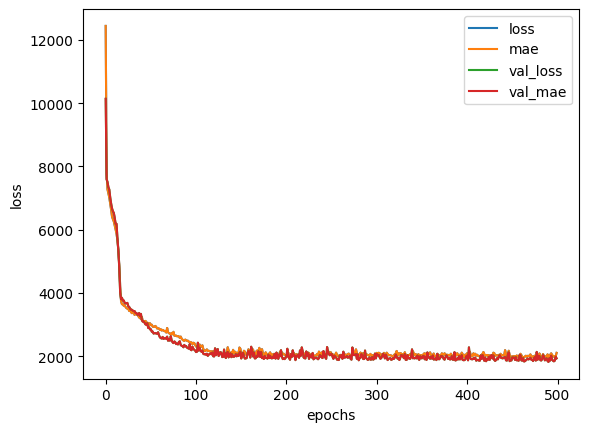

In [55]:
# history plot
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# the improvements keep creeping in slowly.

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_19.png)

### When to stop training?

In [59]:
# a way to keep training until a minimum of
# improvement is reached you can use the 
# `EarlyStopping()` callback

# stop when loss stops improving min 0.0001
# over 10 cycles
earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.0001,
  patience=10, restore_best_weights=True)

history = insurance_model_3.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=5000, callbacks=[earlystop_callback])

# since the model is already trained it won't run for long now before the callback is triggered:
# Epoch 21/5000
# 34/34 [==============================] - 0s 3ms/step - loss: 1843.7740 - mae: 1843.7740 - val_loss: 1802.4473 - val_mae: 1802.4473


Epoch 1/5000
34/34 [==============================] - 0s 4ms/step - loss: 1968.7502 - mae: 1968.7502 - val_loss: 1851.8110 - val_mae: 1851.8110
Epoch 2/5000
34/34 [==============================] - 0s 3ms/step - loss: 1867.2806 - mae: 1867.2806 - val_loss: 1802.3353 - val_mae: 1802.3353
Epoch 3/5000
34/34 [==============================] - 0s 3ms/step - loss: 1856.0171 - mae: 1856.0171 - val_loss: 1818.6802 - val_mae: 1818.6802
Epoch 4/5000
34/34 [==============================] - 0s 3ms/step - loss: 1849.8312 - mae: 1849.8312 - val_loss: 1787.9906 - val_mae: 1787.9906
Epoch 5/5000
34/34 [==============================] - 0s 3ms/step - loss: 1876.0964 - mae: 1876.0964 - val_loss: 1895.5760 - val_mae: 1895.5760
Epoch 6/5000
34/34 [==============================] - 0s 3ms/step - loss: 1883.2078 - mae: 1883.2078 - val_loss: 1774.9967 - val_mae: 1774.9967
Epoch 7/5000
34/34 [==============================] - 0s 3ms/step - loss: 1847.3207 - mae: 1847.3207 - val_loss: 1714.2823 - val_mae: 17

## Preprocessing Data

### Normalization & Standardization

Change the values of features to a common scale without distorting differences in their ranges.

<AxesSubplot: ylabel='Frequency'>

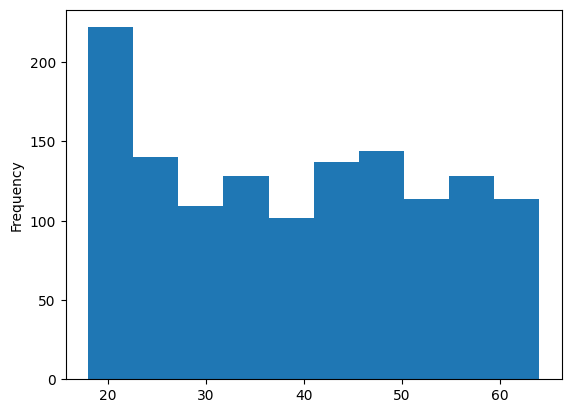

In [60]:
X["age"].plot(kind="hist")

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_20.png)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

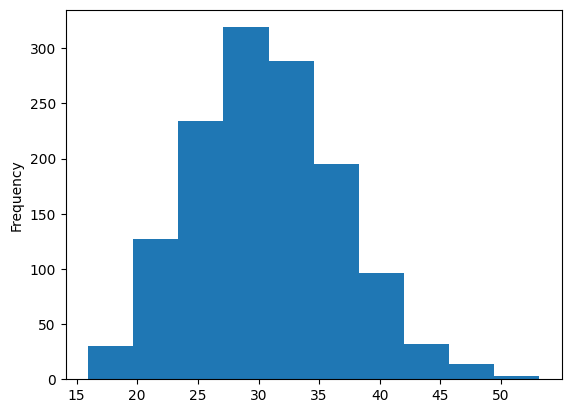

In [62]:
X["bmi"].plot(kind="hist")
X["children"].value_counts()
# 0    574
# 1    324
# 2    240
# 3    157
# 4     25
# 5     18
# Name: children, dtype: int64

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_21.png)

#### Feature Scaling with SciKit

To bring all values on the same scale we can use SciKit-Learn:

* __Normalization__: `MinMaxScaler` converts all values to a range between `1` and `0` while preserving the original distribution.
* __Standardization__: `StandardScaler` removes the mean and divides each value by the standard deviation (reduces effect from outliers)

In [66]:
# get insurance dataset
insurance_data = pd.read_csv('https://raw.githubusercontent.com/mpolinowski/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance_data_random = insurance_data.sample(frac=1)

In [73]:
# create a column transformer
transformer = make_column_transformer(
        (MinMaxScaler(), ["age", "bmi", "children"]), # Normalize
        (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # OneHotEncode
    )

In [84]:
# create features and labels
# we need to predict "charges" - so drop this column from features
X = insurance_data_random.drop("charges", axis=1)
y = insurance_data_random["charges"]

# training and testing data split using scikit-learn
# this function actually randomizes the dataset for us
# we did not need to shuffle the dataframe before - doesn't hurt, though
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# fit transformer to training data
transformer.fit(X_train)

# normalize training and test data with transformer
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

X_train.loc[88], X_train_norm[88]

# (age                46
#  sex            female
#  bmi             27.74
#  children            0
#  smoker             no
#  region      northwest
 
#  Name: 88, dtype: object,
#  array([0.65217391, 0.52905569, 0.8       , 0.        , 1.        ,
#         1.        , 0.        , 1.        , 0.        , 0.        ,
#         0.        ]))

(age                46
 sex            female
 bmi             27.74
 children            0
 smoker             no
 region      northwest
 Name: 88, dtype: object,
 array([0.65217391, 0.52905569, 0.8       , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]))

### Model Training

In [90]:
tf.random.set_seed(42)

# increase number of units
insurance_model_norm = tf.keras.Sequential([
    layers.Dense(8, input_shape=[11], name="input_layer"),
    layers.Dense(16, activation="relu", name="dense_layer1"),
    layers.Dense(8, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="insurance_model_norm")

insurance_model_norm.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics="mae")

earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.00001,
  patience=100, restore_best_weights=True)

history_norm = insurance_model_norm.fit(X_train_norm, y_train,
                                validation_data=(X_test_norm, y_test),
                                epochs=5000, callbacks=[earlystop_callback])

# Epoch 950/5000
# 34/34 [==============================] - 0s 4ms/step - loss: 1292.6730 - mae: 1292.6730 - val_loss: 2108.5374 - val_mae: 2108.5374

Epoch 1/5000
34/34 [==============================] - 1s 6ms/step - loss: 13378.9678 - mae: 13378.9678 - val_loss: 12693.3438 - val_mae: 12693.3438
Epoch 2/5000
34/34 [==============================] - 0s 3ms/step - loss: 12739.6836 - mae: 12739.6836 - val_loss: 10652.5518 - val_mae: 10652.5518
Epoch 3/5000
34/34 [==============================] - 0s 3ms/step - loss: 9241.4570 - mae: 9241.4570 - val_loss: 7731.0210 - val_mae: 7731.0210
Epoch 4/5000
34/34 [==============================] - 0s 3ms/step - loss: 7959.7822 - mae: 7959.7822 - val_loss: 7303.7310 - val_mae: 7303.7310
Epoch 5/5000
34/34 [==============================] - 0s 3ms/step - loss: 7534.3906 - mae: 7534.3906 - val_loss: 6880.7856 - val_mae: 6880.7856
Epoch 6/5000
34/34 [==============================] - 0s 3ms/step - loss: 7020.6177 - mae: 7020.6177 - val_loss: 6313.4380 - val_mae: 6313.4380
Epoch 7/5000
34/34 [==============================] - 0s 3ms/step - loss: 6194.0708 - mae: 6194.0708 - val_loss: 5305.1157 - val

34/34 [==============================] - 0s 3ms/step - loss: 3047.9243 - mae: 3047.9243 - val_loss: 3761.7695 - val_mae: 3761.7695
Epoch 58/5000
34/34 [==============================] - 0s 4ms/step - loss: 3038.2832 - mae: 3038.2832 - val_loss: 3729.6243 - val_mae: 3729.6243
Epoch 59/5000
34/34 [==============================] - 0s 3ms/step - loss: 3035.9954 - mae: 3035.9954 - val_loss: 3757.6521 - val_mae: 3757.6521
Epoch 60/5000
34/34 [==============================] - 0s 3ms/step - loss: 3046.7527 - mae: 3046.7527 - val_loss: 3754.4006 - val_mae: 3754.4006
Epoch 61/5000
34/34 [==============================] - 0s 3ms/step - loss: 3035.4429 - mae: 3035.4429 - val_loss: 3732.4387 - val_mae: 3732.4387
Epoch 62/5000
34/34 [==============================] - 0s 3ms/step - loss: 3041.8391 - mae: 3041.8391 - val_loss: 3758.4897 - val_mae: 3758.4897
Epoch 63/5000
34/34 [==============================] - 0s 3ms/step - loss: 3030.6318 - mae: 3030.6318 - val_loss: 3733.7344 - val_mae: 3733.7344

34/34 [==============================] - 0s 3ms/step - loss: 2989.4321 - mae: 2989.4321 - val_loss: 3662.9585 - val_mae: 3662.9585
Epoch 114/5000
34/34 [==============================] - 0s 3ms/step - loss: 3017.1677 - mae: 3017.1677 - val_loss: 3667.2222 - val_mae: 3667.2222
Epoch 115/5000
34/34 [==============================] - 0s 3ms/step - loss: 2984.8125 - mae: 2984.8125 - val_loss: 3655.9443 - val_mae: 3655.9443
Epoch 116/5000
34/34 [==============================] - 0s 3ms/step - loss: 2983.5623 - mae: 2983.5623 - val_loss: 3694.5198 - val_mae: 3694.5198
Epoch 117/5000
34/34 [==============================] - 0s 3ms/step - loss: 2979.8315 - mae: 2979.8315 - val_loss: 3651.8430 - val_mae: 3651.8430
Epoch 118/5000
34/34 [==============================] - 0s 3ms/step - loss: 2986.9045 - mae: 2986.9045 - val_loss: 3669.8198 - val_mae: 3669.8198
Epoch 119/5000
34/34 [==============================] - 0s 3ms/step - loss: 2988.2522 - mae: 2988.2522 - val_loss: 3661.8352 - val_mae: 366

34/34 [==============================] - 0s 3ms/step - loss: 2920.1165 - mae: 2920.1165 - val_loss: 3603.6736 - val_mae: 3603.6736
Epoch 170/5000
34/34 [==============================] - 0s 4ms/step - loss: 2900.7729 - mae: 2900.7729 - val_loss: 3668.4058 - val_mae: 3668.4058
Epoch 171/5000
34/34 [==============================] - 0s 3ms/step - loss: 2908.5947 - mae: 2908.5947 - val_loss: 3603.8271 - val_mae: 3603.8271
Epoch 172/5000
34/34 [==============================] - 0s 3ms/step - loss: 2886.1331 - mae: 2886.1331 - val_loss: 3628.2578 - val_mae: 3628.2578
Epoch 173/5000
34/34 [==============================] - 0s 3ms/step - loss: 2874.8157 - mae: 2874.8157 - val_loss: 3616.7490 - val_mae: 3616.7490
Epoch 174/5000
34/34 [==============================] - 0s 3ms/step - loss: 2876.2488 - mae: 2876.2488 - val_loss: 3627.9836 - val_mae: 3627.9836
Epoch 175/5000
34/34 [==============================] - 0s 3ms/step - loss: 2883.5842 - mae: 2883.5842 - val_loss: 3625.7937 - val_mae: 362

34/34 [==============================] - 0s 3ms/step - loss: 2341.4551 - mae: 2341.4551 - val_loss: 2999.0911 - val_mae: 2999.0911
Epoch 226/5000
34/34 [==============================] - 0s 3ms/step - loss: 2325.7612 - mae: 2325.7612 - val_loss: 2963.4150 - val_mae: 2963.4150
Epoch 227/5000
34/34 [==============================] - 0s 3ms/step - loss: 2304.4675 - mae: 2304.4675 - val_loss: 2939.6956 - val_mae: 2939.6956
Epoch 228/5000
34/34 [==============================] - 0s 3ms/step - loss: 2270.8015 - mae: 2270.8015 - val_loss: 2945.4385 - val_mae: 2945.4385
Epoch 229/5000
34/34 [==============================] - 0s 3ms/step - loss: 2261.2283 - mae: 2261.2283 - val_loss: 2938.6018 - val_mae: 2938.6018
Epoch 230/5000
34/34 [==============================] - 0s 3ms/step - loss: 2245.1831 - mae: 2245.1831 - val_loss: 2885.5762 - val_mae: 2885.5762
Epoch 231/5000
34/34 [==============================] - 0s 3ms/step - loss: 2225.1179 - mae: 2225.1179 - val_loss: 2824.0793 - val_mae: 282

34/34 [==============================] - 0s 3ms/step - loss: 1885.9000 - mae: 1885.9000 - val_loss: 2430.8853 - val_mae: 2430.8853
Epoch 282/5000
34/34 [==============================] - 0s 3ms/step - loss: 1885.0338 - mae: 1885.0338 - val_loss: 2454.3655 - val_mae: 2454.3655
Epoch 283/5000
34/34 [==============================] - 0s 3ms/step - loss: 1934.4883 - mae: 1934.4883 - val_loss: 2446.2068 - val_mae: 2446.2068
Epoch 284/5000
34/34 [==============================] - 0s 3ms/step - loss: 1888.1658 - mae: 1888.1658 - val_loss: 2441.6125 - val_mae: 2441.6125
Epoch 285/5000
34/34 [==============================] - 0s 3ms/step - loss: 1896.7732 - mae: 1896.7732 - val_loss: 2503.1523 - val_mae: 2503.1523
Epoch 286/5000
34/34 [==============================] - 0s 3ms/step - loss: 1888.5897 - mae: 1888.5897 - val_loss: 2442.0854 - val_mae: 2442.0854
Epoch 287/5000
34/34 [==============================] - 0s 3ms/step - loss: 1888.7748 - mae: 1888.7748 - val_loss: 2448.6262 - val_mae: 244

34/34 [==============================] - 0s 3ms/step - loss: 1920.4506 - mae: 1920.4506 - val_loss: 2462.0603 - val_mae: 2462.0603
Epoch 338/5000
34/34 [==============================] - 0s 3ms/step - loss: 1881.9900 - mae: 1881.9900 - val_loss: 2422.7019 - val_mae: 2422.7019
Epoch 339/5000
34/34 [==============================] - 0s 3ms/step - loss: 1870.6144 - mae: 1870.6144 - val_loss: 2476.7996 - val_mae: 2476.7996
Epoch 340/5000
34/34 [==============================] - 0s 3ms/step - loss: 1859.9855 - mae: 1859.9855 - val_loss: 2410.4114 - val_mae: 2410.4114
Epoch 341/5000
34/34 [==============================] - 0s 3ms/step - loss: 1858.8739 - mae: 1858.8739 - val_loss: 2429.0596 - val_mae: 2429.0596
Epoch 342/5000
34/34 [==============================] - 0s 3ms/step - loss: 1849.6720 - mae: 1849.6720 - val_loss: 2411.2000 - val_mae: 2411.2000
Epoch 343/5000
34/34 [==============================] - 0s 3ms/step - loss: 1863.3446 - mae: 1863.3446 - val_loss: 2402.6143 - val_mae: 240

34/34 [==============================] - 0s 3ms/step - loss: 1705.2253 - mae: 1705.2253 - val_loss: 2343.6265 - val_mae: 2343.6265
Epoch 394/5000
34/34 [==============================] - 0s 3ms/step - loss: 1705.9985 - mae: 1705.9985 - val_loss: 2320.0037 - val_mae: 2320.0037
Epoch 395/5000
34/34 [==============================] - 0s 3ms/step - loss: 1708.6399 - mae: 1708.6399 - val_loss: 2296.7981 - val_mae: 2296.7981
Epoch 396/5000
34/34 [==============================] - 0s 3ms/step - loss: 1675.4637 - mae: 1675.4637 - val_loss: 2288.7415 - val_mae: 2288.7415
Epoch 397/5000
34/34 [==============================] - 0s 3ms/step - loss: 1690.8706 - mae: 1690.8706 - val_loss: 2328.9453 - val_mae: 2328.9453
Epoch 398/5000
34/34 [==============================] - 0s 3ms/step - loss: 1677.0996 - mae: 1677.0996 - val_loss: 2300.4858 - val_mae: 2300.4858
Epoch 399/5000
34/34 [==============================] - 0s 3ms/step - loss: 1680.6034 - mae: 1680.6034 - val_loss: 2298.7019 - val_mae: 229

34/34 [==============================] - 0s 3ms/step - loss: 1536.8842 - mae: 1536.8842 - val_loss: 2184.2051 - val_mae: 2184.2051
Epoch 450/5000
34/34 [==============================] - 0s 3ms/step - loss: 1496.9889 - mae: 1496.9889 - val_loss: 2142.2190 - val_mae: 2142.2190
Epoch 451/5000
34/34 [==============================] - 0s 3ms/step - loss: 1517.9841 - mae: 1517.9841 - val_loss: 2175.0239 - val_mae: 2175.0239
Epoch 452/5000
34/34 [==============================] - 0s 3ms/step - loss: 1486.5475 - mae: 1486.5475 - val_loss: 2169.7300 - val_mae: 2169.7300
Epoch 453/5000
34/34 [==============================] - 0s 3ms/step - loss: 1485.3999 - mae: 1485.3999 - val_loss: 2134.6797 - val_mae: 2134.6797
Epoch 454/5000
34/34 [==============================] - 0s 3ms/step - loss: 1482.9757 - mae: 1482.9757 - val_loss: 2130.2170 - val_mae: 2130.2170
Epoch 455/5000
34/34 [==============================] - 0s 3ms/step - loss: 1473.7202 - mae: 1473.7202 - val_loss: 2193.6533 - val_mae: 219

34/34 [==============================] - 0s 3ms/step - loss: 1419.3615 - mae: 1419.3615 - val_loss: 2103.1987 - val_mae: 2103.1987
Epoch 506/5000
34/34 [==============================] - 0s 3ms/step - loss: 1448.1432 - mae: 1448.1432 - val_loss: 2111.0400 - val_mae: 2111.0400
Epoch 507/5000
34/34 [==============================] - 0s 3ms/step - loss: 1414.9758 - mae: 1414.9758 - val_loss: 2097.3486 - val_mae: 2097.3486
Epoch 508/5000
34/34 [==============================] - 0s 3ms/step - loss: 1396.1167 - mae: 1396.1167 - val_loss: 2117.1311 - val_mae: 2117.1311
Epoch 509/5000
34/34 [==============================] - 0s 3ms/step - loss: 1411.7811 - mae: 1411.7811 - val_loss: 2111.3411 - val_mae: 2111.3411
Epoch 510/5000
34/34 [==============================] - 0s 3ms/step - loss: 1429.0468 - mae: 1429.0468 - val_loss: 2108.7727 - val_mae: 2108.7727
Epoch 511/5000
34/34 [==============================] - 0s 3ms/step - loss: 1400.7596 - mae: 1400.7596 - val_loss: 2101.7375 - val_mae: 210

34/34 [==============================] - 0s 3ms/step - loss: 1399.0283 - mae: 1399.0283 - val_loss: 2107.4426 - val_mae: 2107.4426
Epoch 562/5000
34/34 [==============================] - 0s 3ms/step - loss: 1384.2749 - mae: 1384.2749 - val_loss: 2072.0544 - val_mae: 2072.0544
Epoch 563/5000
34/34 [==============================] - 0s 3ms/step - loss: 1376.0701 - mae: 1376.0701 - val_loss: 2081.1199 - val_mae: 2081.1199
Epoch 564/5000
34/34 [==============================] - 0s 3ms/step - loss: 1369.7394 - mae: 1369.7394 - val_loss: 2064.4497 - val_mae: 2064.4497
Epoch 565/5000
34/34 [==============================] - 0s 3ms/step - loss: 1367.2488 - mae: 1367.2488 - val_loss: 2073.5540 - val_mae: 2073.5540
Epoch 566/5000
34/34 [==============================] - 0s 3ms/step - loss: 1360.9536 - mae: 1360.9536 - val_loss: 2097.0596 - val_mae: 2097.0596
Epoch 567/5000
34/34 [==============================] - 0s 3ms/step - loss: 1372.1351 - mae: 1372.1351 - val_loss: 2107.6245 - val_mae: 210

34/34 [==============================] - 0s 3ms/step - loss: 1363.8016 - mae: 1363.8016 - val_loss: 2117.8833 - val_mae: 2117.8833
Epoch 618/5000
34/34 [==============================] - 0s 3ms/step - loss: 1363.1062 - mae: 1363.1062 - val_loss: 2094.8203 - val_mae: 2094.8203
Epoch 619/5000
34/34 [==============================] - 0s 3ms/step - loss: 1339.3130 - mae: 1339.3130 - val_loss: 2076.9524 - val_mae: 2076.9524
Epoch 620/5000
34/34 [==============================] - 0s 3ms/step - loss: 1375.6138 - mae: 1375.6138 - val_loss: 2072.7573 - val_mae: 2072.7573
Epoch 621/5000
34/34 [==============================] - 0s 3ms/step - loss: 1343.3076 - mae: 1343.3076 - val_loss: 2072.1792 - val_mae: 2072.1792
Epoch 622/5000
34/34 [==============================] - 0s 3ms/step - loss: 1362.3674 - mae: 1362.3674 - val_loss: 2130.7004 - val_mae: 2130.7004
Epoch 623/5000
34/34 [==============================] - 0s 3ms/step - loss: 1380.5774 - mae: 1380.5774 - val_loss: 2101.4478 - val_mae: 210

34/34 [==============================] - 0s 3ms/step - loss: 1321.4141 - mae: 1321.4141 - val_loss: 2058.5723 - val_mae: 2058.5723
Epoch 674/5000
34/34 [==============================] - 0s 3ms/step - loss: 1328.7695 - mae: 1328.7695 - val_loss: 2098.8809 - val_mae: 2098.8809
Epoch 675/5000
34/34 [==============================] - 0s 3ms/step - loss: 1344.9010 - mae: 1344.9010 - val_loss: 2060.6008 - val_mae: 2060.6008
Epoch 676/5000
34/34 [==============================] - 0s 3ms/step - loss: 1343.1536 - mae: 1343.1536 - val_loss: 2065.3376 - val_mae: 2065.3376
Epoch 677/5000
34/34 [==============================] - 0s 3ms/step - loss: 1323.1351 - mae: 1323.1351 - val_loss: 2066.1514 - val_mae: 2066.1514
Epoch 678/5000
34/34 [==============================] - 0s 3ms/step - loss: 1325.7567 - mae: 1325.7567 - val_loss: 2080.0679 - val_mae: 2080.0679
Epoch 679/5000
34/34 [==============================] - 0s 4ms/step - loss: 1331.9821 - mae: 1331.9821 - val_loss: 2056.1990 - val_mae: 205

34/34 [==============================] - 0s 3ms/step - loss: 1325.8776 - mae: 1325.8776 - val_loss: 2072.6865 - val_mae: 2072.6865
Epoch 730/5000
34/34 [==============================] - 0s 3ms/step - loss: 1318.0668 - mae: 1318.0668 - val_loss: 2124.8948 - val_mae: 2124.8948
Epoch 731/5000
34/34 [==============================] - 0s 3ms/step - loss: 1313.0912 - mae: 1313.0912 - val_loss: 2091.8604 - val_mae: 2091.8604
Epoch 732/5000
34/34 [==============================] - 0s 3ms/step - loss: 1333.6997 - mae: 1333.6997 - val_loss: 2155.8745 - val_mae: 2155.8745
Epoch 733/5000
34/34 [==============================] - 0s 3ms/step - loss: 1340.1119 - mae: 1340.1119 - val_loss: 2067.4827 - val_mae: 2067.4827
Epoch 734/5000
34/34 [==============================] - 0s 3ms/step - loss: 1347.8112 - mae: 1347.8112 - val_loss: 2114.6328 - val_mae: 2114.6328
Epoch 735/5000
34/34 [==============================] - 0s 3ms/step - loss: 1348.6050 - mae: 1348.6050 - val_loss: 2092.8833 - val_mae: 209

34/34 [==============================] - 0s 3ms/step - loss: 1328.4867 - mae: 1328.4867 - val_loss: 2089.1790 - val_mae: 2089.1790
Epoch 786/5000
34/34 [==============================] - 0s 3ms/step - loss: 1311.9528 - mae: 1311.9528 - val_loss: 2073.9937 - val_mae: 2073.9937
Epoch 787/5000
34/34 [==============================] - 0s 3ms/step - loss: 1294.1104 - mae: 1294.1104 - val_loss: 2064.7571 - val_mae: 2064.7571
Epoch 788/5000
34/34 [==============================] - 0s 4ms/step - loss: 1297.1781 - mae: 1297.1781 - val_loss: 2084.2271 - val_mae: 2084.2271
Epoch 789/5000
34/34 [==============================] - 0s 3ms/step - loss: 1302.1788 - mae: 1302.1788 - val_loss: 2074.9749 - val_mae: 2074.9749
Epoch 790/5000
34/34 [==============================] - 0s 3ms/step - loss: 1297.5641 - mae: 1297.5641 - val_loss: 2082.6558 - val_mae: 2082.6558
Epoch 791/5000
34/34 [==============================] - 0s 3ms/step - loss: 1331.1934 - mae: 1331.1934 - val_loss: 2105.7817 - val_mae: 210

34/34 [==============================] - 0s 3ms/step - loss: 1300.0973 - mae: 1300.0973 - val_loss: 2071.5339 - val_mae: 2071.5339
Epoch 842/5000
34/34 [==============================] - 0s 3ms/step - loss: 1318.9744 - mae: 1318.9744 - val_loss: 2083.1150 - val_mae: 2083.1150
Epoch 843/5000
34/34 [==============================] - 0s 3ms/step - loss: 1306.0024 - mae: 1306.0024 - val_loss: 2052.4880 - val_mae: 2052.4880
Epoch 844/5000
34/34 [==============================] - 0s 3ms/step - loss: 1304.3126 - mae: 1304.3126 - val_loss: 2056.6711 - val_mae: 2056.6711
Epoch 845/5000
34/34 [==============================] - 0s 3ms/step - loss: 1287.6909 - mae: 1287.6909 - val_loss: 2079.4988 - val_mae: 2079.4988
Epoch 846/5000
34/34 [==============================] - 0s 3ms/step - loss: 1312.5361 - mae: 1312.5361 - val_loss: 2082.9700 - val_mae: 2082.9700
Epoch 847/5000
34/34 [==============================] - 0s 3ms/step - loss: 1324.4918 - mae: 1324.4918 - val_loss: 2118.0520 - val_mae: 211

34/34 [==============================] - 0s 3ms/step - loss: 1278.7040 - mae: 1278.7040 - val_loss: 2094.1379 - val_mae: 2094.1379
Epoch 898/5000
34/34 [==============================] - 0s 3ms/step - loss: 1278.8219 - mae: 1278.8219 - val_loss: 2081.7839 - val_mae: 2081.7839
Epoch 899/5000
34/34 [==============================] - 0s 3ms/step - loss: 1275.4966 - mae: 1275.4966 - val_loss: 2065.9758 - val_mae: 2065.9758
Epoch 900/5000
34/34 [==============================] - 0s 3ms/step - loss: 1292.4072 - mae: 1292.4072 - val_loss: 2091.9451 - val_mae: 2091.9451
Epoch 901/5000
34/34 [==============================] - 0s 3ms/step - loss: 1287.3936 - mae: 1287.3936 - val_loss: 2060.5032 - val_mae: 2060.5032
Epoch 902/5000
34/34 [==============================] - 0s 3ms/step - loss: 1296.1599 - mae: 1296.1599 - val_loss: 2058.6638 - val_mae: 2058.6638
Epoch 903/5000
34/34 [==============================] - 0s 3ms/step - loss: 1270.4062 - mae: 1270.4062 - val_loss: 2069.6218 - val_mae: 206

Text(0.5, 0, 'epochs')

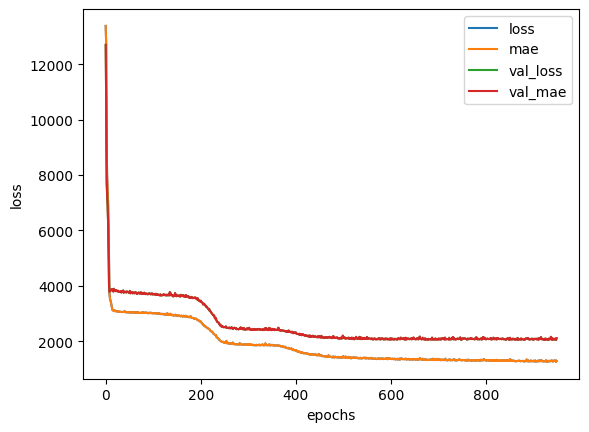

In [91]:
# history plot
pd.DataFrame(history_norm.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_22.png)

In [116]:
tf.random.set_seed(42)

# increase number of units
insurance_model_norm_1 = tf.keras.Sequential([
    layers.Dense(11, name="input_layer"),
    layers.Dense(32, activation="relu", name="dense_layer1"),
    layers.Dense(8, activation="relu", name="dense_layer2"),
    layers.Dense(1, name="output_layer")
], name="insurance_model_norm_1")

insurance_model_norm_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(learning_rate=0.02),
    metrics="mae")

earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.00001,
  patience=100, restore_best_weights=True)

history_norm_1 = insurance_model_norm_1.fit(X_train_norm, y_train,
                                validation_data=(X_test_norm, y_test),
                                epochs=5000, callbacks=[earlystop_callback])

# Epoch 424/5000
# 34/34 [==============================] - 0s 4ms/step - loss: 1358.7324 - mae: 1358.7324 - val_loss: 2093.2083 - val_mae: 2093.2083

Epoch 1/5000
34/34 [==============================] - 1s 7ms/step - loss: 13323.3652 - mae: 13323.3652 - val_loss: 12341.9922 - val_mae: 12341.9922
Epoch 2/5000
34/34 [==============================] - 0s 3ms/step - loss: 10653.3789 - mae: 10653.3789 - val_loss: 7729.9180 - val_mae: 7729.9180
Epoch 3/5000
34/34 [==============================] - 0s 3ms/step - loss: 7899.4746 - mae: 7899.4746 - val_loss: 7159.2964 - val_mae: 7159.2964
Epoch 4/5000
34/34 [==============================] - 0s 3ms/step - loss: 7174.7178 - mae: 7174.7178 - val_loss: 6346.9590 - val_mae: 6346.9590
Epoch 5/5000
34/34 [==============================] - 0s 3ms/step - loss: 5936.3901 - mae: 5936.3901 - val_loss: 4673.1343 - val_mae: 4673.1343
Epoch 6/5000
34/34 [==============================] - 0s 3ms/step - loss: 4015.9468 - mae: 4015.9468 - val_loss: 3801.0579 - val_mae: 3801.0579
Epoch 7/5000
34/34 [==============================] - 0s 3ms/step - loss: 3554.0649 - mae: 3554.0649 - val_loss: 3880.2886 - val_m

34/34 [==============================] - 0s 4ms/step - loss: 3026.0217 - mae: 3026.0217 - val_loss: 3708.4077 - val_mae: 3708.4077
Epoch 58/5000
34/34 [==============================] - 0s 3ms/step - loss: 3021.6575 - mae: 3021.6575 - val_loss: 3699.6404 - val_mae: 3699.6404
Epoch 59/5000
34/34 [==============================] - 0s 3ms/step - loss: 3020.5652 - mae: 3020.5652 - val_loss: 3713.4250 - val_mae: 3713.4250
Epoch 60/5000
34/34 [==============================] - 0s 4ms/step - loss: 3006.3054 - mae: 3006.3054 - val_loss: 3673.9424 - val_mae: 3673.9424
Epoch 61/5000
34/34 [==============================] - 0s 3ms/step - loss: 3010.4177 - mae: 3010.4177 - val_loss: 3686.7102 - val_mae: 3686.7102
Epoch 62/5000
34/34 [==============================] - 0s 4ms/step - loss: 3026.7383 - mae: 3026.7383 - val_loss: 3671.4541 - val_mae: 3671.4541
Epoch 63/5000
34/34 [==============================] - 0s 3ms/step - loss: 3010.9539 - mae: 3010.9539 - val_loss: 3664.1550 - val_mae: 3664.1550

34/34 [==============================] - 0s 3ms/step - loss: 1956.7092 - mae: 1956.7092 - val_loss: 2591.8176 - val_mae: 2591.8176
Epoch 114/5000
34/34 [==============================] - 0s 3ms/step - loss: 1960.2766 - mae: 1960.2766 - val_loss: 2471.8591 - val_mae: 2471.8591
Epoch 115/5000
34/34 [==============================] - 0s 4ms/step - loss: 1907.5168 - mae: 1907.5168 - val_loss: 2521.6006 - val_mae: 2521.6006
Epoch 116/5000
34/34 [==============================] - 0s 4ms/step - loss: 1958.7528 - mae: 1958.7528 - val_loss: 2463.4661 - val_mae: 2463.4661
Epoch 117/5000
34/34 [==============================] - 0s 4ms/step - loss: 1915.9236 - mae: 1915.9236 - val_loss: 2477.5732 - val_mae: 2477.5732
Epoch 118/5000
34/34 [==============================] - 0s 4ms/step - loss: 1895.7175 - mae: 1895.7175 - val_loss: 2492.0811 - val_mae: 2492.0811
Epoch 119/5000
34/34 [==============================] - 0s 4ms/step - loss: 1870.9523 - mae: 1870.9523 - val_loss: 2457.4067 - val_mae: 245

34/34 [==============================] - 0s 4ms/step - loss: 1610.0150 - mae: 1610.0150 - val_loss: 2224.8967 - val_mae: 2224.8967
Epoch 170/5000
34/34 [==============================] - 0s 3ms/step - loss: 1570.1344 - mae: 1570.1344 - val_loss: 2222.5393 - val_mae: 2222.5393
Epoch 171/5000
34/34 [==============================] - 0s 3ms/step - loss: 1577.5580 - mae: 1577.5580 - val_loss: 2233.3455 - val_mae: 2233.3455
Epoch 172/5000
34/34 [==============================] - 0s 3ms/step - loss: 1635.3644 - mae: 1635.3644 - val_loss: 2187.9661 - val_mae: 2187.9661
Epoch 173/5000
34/34 [==============================] - 0s 3ms/step - loss: 1566.9967 - mae: 1566.9967 - val_loss: 2184.4197 - val_mae: 2184.4197
Epoch 174/5000
34/34 [==============================] - 0s 3ms/step - loss: 1560.7233 - mae: 1560.7233 - val_loss: 2211.4780 - val_mae: 2211.4780
Epoch 175/5000
34/34 [==============================] - 0s 3ms/step - loss: 1604.2792 - mae: 1604.2792 - val_loss: 2267.7097 - val_mae: 226

34/34 [==============================] - 0s 3ms/step - loss: 1466.8610 - mae: 1466.8610 - val_loss: 2152.0334 - val_mae: 2152.0334
Epoch 226/5000
34/34 [==============================] - 0s 4ms/step - loss: 1496.1680 - mae: 1496.1680 - val_loss: 2144.5356 - val_mae: 2144.5356
Epoch 227/5000
34/34 [==============================] - 0s 3ms/step - loss: 1498.3821 - mae: 1498.3821 - val_loss: 2126.7537 - val_mae: 2126.7537
Epoch 228/5000
34/34 [==============================] - 0s 4ms/step - loss: 1439.0328 - mae: 1439.0328 - val_loss: 2102.5300 - val_mae: 2102.5300
Epoch 229/5000
34/34 [==============================] - 0s 3ms/step - loss: 1453.5305 - mae: 1453.5305 - val_loss: 2108.7388 - val_mae: 2108.7388
Epoch 230/5000
34/34 [==============================] - 0s 3ms/step - loss: 1427.2189 - mae: 1427.2189 - val_loss: 2107.9807 - val_mae: 2107.9807
Epoch 231/5000
34/34 [==============================] - 0s 3ms/step - loss: 1451.0010 - mae: 1451.0010 - val_loss: 2115.3457 - val_mae: 211

34/34 [==============================] - 0s 3ms/step - loss: 1462.8873 - mae: 1462.8873 - val_loss: 2171.5112 - val_mae: 2171.5112
Epoch 282/5000
34/34 [==============================] - 0s 4ms/step - loss: 1451.0992 - mae: 1451.0992 - val_loss: 2208.3552 - val_mae: 2208.3552
Epoch 283/5000
34/34 [==============================] - 0s 4ms/step - loss: 1428.1583 - mae: 1428.1583 - val_loss: 2121.6431 - val_mae: 2121.6431
Epoch 284/5000
34/34 [==============================] - 0s 3ms/step - loss: 1434.0902 - mae: 1434.0902 - val_loss: 2172.7317 - val_mae: 2172.7317
Epoch 285/5000
34/34 [==============================] - 0s 3ms/step - loss: 1459.2660 - mae: 1459.2660 - val_loss: 2255.5173 - val_mae: 2255.5173
Epoch 286/5000
34/34 [==============================] - 0s 3ms/step - loss: 1519.5321 - mae: 1519.5321 - val_loss: 2305.7034 - val_mae: 2305.7034
Epoch 287/5000
34/34 [==============================] - 0s 3ms/step - loss: 1479.1311 - mae: 1479.1311 - val_loss: 2146.5996 - val_mae: 214

34/34 [==============================] - 0s 3ms/step - loss: 1447.6487 - mae: 1447.6487 - val_loss: 2128.2781 - val_mae: 2128.2781
Epoch 338/5000
34/34 [==============================] - 0s 3ms/step - loss: 1431.0875 - mae: 1431.0875 - val_loss: 2086.5381 - val_mae: 2086.5381
Epoch 339/5000
34/34 [==============================] - 0s 3ms/step - loss: 1405.6879 - mae: 1405.6879 - val_loss: 2132.5632 - val_mae: 2132.5632
Epoch 340/5000
34/34 [==============================] - 0s 3ms/step - loss: 1395.7758 - mae: 1395.7758 - val_loss: 2096.7617 - val_mae: 2096.7617
Epoch 341/5000
34/34 [==============================] - 0s 3ms/step - loss: 1386.6895 - mae: 1386.6895 - val_loss: 2176.4421 - val_mae: 2176.4421
Epoch 342/5000
34/34 [==============================] - 0s 3ms/step - loss: 1427.0000 - mae: 1427.0000 - val_loss: 2131.4084 - val_mae: 2131.4084
Epoch 343/5000
34/34 [==============================] - 0s 3ms/step - loss: 1418.3253 - mae: 1418.3253 - val_loss: 2219.9810 - val_mae: 221

34/34 [==============================] - 0s 3ms/step - loss: 1410.2133 - mae: 1410.2133 - val_loss: 2092.6438 - val_mae: 2092.6438
Epoch 394/5000
34/34 [==============================] - 0s 3ms/step - loss: 1406.7360 - mae: 1406.7360 - val_loss: 2149.0127 - val_mae: 2149.0127
Epoch 395/5000
34/34 [==============================] - 0s 3ms/step - loss: 1387.7498 - mae: 1387.7498 - val_loss: 2160.5037 - val_mae: 2160.5037
Epoch 396/5000
34/34 [==============================] - 0s 4ms/step - loss: 1398.6057 - mae: 1398.6057 - val_loss: 2067.0452 - val_mae: 2067.0452
Epoch 397/5000
34/34 [==============================] - 0s 4ms/step - loss: 1381.0078 - mae: 1381.0078 - val_loss: 2225.5801 - val_mae: 2225.5801
Epoch 398/5000
34/34 [==============================] - 0s 4ms/step - loss: 1491.3885 - mae: 1491.3885 - val_loss: 2112.4563 - val_mae: 2112.4563
Epoch 399/5000
34/34 [==============================] - 0s 4ms/step - loss: 1368.6794 - mae: 1368.6794 - val_loss: 2110.0464 - val_mae: 211

Text(0.5, 0, 'epochs')

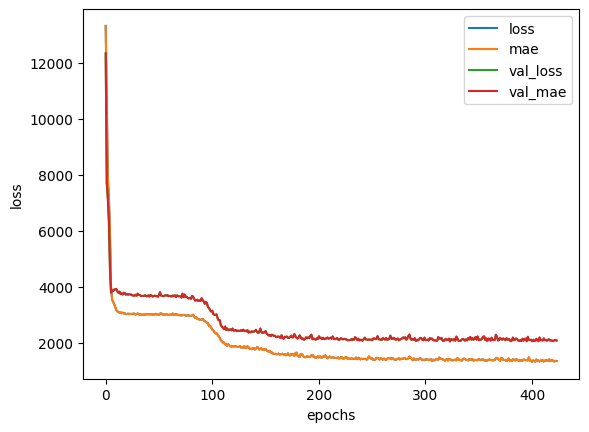

In [117]:
# history plot
pd.DataFrame(history_norm_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

![Tensorflow Neural Network Regression](../assets/01a_Tensorflow_Regressions_23.png)